In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('D:/데이터/IGAWorks/frequency_encoding_data_no_drop.csv')

In [3]:
data.head()

,click,event_datetime,bid_id,age,marry,predicted_house_price,day,hour,holiday,placement_type_WnrXFsYXNs,...,device_os_version_encode,device_model_encode,device_carrier_encode,device_make_encode,device_language_encode,device_region_encode,device_city_encode,advertisement_id_encode,install_pack_encode,cate_code_encode
0,0,2019-10-01 00:00:05.289,aAEDD9AeIv,8,0,10000.0,1,0,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
1,0,2019-10-02 01:50:55.776,120KZBpPEp,8,0,10000.0,2,1,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
2,0,2019-10-03 07:30:56.756,AMFiNF3X7r,8,0,10000.0,3,7,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
3,0,2019-10-07 00:15:31.816,Mza3hx3DOX,8,0,10000.0,7,0,0,0,...,0.084223,0.094481,0.212653,0.413243,0.651317,0.006898,0.005312,0.031688,0.000002,0.000002
4,0,2019-10-09 15:01:40.412,4GbWwwNnJZ,8,0,10000.0,9,15,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002


In [4]:
df = data.copy()

In [5]:
train = df[df['day'].isin(list(range(1,10)))]
test = df[df['day'] == 10]

In [6]:
X_train = train.iloc[:, 3:]
X_test = test.iloc[:, 3:]
y_train = train['click']
y_test = test['click']

In [7]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1978127, 39)
Number transactions y_train dataset:  (1978127,)
Number transactions X_test dataset:  (254243, 39)
Number transactions y_test dataset:  (254243,)


In [20]:
!easy_install bayes_opt

Searching for bayes_opt
Reading https://pypi.org/simple/bayes_opt/
Reading https://pypi.org/simple/bayes-opt/
Scanning index of all packages (this may take a while)
Reading https://pypi.org/simple/


Couldn't find index page for 'bayes_opt' (maybe misspelled?)
No local packages or working download links found for bayes_opt
error: Could not find suitable distribution for Requirement.parse('bayes_opt')


In [42]:
from bayes_opt import BayesianOptimization
import lightgbm
from sklearn.metrics import log_loss

In [39]:
def lgb_evaluate(num_leaves, learning_rate, feature_fraction, bagging_freq,
                 max_bin):
        
    clf = lightgbm.LGBMClassifier(
        boosting_type = 'gbdt', 
        objective = 'binary',
        random_state = 42,
        verbose = 0,
        num_iterations = 500,
        min_data_in_leaf = 10,
        min_sum_hessian_in_leaf = 10, 
        num_leaves = int(num_leaves),
        learning_rate = learning_rate,
        feature_fraction = feature_fraction,
        bagging_freq = int(bagging_freq),
        max_bin = int(max_bin),      
    )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)
    
    lg_loan_status_probas = clf.predict_proba(X_test)
    lg_log_loss = log_loss(y_test, lg_loan_status_probas)

    return lg_log_loss * (-1)

In [64]:
def bayesOpt(train_x, train_y):
    lgbBO = BayesianOptimization(lgb_evaluate, {                                                
                                                'num_leaves':  (30, 50),
                                                'learning_rate': (0.05, 0.15),
                                                'feature_fraction': (0.15, 0.3),
                                                'bagging_freq': (15, 30),
                                                'max_bin': (50 , 500)
                                            })


    lgbBO.maximize(init_points=10, n_iter=20)

    print(lgbBO.max['params'])

In [65]:
opt_params = bayesOpt(X_train, y_train)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | num_le... |
-------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.289904	training's binary_logloss: 0.289904	valid_1's binary_logloss: 0.302895	valid_1's binary_logloss: 0.302895
[2]	training's binary_logloss: 0.284316	training's binary_logloss: 0.284316	valid_1's binary_logloss: 0.297474	valid_1's binary_logloss: 0.297474
[3]	training's binary_logloss: 0.278657	training's binary_logloss: 0.278657	valid_1's binary_logloss: 0.291782	valid_1's binary_logloss: 0.291782
[4]	training's binary_logloss: 0.273793	training's binary_logloss: 0.273793	valid_1's binary_logloss: 0.28691	valid_1's binary_logloss: 0.28691
[5]	training's binary_logloss: 0.269798	training's binary_logloss: 0.269798	valid_1's binary_logloss: 0.283051	valid_1's binary_logloss: 0.283051
[6]	training's binary_logloss: 0.266198	training's binary_logloss: 0.266198	valid_1's binary_logloss: 0.279536	valid_1's binary_logloss: 0.279536
[7]	training's binary_logloss: 0.263184	training's binary_logloss: 0.263184	valid_1's binary_logloss: 0.276614	valid_1's binar

[58]	training's binary_logloss: 0.234488	training's binary_logloss: 0.234488	valid_1's binary_logloss: 0.251737	valid_1's binary_logloss: 0.251737
[59]	training's binary_logloss: 0.234424	training's binary_logloss: 0.234424	valid_1's binary_logloss: 0.251684	valid_1's binary_logloss: 0.251684
[60]	training's binary_logloss: 0.234357	training's binary_logloss: 0.234357	valid_1's binary_logloss: 0.251652	valid_1's binary_logloss: 0.251652
[61]	training's binary_logloss: 0.234283	training's binary_logloss: 0.234283	valid_1's binary_logloss: 0.251583	valid_1's binary_logloss: 0.251583
[62]	training's binary_logloss: 0.234198	training's binary_logloss: 0.234198	valid_1's binary_logloss: 0.251538	valid_1's binary_logloss: 0.251538
[63]	training's binary_logloss: 0.234129	training's binary_logloss: 0.234129	valid_1's binary_logloss: 0.251481	valid_1's binary_logloss: 0.251481
[64]	training's binary_logloss: 0.234047	training's binary_logloss: 0.234047	valid_1's binary_logloss: 0.251418	valid_

[115]	training's binary_logloss: 0.231871	training's binary_logloss: 0.231871	valid_1's binary_logloss: 0.249735	valid_1's binary_logloss: 0.249735
[116]	training's binary_logloss: 0.231846	training's binary_logloss: 0.231846	valid_1's binary_logloss: 0.249728	valid_1's binary_logloss: 0.249728
[117]	training's binary_logloss: 0.23182	training's binary_logloss: 0.23182	valid_1's binary_logloss: 0.249721	valid_1's binary_logloss: 0.249721
[118]	training's binary_logloss: 0.23179	training's binary_logloss: 0.23179	valid_1's binary_logloss: 0.249691	valid_1's binary_logloss: 0.249691
[119]	training's binary_logloss: 0.231755	training's binary_logloss: 0.231755	valid_1's binary_logloss: 0.249661	valid_1's binary_logloss: 0.249661
[120]	training's binary_logloss: 0.231741	training's binary_logloss: 0.231741	valid_1's binary_logloss: 0.249645	valid_1's binary_logloss: 0.249645
[121]	training's binary_logloss: 0.231708	training's binary_logloss: 0.231708	valid_1's binary_logloss: 0.249629	val

[172]	training's binary_logloss: 0.230684	training's binary_logloss: 0.230684	valid_1's binary_logloss: 0.248829	valid_1's binary_logloss: 0.248829
[173]	training's binary_logloss: 0.230674	training's binary_logloss: 0.230674	valid_1's binary_logloss: 0.248823	valid_1's binary_logloss: 0.248823
[174]	training's binary_logloss: 0.230661	training's binary_logloss: 0.230661	valid_1's binary_logloss: 0.248815	valid_1's binary_logloss: 0.248815
[175]	training's binary_logloss: 0.230646	training's binary_logloss: 0.230646	valid_1's binary_logloss: 0.248806	valid_1's binary_logloss: 0.248806
[176]	training's binary_logloss: 0.230634	training's binary_logloss: 0.230634	valid_1's binary_logloss: 0.248792	valid_1's binary_logloss: 0.248792
[177]	training's binary_logloss: 0.230612	training's binary_logloss: 0.230612	valid_1's binary_logloss: 0.248781	valid_1's binary_logloss: 0.248781
[178]	training's binary_logloss: 0.230601	training's binary_logloss: 0.230601	valid_1's binary_logloss: 0.248774

[229]	training's binary_logloss: 0.229894	training's binary_logloss: 0.229894	valid_1's binary_logloss: 0.248291	valid_1's binary_logloss: 0.248291
[230]	training's binary_logloss: 0.229884	training's binary_logloss: 0.229884	valid_1's binary_logloss: 0.248284	valid_1's binary_logloss: 0.248284
[231]	training's binary_logloss: 0.229876	training's binary_logloss: 0.229876	valid_1's binary_logloss: 0.248279	valid_1's binary_logloss: 0.248279
[232]	training's binary_logloss: 0.229868	training's binary_logloss: 0.229868	valid_1's binary_logloss: 0.248275	valid_1's binary_logloss: 0.248275
[233]	training's binary_logloss: 0.229859	training's binary_logloss: 0.229859	valid_1's binary_logloss: 0.24827	valid_1's binary_logloss: 0.24827
[234]	training's binary_logloss: 0.229846	training's binary_logloss: 0.229846	valid_1's binary_logloss: 0.248261	valid_1's binary_logloss: 0.248261
[235]	training's binary_logloss: 0.229839	training's binary_logloss: 0.229839	valid_1's binary_logloss: 0.248259	v

[285]	training's binary_logloss: 0.229335	training's binary_logloss: 0.229335	valid_1's binary_logloss: 0.247959	valid_1's binary_logloss: 0.247959
[286]	training's binary_logloss: 0.229327	training's binary_logloss: 0.229327	valid_1's binary_logloss: 0.247954	valid_1's binary_logloss: 0.247954
[287]	training's binary_logloss: 0.229317	training's binary_logloss: 0.229317	valid_1's binary_logloss: 0.247949	valid_1's binary_logloss: 0.247949
[288]	training's binary_logloss: 0.229304	training's binary_logloss: 0.229304	valid_1's binary_logloss: 0.247943	valid_1's binary_logloss: 0.247943
[289]	training's binary_logloss: 0.229291	training's binary_logloss: 0.229291	valid_1's binary_logloss: 0.247934	valid_1's binary_logloss: 0.247934
[290]	training's binary_logloss: 0.229283	training's binary_logloss: 0.229283	valid_1's binary_logloss: 0.247929	valid_1's binary_logloss: 0.247929
[291]	training's binary_logloss: 0.229263	training's binary_logloss: 0.229263	valid_1's binary_logloss: 0.247894

[341]	training's binary_logloss: 0.228832	training's binary_logloss: 0.228832	valid_1's binary_logloss: 0.247717	valid_1's binary_logloss: 0.247717
[342]	training's binary_logloss: 0.228825	training's binary_logloss: 0.228825	valid_1's binary_logloss: 0.247716	valid_1's binary_logloss: 0.247716
[343]	training's binary_logloss: 0.228818	training's binary_logloss: 0.228818	valid_1's binary_logloss: 0.247713	valid_1's binary_logloss: 0.247713
[344]	training's binary_logloss: 0.228805	training's binary_logloss: 0.228805	valid_1's binary_logloss: 0.247703	valid_1's binary_logloss: 0.247703
[345]	training's binary_logloss: 0.228798	training's binary_logloss: 0.228798	valid_1's binary_logloss: 0.247695	valid_1's binary_logloss: 0.247695
[346]	training's binary_logloss: 0.228793	training's binary_logloss: 0.228793	valid_1's binary_logloss: 0.24769	valid_1's binary_logloss: 0.24769
[347]	training's binary_logloss: 0.228786	training's binary_logloss: 0.228786	valid_1's binary_logloss: 0.247688	v

[399]	training's binary_logloss: 0.228401	training's binary_logloss: 0.228401	valid_1's binary_logloss: 0.247518	valid_1's binary_logloss: 0.247518
[400]	training's binary_logloss: 0.228398	training's binary_logloss: 0.228398	valid_1's binary_logloss: 0.247519	valid_1's binary_logloss: 0.247519
[401]	training's binary_logloss: 0.228391	training's binary_logloss: 0.228391	valid_1's binary_logloss: 0.247517	valid_1's binary_logloss: 0.247517
[402]	training's binary_logloss: 0.228385	training's binary_logloss: 0.228385	valid_1's binary_logloss: 0.247515	valid_1's binary_logloss: 0.247515
[403]	training's binary_logloss: 0.228376	training's binary_logloss: 0.228376	valid_1's binary_logloss: 0.247509	valid_1's binary_logloss: 0.247509
[404]	training's binary_logloss: 0.228371	training's binary_logloss: 0.228371	valid_1's binary_logloss: 0.247506	valid_1's binary_logloss: 0.247506
[405]	training's binary_logloss: 0.228363	training's binary_logloss: 0.228363	valid_1's binary_logloss: 0.247504

[456]	training's binary_logloss: 0.228001	training's binary_logloss: 0.228001	valid_1's binary_logloss: 0.247328	valid_1's binary_logloss: 0.247328
[457]	training's binary_logloss: 0.227995	training's binary_logloss: 0.227995	valid_1's binary_logloss: 0.247327	valid_1's binary_logloss: 0.247327
[458]	training's binary_logloss: 0.227987	training's binary_logloss: 0.227987	valid_1's binary_logloss: 0.247323	valid_1's binary_logloss: 0.247323
[459]	training's binary_logloss: 0.227983	training's binary_logloss: 0.227983	valid_1's binary_logloss: 0.247322	valid_1's binary_logloss: 0.247322
[460]	training's binary_logloss: 0.227976	training's binary_logloss: 0.227976	valid_1's binary_logloss: 0.247323	valid_1's binary_logloss: 0.247323
[461]	training's binary_logloss: 0.22797	training's binary_logloss: 0.22797	valid_1's binary_logloss: 0.247323	valid_1's binary_logloss: 0.247323
[462]	training's binary_logloss: 0.227963	training's binary_logloss: 0.227963	valid_1's binary_logloss: 0.247319	v

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.289964	training's binary_logloss: 0.289964	valid_1's binary_logloss: 0.302517	valid_1's binary_logloss: 0.302517
[2]	training's binary_logloss: 0.283422	training's binary_logloss: 0.283422	valid_1's binary_logloss: 0.295856	valid_1's binary_logloss: 0.295856
[3]	training's binary_logloss: 0.277769	training's binary_logloss: 0.277769	valid_1's binary_logloss: 0.290222	valid_1's binary_logloss: 0.290222
[4]	training's binary_logloss: 0.273282	training's binary_logloss: 0.273282	valid_1's binary_logloss: 0.285887	valid_1's binary_logloss: 0.285887
[5]	training's binary_logloss: 0.269207	training's binary_logloss: 0.269207	valid_1's binary_logloss: 0.281892	valid_1's binary_logloss: 0.281892
[6]	training's binary_logloss: 0.265698	training's binary_logloss: 0.265698	valid_1's binary_logloss: 0.278535	valid_1's binary_logloss: 0.278535
[7]	training's binary_logloss: 0.262718	training's binary_logloss: 0.262718	valid_1's binary_logloss: 0.275713	valid_1's bin

[58]	training's binary_logloss: 0.234124	training's binary_logloss: 0.234124	valid_1's binary_logloss: 0.251691	valid_1's binary_logloss: 0.251691
[59]	training's binary_logloss: 0.234028	training's binary_logloss: 0.234028	valid_1's binary_logloss: 0.251607	valid_1's binary_logloss: 0.251607
[60]	training's binary_logloss: 0.233954	training's binary_logloss: 0.233954	valid_1's binary_logloss: 0.251538	valid_1's binary_logloss: 0.251538
[61]	training's binary_logloss: 0.233878	training's binary_logloss: 0.233878	valid_1's binary_logloss: 0.251488	valid_1's binary_logloss: 0.251488
[62]	training's binary_logloss: 0.233812	training's binary_logloss: 0.233812	valid_1's binary_logloss: 0.251406	valid_1's binary_logloss: 0.251406
[63]	training's binary_logloss: 0.233742	training's binary_logloss: 0.233742	valid_1's binary_logloss: 0.251364	valid_1's binary_logloss: 0.251364
[64]	training's binary_logloss: 0.233666	training's binary_logloss: 0.233666	valid_1's binary_logloss: 0.251305	valid_

[114]	training's binary_logloss: 0.231702	training's binary_logloss: 0.231702	valid_1's binary_logloss: 0.249777	valid_1's binary_logloss: 0.249777
[115]	training's binary_logloss: 0.231678	training's binary_logloss: 0.231678	valid_1's binary_logloss: 0.24976	valid_1's binary_logloss: 0.24976
[116]	training's binary_logloss: 0.231652	training's binary_logloss: 0.231652	valid_1's binary_logloss: 0.249748	valid_1's binary_logloss: 0.249748
[117]	training's binary_logloss: 0.231634	training's binary_logloss: 0.231634	valid_1's binary_logloss: 0.249732	valid_1's binary_logloss: 0.249732
[118]	training's binary_logloss: 0.231614	training's binary_logloss: 0.231614	valid_1's binary_logloss: 0.249721	valid_1's binary_logloss: 0.249721
[119]	training's binary_logloss: 0.231599	training's binary_logloss: 0.231599	valid_1's binary_logloss: 0.249687	valid_1's binary_logloss: 0.249687
[120]	training's binary_logloss: 0.231569	training's binary_logloss: 0.231569	valid_1's binary_logloss: 0.249661	v

[170]	training's binary_logloss: 0.230564	training's binary_logloss: 0.230564	valid_1's binary_logloss: 0.248946	valid_1's binary_logloss: 0.248946
[171]	training's binary_logloss: 0.23054	training's binary_logloss: 0.23054	valid_1's binary_logloss: 0.248924	valid_1's binary_logloss: 0.248924
[172]	training's binary_logloss: 0.230528	training's binary_logloss: 0.230528	valid_1's binary_logloss: 0.248921	valid_1's binary_logloss: 0.248921
[173]	training's binary_logloss: 0.230506	training's binary_logloss: 0.230506	valid_1's binary_logloss: 0.24891	valid_1's binary_logloss: 0.24891
[174]	training's binary_logloss: 0.230491	training's binary_logloss: 0.230491	valid_1's binary_logloss: 0.248903	valid_1's binary_logloss: 0.248903
[175]	training's binary_logloss: 0.230477	training's binary_logloss: 0.230477	valid_1's binary_logloss: 0.248886	valid_1's binary_logloss: 0.248886
[176]	training's binary_logloss: 0.230454	training's binary_logloss: 0.230454	valid_1's binary_logloss: 0.248868	val

[228]	training's binary_logloss: 0.229751	training's binary_logloss: 0.229751	valid_1's binary_logloss: 0.248406	valid_1's binary_logloss: 0.248406
[229]	training's binary_logloss: 0.229742	training's binary_logloss: 0.229742	valid_1's binary_logloss: 0.2484	valid_1's binary_logloss: 0.2484
[230]	training's binary_logloss: 0.229726	training's binary_logloss: 0.229726	valid_1's binary_logloss: 0.248387	valid_1's binary_logloss: 0.248387
[231]	training's binary_logloss: 0.229718	training's binary_logloss: 0.229718	valid_1's binary_logloss: 0.248381	valid_1's binary_logloss: 0.248381
[232]	training's binary_logloss: 0.229708	training's binary_logloss: 0.229708	valid_1's binary_logloss: 0.248377	valid_1's binary_logloss: 0.248377
[233]	training's binary_logloss: 0.229684	training's binary_logloss: 0.229684	valid_1's binary_logloss: 0.248365	valid_1's binary_logloss: 0.248365
[234]	training's binary_logloss: 0.229674	training's binary_logloss: 0.229674	valid_1's binary_logloss: 0.248359	val

[285]	training's binary_logloss: 0.229154	training's binary_logloss: 0.229154	valid_1's binary_logloss: 0.248062	valid_1's binary_logloss: 0.248062
[286]	training's binary_logloss: 0.229143	training's binary_logloss: 0.229143	valid_1's binary_logloss: 0.248055	valid_1's binary_logloss: 0.248055
[287]	training's binary_logloss: 0.229134	training's binary_logloss: 0.229134	valid_1's binary_logloss: 0.248056	valid_1's binary_logloss: 0.248056
[288]	training's binary_logloss: 0.229122	training's binary_logloss: 0.229122	valid_1's binary_logloss: 0.248046	valid_1's binary_logloss: 0.248046
[289]	training's binary_logloss: 0.229115	training's binary_logloss: 0.229115	valid_1's binary_logloss: 0.248043	valid_1's binary_logloss: 0.248043
[290]	training's binary_logloss: 0.229099	training's binary_logloss: 0.229099	valid_1's binary_logloss: 0.24803	valid_1's binary_logloss: 0.24803
[291]	training's binary_logloss: 0.229088	training's binary_logloss: 0.229088	valid_1's binary_logloss: 0.24803	va

[341]	training's binary_logloss: 0.228645	training's binary_logloss: 0.228645	valid_1's binary_logloss: 0.24779	valid_1's binary_logloss: 0.24779
[342]	training's binary_logloss: 0.22864	training's binary_logloss: 0.22864	valid_1's binary_logloss: 0.247789	valid_1's binary_logloss: 0.247789
[343]	training's binary_logloss: 0.228632	training's binary_logloss: 0.228632	valid_1's binary_logloss: 0.247788	valid_1's binary_logloss: 0.247788
[344]	training's binary_logloss: 0.228619	training's binary_logloss: 0.228619	valid_1's binary_logloss: 0.247782	valid_1's binary_logloss: 0.247782
[345]	training's binary_logloss: 0.228605	training's binary_logloss: 0.228605	valid_1's binary_logloss: 0.24777	valid_1's binary_logloss: 0.24777
[346]	training's binary_logloss: 0.228597	training's binary_logloss: 0.228597	valid_1's binary_logloss: 0.247769	valid_1's binary_logloss: 0.247769
[347]	training's binary_logloss: 0.228589	training's binary_logloss: 0.228589	valid_1's binary_logloss: 0.247768	valid

[398]	training's binary_logloss: 0.228158	training's binary_logloss: 0.228158	valid_1's binary_logloss: 0.247543	valid_1's binary_logloss: 0.247543
[399]	training's binary_logloss: 0.228151	training's binary_logloss: 0.228151	valid_1's binary_logloss: 0.247538	valid_1's binary_logloss: 0.247538
[400]	training's binary_logloss: 0.228141	training's binary_logloss: 0.228141	valid_1's binary_logloss: 0.247534	valid_1's binary_logloss: 0.247534
[401]	training's binary_logloss: 0.228134	training's binary_logloss: 0.228134	valid_1's binary_logloss: 0.247529	valid_1's binary_logloss: 0.247529
[402]	training's binary_logloss: 0.228128	training's binary_logloss: 0.228128	valid_1's binary_logloss: 0.247526	valid_1's binary_logloss: 0.247526
[403]	training's binary_logloss: 0.228121	training's binary_logloss: 0.228121	valid_1's binary_logloss: 0.247528	valid_1's binary_logloss: 0.247528
[404]	training's binary_logloss: 0.228117	training's binary_logloss: 0.228117	valid_1's binary_logloss: 0.247526

[454]	training's binary_logloss: 0.227746	training's binary_logloss: 0.227746	valid_1's binary_logloss: 0.247371	valid_1's binary_logloss: 0.247371
[455]	training's binary_logloss: 0.227737	training's binary_logloss: 0.227737	valid_1's binary_logloss: 0.247366	valid_1's binary_logloss: 0.247366
[456]	training's binary_logloss: 0.227734	training's binary_logloss: 0.227734	valid_1's binary_logloss: 0.247367	valid_1's binary_logloss: 0.247367
[457]	training's binary_logloss: 0.227728	training's binary_logloss: 0.227728	valid_1's binary_logloss: 0.247366	valid_1's binary_logloss: 0.247366
[458]	training's binary_logloss: 0.227719	training's binary_logloss: 0.227719	valid_1's binary_logloss: 0.247362	valid_1's binary_logloss: 0.247362
[459]	training's binary_logloss: 0.227711	training's binary_logloss: 0.227711	valid_1's binary_logloss: 0.247358	valid_1's binary_logloss: 0.247358
[460]	training's binary_logloss: 0.227701	training's binary_logloss: 0.227701	valid_1's binary_logloss: 0.247353

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.288271	training's binary_logloss: 0.288271	valid_1's binary_logloss: 0.302421	valid_1's binary_logloss: 0.302421
[2]	training's binary_logloss: 0.2765	training's binary_logloss: 0.2765	valid_1's binary_logloss: 0.289634	valid_1's binary_logloss: 0.289634
[3]	training's binary_logloss: 0.26807	training's binary_logloss: 0.26807	valid_1's binary_logloss: 0.281686	valid_1's binary_logloss: 0.281686
[4]	training's binary_logloss: 0.261722	training's binary_logloss: 0.261722	valid_1's binary_logloss: 0.275712	valid_1's binary_logloss: 0.275712
[5]	training's binary_logloss: 0.258731	training's binary_logloss: 0.258731	valid_1's binary_logloss: 0.272762	valid_1's binary_logloss: 0.272762
[6]	training's binary_logloss: 0.254664	training's binary_logloss: 0.254664	valid_1's binary_logloss: 0.269018	valid_1's binary_logloss: 0.269018
[7]	training's binary_logloss: 0.251251	training's binary_logloss: 0.251251	valid_1's binary_logloss: 0.265879	valid_1's binary_lo

[57]	training's binary_logloss: 0.231629	training's binary_logloss: 0.231629	valid_1's binary_logloss: 0.249771	valid_1's binary_logloss: 0.249771
[58]	training's binary_logloss: 0.231523	training's binary_logloss: 0.231523	valid_1's binary_logloss: 0.249677	valid_1's binary_logloss: 0.249677
[59]	training's binary_logloss: 0.231482	training's binary_logloss: 0.231482	valid_1's binary_logloss: 0.249648	valid_1's binary_logloss: 0.249648
[60]	training's binary_logloss: 0.231452	training's binary_logloss: 0.231452	valid_1's binary_logloss: 0.249622	valid_1's binary_logloss: 0.249622
[61]	training's binary_logloss: 0.231365	training's binary_logloss: 0.231365	valid_1's binary_logloss: 0.249581	valid_1's binary_logloss: 0.249581
[62]	training's binary_logloss: 0.231322	training's binary_logloss: 0.231322	valid_1's binary_logloss: 0.249545	valid_1's binary_logloss: 0.249545
[63]	training's binary_logloss: 0.231235	training's binary_logloss: 0.231235	valid_1's binary_logloss: 0.249458	valid_

[114]	training's binary_logloss: 0.229476	training's binary_logloss: 0.229476	valid_1's binary_logloss: 0.248283	valid_1's binary_logloss: 0.248283
[115]	training's binary_logloss: 0.229458	training's binary_logloss: 0.229458	valid_1's binary_logloss: 0.248274	valid_1's binary_logloss: 0.248274
[116]	training's binary_logloss: 0.229419	training's binary_logloss: 0.229419	valid_1's binary_logloss: 0.248241	valid_1's binary_logloss: 0.248241
[117]	training's binary_logloss: 0.229388	training's binary_logloss: 0.229388	valid_1's binary_logloss: 0.248222	valid_1's binary_logloss: 0.248222
[118]	training's binary_logloss: 0.229361	training's binary_logloss: 0.229361	valid_1's binary_logloss: 0.248206	valid_1's binary_logloss: 0.248206
[119]	training's binary_logloss: 0.229337	training's binary_logloss: 0.229337	valid_1's binary_logloss: 0.248203	valid_1's binary_logloss: 0.248203
[120]	training's binary_logloss: 0.229315	training's binary_logloss: 0.229315	valid_1's binary_logloss: 0.248193

[170]	training's binary_logloss: 0.228324	training's binary_logloss: 0.228324	valid_1's binary_logloss: 0.247741	valid_1's binary_logloss: 0.247741
[171]	training's binary_logloss: 0.228313	training's binary_logloss: 0.228313	valid_1's binary_logloss: 0.247745	valid_1's binary_logloss: 0.247745
[172]	training's binary_logloss: 0.228292	training's binary_logloss: 0.228292	valid_1's binary_logloss: 0.247733	valid_1's binary_logloss: 0.247733
[173]	training's binary_logloss: 0.228283	training's binary_logloss: 0.228283	valid_1's binary_logloss: 0.247738	valid_1's binary_logloss: 0.247738
[174]	training's binary_logloss: 0.228267	training's binary_logloss: 0.228267	valid_1's binary_logloss: 0.247737	valid_1's binary_logloss: 0.247737
[175]	training's binary_logloss: 0.22825	training's binary_logloss: 0.22825	valid_1's binary_logloss: 0.247731	valid_1's binary_logloss: 0.247731
[176]	training's binary_logloss: 0.22824	training's binary_logloss: 0.22824	valid_1's binary_logloss: 0.247726	val

[228]	training's binary_logloss: 0.227387	training's binary_logloss: 0.227387	valid_1's binary_logloss: 0.247407	valid_1's binary_logloss: 0.247407
[229]	training's binary_logloss: 0.227377	training's binary_logloss: 0.227377	valid_1's binary_logloss: 0.247407	valid_1's binary_logloss: 0.247407
[230]	training's binary_logloss: 0.227364	training's binary_logloss: 0.227364	valid_1's binary_logloss: 0.2474	valid_1's binary_logloss: 0.2474
[231]	training's binary_logloss: 0.22735	training's binary_logloss: 0.22735	valid_1's binary_logloss: 0.247378	valid_1's binary_logloss: 0.247378
[232]	training's binary_logloss: 0.227334	training's binary_logloss: 0.227334	valid_1's binary_logloss: 0.247378	valid_1's binary_logloss: 0.247378
[233]	training's binary_logloss: 0.227321	training's binary_logloss: 0.227321	valid_1's binary_logloss: 0.247373	valid_1's binary_logloss: 0.247373
[234]	training's binary_logloss: 0.227309	training's binary_logloss: 0.227309	valid_1's binary_logloss: 0.247364	valid

[285]	training's binary_logloss: 0.226614	training's binary_logloss: 0.226614	valid_1's binary_logloss: 0.247198	valid_1's binary_logloss: 0.247198
[286]	training's binary_logloss: 0.226607	training's binary_logloss: 0.226607	valid_1's binary_logloss: 0.247195	valid_1's binary_logloss: 0.247195
[287]	training's binary_logloss: 0.226594	training's binary_logloss: 0.226594	valid_1's binary_logloss: 0.247197	valid_1's binary_logloss: 0.247197
[288]	training's binary_logloss: 0.226584	training's binary_logloss: 0.226584	valid_1's binary_logloss: 0.247196	valid_1's binary_logloss: 0.247196
[289]	training's binary_logloss: 0.226574	training's binary_logloss: 0.226574	valid_1's binary_logloss: 0.247195	valid_1's binary_logloss: 0.247195
[290]	training's binary_logloss: 0.226558	training's binary_logloss: 0.226558	valid_1's binary_logloss: 0.247196	valid_1's binary_logloss: 0.247196
[291]	training's binary_logloss: 0.226551	training's binary_logloss: 0.226551	valid_1's binary_logloss: 0.247193

[342]	training's binary_logloss: 0.225922	training's binary_logloss: 0.225922	valid_1's binary_logloss: 0.24704	valid_1's binary_logloss: 0.24704
[343]	training's binary_logloss: 0.225912	training's binary_logloss: 0.225912	valid_1's binary_logloss: 0.247043	valid_1's binary_logloss: 0.247043
[344]	training's binary_logloss: 0.225903	training's binary_logloss: 0.225903	valid_1's binary_logloss: 0.247048	valid_1's binary_logloss: 0.247048
[345]	training's binary_logloss: 0.22589	training's binary_logloss: 0.22589	valid_1's binary_logloss: 0.247043	valid_1's binary_logloss: 0.247043
[346]	training's binary_logloss: 0.225875	training's binary_logloss: 0.225875	valid_1's binary_logloss: 0.247043	valid_1's binary_logloss: 0.247043
[347]	training's binary_logloss: 0.225869	training's binary_logloss: 0.225869	valid_1's binary_logloss: 0.247038	valid_1's binary_logloss: 0.247038
[348]	training's binary_logloss: 0.22586	training's binary_logloss: 0.22586	valid_1's binary_logloss: 0.247041	valid

[400]	training's binary_logloss: 0.225305	training's binary_logloss: 0.225305	valid_1's binary_logloss: 0.246926	valid_1's binary_logloss: 0.246926
[401]	training's binary_logloss: 0.225293	training's binary_logloss: 0.225293	valid_1's binary_logloss: 0.246928	valid_1's binary_logloss: 0.246928
[402]	training's binary_logloss: 0.225285	training's binary_logloss: 0.225285	valid_1's binary_logloss: 0.246926	valid_1's binary_logloss: 0.246926
[403]	training's binary_logloss: 0.225265	training's binary_logloss: 0.225265	valid_1's binary_logloss: 0.246922	valid_1's binary_logloss: 0.246922
[404]	training's binary_logloss: 0.225256	training's binary_logloss: 0.225256	valid_1's binary_logloss: 0.246921	valid_1's binary_logloss: 0.246921
[405]	training's binary_logloss: 0.225251	training's binary_logloss: 0.225251	valid_1's binary_logloss: 0.246922	valid_1's binary_logloss: 0.246922
[406]	training's binary_logloss: 0.225245	training's binary_logloss: 0.225245	valid_1's binary_logloss: 0.246923

[458]	training's binary_logloss: 0.224671	training's binary_logloss: 0.224671	valid_1's binary_logloss: 0.246827	valid_1's binary_logloss: 0.246827
[459]	training's binary_logloss: 0.224659	training's binary_logloss: 0.224659	valid_1's binary_logloss: 0.246824	valid_1's binary_logloss: 0.246824
[460]	training's binary_logloss: 0.224649	training's binary_logloss: 0.224649	valid_1's binary_logloss: 0.246822	valid_1's binary_logloss: 0.246822
[461]	training's binary_logloss: 0.224639	training's binary_logloss: 0.224639	valid_1's binary_logloss: 0.246831	valid_1's binary_logloss: 0.246831
[462]	training's binary_logloss: 0.224627	training's binary_logloss: 0.224627	valid_1's binary_logloss: 0.246824	valid_1's binary_logloss: 0.246824
[463]	training's binary_logloss: 0.224619	training's binary_logloss: 0.224619	valid_1's binary_logloss: 0.246824	valid_1's binary_logloss: 0.246824
[464]	training's binary_logloss: 0.224605	training's binary_logloss: 0.224605	valid_1's binary_logloss: 0.246825

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.284705	training's binary_logloss: 0.284705	valid_1's binary_logloss: 0.296863	valid_1's binary_logloss: 0.296863
[2]	training's binary_logloss: 0.27538	training's binary_logloss: 0.27538	valid_1's binary_logloss: 0.287614	valid_1's binary_logloss: 0.287614
[3]	training's binary_logloss: 0.268009	training's binary_logloss: 0.268009	valid_1's binary_logloss: 0.280525	valid_1's binary_logloss: 0.280525
[4]	training's binary_logloss: 0.262702	training's binary_logloss: 0.262702	valid_1's binary_logloss: 0.275628	valid_1's binary_logloss: 0.275628
[5]	training's binary_logloss: 0.258221	training's binary_logloss: 0.258221	valid_1's binary_logloss: 0.271468	valid_1's binary_logloss: 0.271468
[6]	training's binary_logloss: 0.254641	training's binary_logloss: 0.254641	valid_1's binary_logloss: 0.268259	valid_1's binary_logloss: 0.268259
[7]	training's binary_logloss: 0.251735	training's binary_logloss: 0.251735	valid_1's binary_logloss: 0.265693	valid_1's binar

[59]	training's binary_logloss: 0.232108	training's binary_logloss: 0.232108	valid_1's binary_logloss: 0.250229	valid_1's binary_logloss: 0.250229
[60]	training's binary_logloss: 0.232076	training's binary_logloss: 0.232076	valid_1's binary_logloss: 0.250195	valid_1's binary_logloss: 0.250195
[61]	training's binary_logloss: 0.232044	training's binary_logloss: 0.232044	valid_1's binary_logloss: 0.250176	valid_1's binary_logloss: 0.250176
[62]	training's binary_logloss: 0.232007	training's binary_logloss: 0.232007	valid_1's binary_logloss: 0.250128	valid_1's binary_logloss: 0.250128
[63]	training's binary_logloss: 0.231954	training's binary_logloss: 0.231954	valid_1's binary_logloss: 0.250106	valid_1's binary_logloss: 0.250106
[64]	training's binary_logloss: 0.231893	training's binary_logloss: 0.231893	valid_1's binary_logloss: 0.250057	valid_1's binary_logloss: 0.250057
[65]	training's binary_logloss: 0.231822	training's binary_logloss: 0.231822	valid_1's binary_logloss: 0.250018	valid_

[115]	training's binary_logloss: 0.230204	training's binary_logloss: 0.230204	valid_1's binary_logloss: 0.248735	valid_1's binary_logloss: 0.248735
[116]	training's binary_logloss: 0.230179	training's binary_logloss: 0.230179	valid_1's binary_logloss: 0.248714	valid_1's binary_logloss: 0.248714
[117]	training's binary_logloss: 0.230162	training's binary_logloss: 0.230162	valid_1's binary_logloss: 0.248709	valid_1's binary_logloss: 0.248709
[118]	training's binary_logloss: 0.230139	training's binary_logloss: 0.230139	valid_1's binary_logloss: 0.248702	valid_1's binary_logloss: 0.248702
[119]	training's binary_logloss: 0.230121	training's binary_logloss: 0.230121	valid_1's binary_logloss: 0.248686	valid_1's binary_logloss: 0.248686
[120]	training's binary_logloss: 0.230091	training's binary_logloss: 0.230091	valid_1's binary_logloss: 0.248651	valid_1's binary_logloss: 0.248651
[121]	training's binary_logloss: 0.230075	training's binary_logloss: 0.230075	valid_1's binary_logloss: 0.248647

[172]	training's binary_logloss: 0.229158	training's binary_logloss: 0.229158	valid_1's binary_logloss: 0.24806	valid_1's binary_logloss: 0.24806
[173]	training's binary_logloss: 0.229141	training's binary_logloss: 0.229141	valid_1's binary_logloss: 0.248052	valid_1's binary_logloss: 0.248052
[174]	training's binary_logloss: 0.229123	training's binary_logloss: 0.229123	valid_1's binary_logloss: 0.248041	valid_1's binary_logloss: 0.248041
[175]	training's binary_logloss: 0.2291	training's binary_logloss: 0.2291	valid_1's binary_logloss: 0.248024	valid_1's binary_logloss: 0.248024
[176]	training's binary_logloss: 0.229088	training's binary_logloss: 0.229088	valid_1's binary_logloss: 0.248022	valid_1's binary_logloss: 0.248022
[177]	training's binary_logloss: 0.229076	training's binary_logloss: 0.229076	valid_1's binary_logloss: 0.248012	valid_1's binary_logloss: 0.248012
[178]	training's binary_logloss: 0.229066	training's binary_logloss: 0.229066	valid_1's binary_logloss: 0.248012	valid

[230]	training's binary_logloss: 0.228344	training's binary_logloss: 0.228344	valid_1's binary_logloss: 0.247679	valid_1's binary_logloss: 0.247679
[231]	training's binary_logloss: 0.228326	training's binary_logloss: 0.228326	valid_1's binary_logloss: 0.247677	valid_1's binary_logloss: 0.247677
[232]	training's binary_logloss: 0.228316	training's binary_logloss: 0.228316	valid_1's binary_logloss: 0.247676	valid_1's binary_logloss: 0.247676
[233]	training's binary_logloss: 0.228297	training's binary_logloss: 0.228297	valid_1's binary_logloss: 0.24767	valid_1's binary_logloss: 0.24767
[234]	training's binary_logloss: 0.22829	training's binary_logloss: 0.22829	valid_1's binary_logloss: 0.24767	valid_1's binary_logloss: 0.24767
[235]	training's binary_logloss: 0.22828	training's binary_logloss: 0.22828	valid_1's binary_logloss: 0.247671	valid_1's binary_logloss: 0.247671
[236]	training's binary_logloss: 0.228269	training's binary_logloss: 0.228269	valid_1's binary_logloss: 0.247669	valid_1

[287]	training's binary_logloss: 0.227705	training's binary_logloss: 0.227705	valid_1's binary_logloss: 0.247485	valid_1's binary_logloss: 0.247485
[288]	training's binary_logloss: 0.227694	training's binary_logloss: 0.227694	valid_1's binary_logloss: 0.24748	valid_1's binary_logloss: 0.24748
[289]	training's binary_logloss: 0.227688	training's binary_logloss: 0.227688	valid_1's binary_logloss: 0.247478	valid_1's binary_logloss: 0.247478
[290]	training's binary_logloss: 0.227682	training's binary_logloss: 0.227682	valid_1's binary_logloss: 0.247481	valid_1's binary_logloss: 0.247481
[291]	training's binary_logloss: 0.227667	training's binary_logloss: 0.227667	valid_1's binary_logloss: 0.247477	valid_1's binary_logloss: 0.247477
[292]	training's binary_logloss: 0.227654	training's binary_logloss: 0.227654	valid_1's binary_logloss: 0.24748	valid_1's binary_logloss: 0.24748
[293]	training's binary_logloss: 0.227645	training's binary_logloss: 0.227645	valid_1's binary_logloss: 0.247478	val

[343]	training's binary_logloss: 0.227092	training's binary_logloss: 0.227092	valid_1's binary_logloss: 0.247329	valid_1's binary_logloss: 0.247329
[344]	training's binary_logloss: 0.227084	training's binary_logloss: 0.227084	valid_1's binary_logloss: 0.247323	valid_1's binary_logloss: 0.247323
[345]	training's binary_logloss: 0.227073	training's binary_logloss: 0.227073	valid_1's binary_logloss: 0.247321	valid_1's binary_logloss: 0.247321
[346]	training's binary_logloss: 0.227066	training's binary_logloss: 0.227066	valid_1's binary_logloss: 0.24732	valid_1's binary_logloss: 0.24732
[347]	training's binary_logloss: 0.22705	training's binary_logloss: 0.22705	valid_1's binary_logloss: 0.247317	valid_1's binary_logloss: 0.247317
[348]	training's binary_logloss: 0.227043	training's binary_logloss: 0.227043	valid_1's binary_logloss: 0.247318	valid_1's binary_logloss: 0.247318
[349]	training's binary_logloss: 0.227028	training's binary_logloss: 0.227028	valid_1's binary_logloss: 0.247315	val

[399]	training's binary_logloss: 0.226521	training's binary_logloss: 0.226521	valid_1's binary_logloss: 0.247207	valid_1's binary_logloss: 0.247207
[400]	training's binary_logloss: 0.226511	training's binary_logloss: 0.226511	valid_1's binary_logloss: 0.247202	valid_1's binary_logloss: 0.247202
[401]	training's binary_logloss: 0.226503	training's binary_logloss: 0.226503	valid_1's binary_logloss: 0.247193	valid_1's binary_logloss: 0.247193
[402]	training's binary_logloss: 0.226496	training's binary_logloss: 0.226496	valid_1's binary_logloss: 0.247196	valid_1's binary_logloss: 0.247196
[403]	training's binary_logloss: 0.226485	training's binary_logloss: 0.226485	valid_1's binary_logloss: 0.247195	valid_1's binary_logloss: 0.247195
[404]	training's binary_logloss: 0.22648	training's binary_logloss: 0.22648	valid_1's binary_logloss: 0.247192	valid_1's binary_logloss: 0.247192
[405]	training's binary_logloss: 0.226467	training's binary_logloss: 0.226467	valid_1's binary_logloss: 0.247187	v

[456]	training's binary_logloss: 0.225977	training's binary_logloss: 0.225977	valid_1's binary_logloss: 0.247083	valid_1's binary_logloss: 0.247083
[457]	training's binary_logloss: 0.225972	training's binary_logloss: 0.225972	valid_1's binary_logloss: 0.247085	valid_1's binary_logloss: 0.247085
[458]	training's binary_logloss: 0.225961	training's binary_logloss: 0.225961	valid_1's binary_logloss: 0.247081	valid_1's binary_logloss: 0.247081
[459]	training's binary_logloss: 0.225948	training's binary_logloss: 0.225948	valid_1's binary_logloss: 0.247075	valid_1's binary_logloss: 0.247075
[460]	training's binary_logloss: 0.225935	training's binary_logloss: 0.225935	valid_1's binary_logloss: 0.24707	valid_1's binary_logloss: 0.24707
[461]	training's binary_logloss: 0.225928	training's binary_logloss: 0.225928	valid_1's binary_logloss: 0.247071	valid_1's binary_logloss: 0.247071
[462]	training's binary_logloss: 0.225918	training's binary_logloss: 0.225918	valid_1's binary_logloss: 0.247068	v

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.282075	training's binary_logloss: 0.282075	valid_1's binary_logloss: 0.294845	valid_1's binary_logloss: 0.294845
[2]	training's binary_logloss: 0.271814	training's binary_logloss: 0.271814	valid_1's binary_logloss: 0.285056	valid_1's binary_logloss: 0.285056
[3]	training's binary_logloss: 0.263963	training's binary_logloss: 0.263963	valid_1's binary_logloss: 0.277483	valid_1's binary_logloss: 0.277483
[4]	training's binary_logloss: 0.258423	training's binary_logloss: 0.258423	valid_1's binary_logloss: 0.272247	valid_1's binary_logloss: 0.272247
[5]	training's binary_logloss: 0.253979	training's binary_logloss: 0.253979	valid_1's binary_logloss: 0.268157	valid_1's binary_logloss: 0.268157
[6]	training's binary_logloss: 0.250531	training's binary_logloss: 0.250531	valid_1's binary_logloss: 0.264968	valid_1's binary_logloss: 0.264968
[7]	training's binary_logloss: 0.247738	training's binary_logloss: 0.247738	valid_1's binary_logloss: 0.262666	valid_1's bin

[59]	training's binary_logloss: 0.231301	training's binary_logloss: 0.231301	valid_1's binary_logloss: 0.249308	valid_1's binary_logloss: 0.249308
[60]	training's binary_logloss: 0.23125	training's binary_logloss: 0.23125	valid_1's binary_logloss: 0.249246	valid_1's binary_logloss: 0.249246
[61]	training's binary_logloss: 0.231179	training's binary_logloss: 0.231179	valid_1's binary_logloss: 0.249194	valid_1's binary_logloss: 0.249194
[62]	training's binary_logloss: 0.23113	training's binary_logloss: 0.23113	valid_1's binary_logloss: 0.249168	valid_1's binary_logloss: 0.249168
[63]	training's binary_logloss: 0.231065	training's binary_logloss: 0.231065	valid_1's binary_logloss: 0.24911	valid_1's binary_logloss: 0.24911
[64]	training's binary_logloss: 0.231011	training's binary_logloss: 0.231011	valid_1's binary_logloss: 0.249068	valid_1's binary_logloss: 0.249068
[65]	training's binary_logloss: 0.230963	training's binary_logloss: 0.230963	valid_1's binary_logloss: 0.249038	valid_1's bi

[115]	training's binary_logloss: 0.229429	training's binary_logloss: 0.229429	valid_1's binary_logloss: 0.248184	valid_1's binary_logloss: 0.248184
[116]	training's binary_logloss: 0.229398	training's binary_logloss: 0.229398	valid_1's binary_logloss: 0.248176	valid_1's binary_logloss: 0.248176
[117]	training's binary_logloss: 0.229377	training's binary_logloss: 0.229377	valid_1's binary_logloss: 0.248163	valid_1's binary_logloss: 0.248163
[118]	training's binary_logloss: 0.22935	training's binary_logloss: 0.22935	valid_1's binary_logloss: 0.248143	valid_1's binary_logloss: 0.248143
[119]	training's binary_logloss: 0.229332	training's binary_logloss: 0.229332	valid_1's binary_logloss: 0.248141	valid_1's binary_logloss: 0.248141
[120]	training's binary_logloss: 0.229311	training's binary_logloss: 0.229311	valid_1's binary_logloss: 0.248138	valid_1's binary_logloss: 0.248138
[121]	training's binary_logloss: 0.229292	training's binary_logloss: 0.229292	valid_1's binary_logloss: 0.248125	v

[171]	training's binary_logloss: 0.228338	training's binary_logloss: 0.228338	valid_1's binary_logloss: 0.247677	valid_1's binary_logloss: 0.247677
[172]	training's binary_logloss: 0.228324	training's binary_logloss: 0.228324	valid_1's binary_logloss: 0.247676	valid_1's binary_logloss: 0.247676
[173]	training's binary_logloss: 0.228304	training's binary_logloss: 0.228304	valid_1's binary_logloss: 0.247681	valid_1's binary_logloss: 0.247681
[174]	training's binary_logloss: 0.228285	training's binary_logloss: 0.228285	valid_1's binary_logloss: 0.247683	valid_1's binary_logloss: 0.247683
[175]	training's binary_logloss: 0.228265	training's binary_logloss: 0.228265	valid_1's binary_logloss: 0.247674	valid_1's binary_logloss: 0.247674
[176]	training's binary_logloss: 0.228243	training's binary_logloss: 0.228243	valid_1's binary_logloss: 0.247667	valid_1's binary_logloss: 0.247667
[177]	training's binary_logloss: 0.228232	training's binary_logloss: 0.228232	valid_1's binary_logloss: 0.247665

[227]	training's binary_logloss: 0.227458	training's binary_logloss: 0.227458	valid_1's binary_logloss: 0.247442	valid_1's binary_logloss: 0.247442
[228]	training's binary_logloss: 0.227449	training's binary_logloss: 0.227449	valid_1's binary_logloss: 0.247443	valid_1's binary_logloss: 0.247443
[229]	training's binary_logloss: 0.227433	training's binary_logloss: 0.227433	valid_1's binary_logloss: 0.247442	valid_1's binary_logloss: 0.247442
[230]	training's binary_logloss: 0.227416	training's binary_logloss: 0.227416	valid_1's binary_logloss: 0.247432	valid_1's binary_logloss: 0.247432
[231]	training's binary_logloss: 0.227398	training's binary_logloss: 0.227398	valid_1's binary_logloss: 0.24743	valid_1's binary_logloss: 0.24743
[232]	training's binary_logloss: 0.227384	training's binary_logloss: 0.227384	valid_1's binary_logloss: 0.247425	valid_1's binary_logloss: 0.247425
[233]	training's binary_logloss: 0.227373	training's binary_logloss: 0.227373	valid_1's binary_logloss: 0.247419	v

[283]	training's binary_logloss: 0.226682	training's binary_logloss: 0.226682	valid_1's binary_logloss: 0.24719	valid_1's binary_logloss: 0.24719
[284]	training's binary_logloss: 0.226672	training's binary_logloss: 0.226672	valid_1's binary_logloss: 0.24719	valid_1's binary_logloss: 0.24719
[285]	training's binary_logloss: 0.226661	training's binary_logloss: 0.226661	valid_1's binary_logloss: 0.247191	valid_1's binary_logloss: 0.247191
[286]	training's binary_logloss: 0.226645	training's binary_logloss: 0.226645	valid_1's binary_logloss: 0.247187	valid_1's binary_logloss: 0.247187
[287]	training's binary_logloss: 0.22663	training's binary_logloss: 0.22663	valid_1's binary_logloss: 0.247181	valid_1's binary_logloss: 0.247181
[288]	training's binary_logloss: 0.226617	training's binary_logloss: 0.226617	valid_1's binary_logloss: 0.247181	valid_1's binary_logloss: 0.247181
[289]	training's binary_logloss: 0.226602	training's binary_logloss: 0.226602	valid_1's binary_logloss: 0.247177	valid

[340]	training's binary_logloss: 0.225879	training's binary_logloss: 0.225879	valid_1's binary_logloss: 0.247032	valid_1's binary_logloss: 0.247032
[341]	training's binary_logloss: 0.225867	training's binary_logloss: 0.225867	valid_1's binary_logloss: 0.247031	valid_1's binary_logloss: 0.247031
[342]	training's binary_logloss: 0.225853	training's binary_logloss: 0.225853	valid_1's binary_logloss: 0.247023	valid_1's binary_logloss: 0.247023
[343]	training's binary_logloss: 0.225839	training's binary_logloss: 0.225839	valid_1's binary_logloss: 0.247024	valid_1's binary_logloss: 0.247024
[344]	training's binary_logloss: 0.225831	training's binary_logloss: 0.225831	valid_1's binary_logloss: 0.247002	valid_1's binary_logloss: 0.247002
[345]	training's binary_logloss: 0.225821	training's binary_logloss: 0.225821	valid_1's binary_logloss: 0.247003	valid_1's binary_logloss: 0.247003
[346]	training's binary_logloss: 0.225807	training's binary_logloss: 0.225807	valid_1's binary_logloss: 0.247001

[396]	training's binary_logloss: 0.225167	training's binary_logloss: 0.225167	valid_1's binary_logloss: 0.246927	valid_1's binary_logloss: 0.246927
[397]	training's binary_logloss: 0.225158	training's binary_logloss: 0.225158	valid_1's binary_logloss: 0.24692	valid_1's binary_logloss: 0.24692
[398]	training's binary_logloss: 0.225146	training's binary_logloss: 0.225146	valid_1's binary_logloss: 0.246914	valid_1's binary_logloss: 0.246914
[399]	training's binary_logloss: 0.225136	training's binary_logloss: 0.225136	valid_1's binary_logloss: 0.246913	valid_1's binary_logloss: 0.246913
[400]	training's binary_logloss: 0.225128	training's binary_logloss: 0.225128	valid_1's binary_logloss: 0.246916	valid_1's binary_logloss: 0.246916
[401]	training's binary_logloss: 0.225117	training's binary_logloss: 0.225117	valid_1's binary_logloss: 0.246913	valid_1's binary_logloss: 0.246913
[402]	training's binary_logloss: 0.225107	training's binary_logloss: 0.225107	valid_1's binary_logloss: 0.246911	v

[453]	training's binary_logloss: 0.224515	training's binary_logloss: 0.224515	valid_1's binary_logloss: 0.246847	valid_1's binary_logloss: 0.246847
[454]	training's binary_logloss: 0.224504	training's binary_logloss: 0.224504	valid_1's binary_logloss: 0.246852	valid_1's binary_logloss: 0.246852
[455]	training's binary_logloss: 0.224493	training's binary_logloss: 0.224493	valid_1's binary_logloss: 0.246851	valid_1's binary_logloss: 0.246851
[456]	training's binary_logloss: 0.224483	training's binary_logloss: 0.224483	valid_1's binary_logloss: 0.246854	valid_1's binary_logloss: 0.246854
[457]	training's binary_logloss: 0.224474	training's binary_logloss: 0.224474	valid_1's binary_logloss: 0.24685	valid_1's binary_logloss: 0.24685
[458]	training's binary_logloss: 0.224462	training's binary_logloss: 0.224462	valid_1's binary_logloss: 0.246849	valid_1's binary_logloss: 0.246849
[459]	training's binary_logloss: 0.22445	training's binary_logloss: 0.22445	valid_1's binary_logloss: 0.246846	val

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.288916	training's binary_logloss: 0.288916	valid_1's binary_logloss: 0.303002	valid_1's binary_logloss: 0.303002
[2]	training's binary_logloss: 0.277655	training's binary_logloss: 0.277655	valid_1's binary_logloss: 0.290717	valid_1's binary_logloss: 0.290717
[3]	training's binary_logloss: 0.269437	training's binary_logloss: 0.269437	valid_1's binary_logloss: 0.282937	valid_1's binary_logloss: 0.282937
[4]	training's binary_logloss: 0.26317	training's binary_logloss: 0.26317	valid_1's binary_logloss: 0.27699	valid_1's binary_logloss: 0.27699
[5]	training's binary_logloss: 0.260183	training's binary_logloss: 0.260183	valid_1's binary_logloss: 0.274042	valid_1's binary_logloss: 0.274042
[6]	training's binary_logloss: 0.256074	training's binary_logloss: 0.256074	valid_1's binary_logloss: 0.270254	valid_1's binary_logloss: 0.270254
[7]	training's binary_logloss: 0.252614	training's binary_logloss: 0.252614	valid_1's binary_logloss: 0.267064	valid_1's binary_

[58]	training's binary_logloss: 0.231944	training's binary_logloss: 0.231944	valid_1's binary_logloss: 0.249943	valid_1's binary_logloss: 0.249943
[59]	training's binary_logloss: 0.231908	training's binary_logloss: 0.231908	valid_1's binary_logloss: 0.249915	valid_1's binary_logloss: 0.249915
[60]	training's binary_logloss: 0.231877	training's binary_logloss: 0.231877	valid_1's binary_logloss: 0.249886	valid_1's binary_logloss: 0.249886
[61]	training's binary_logloss: 0.23179	training's binary_logloss: 0.23179	valid_1's binary_logloss: 0.249844	valid_1's binary_logloss: 0.249844
[62]	training's binary_logloss: 0.231733	training's binary_logloss: 0.231733	valid_1's binary_logloss: 0.249787	valid_1's binary_logloss: 0.249787
[63]	training's binary_logloss: 0.231643	training's binary_logloss: 0.231643	valid_1's binary_logloss: 0.249696	valid_1's binary_logloss: 0.249696
[64]	training's binary_logloss: 0.231578	training's binary_logloss: 0.231578	valid_1's binary_logloss: 0.249639	valid_1'

[115]	training's binary_logloss: 0.229837	training's binary_logloss: 0.229837	valid_1's binary_logloss: 0.248544	valid_1's binary_logloss: 0.248544
[116]	training's binary_logloss: 0.229807	training's binary_logloss: 0.229807	valid_1's binary_logloss: 0.248513	valid_1's binary_logloss: 0.248513
[117]	training's binary_logloss: 0.229781	training's binary_logloss: 0.229781	valid_1's binary_logloss: 0.2485	valid_1's binary_logloss: 0.2485
[118]	training's binary_logloss: 0.229756	training's binary_logloss: 0.229756	valid_1's binary_logloss: 0.248488	valid_1's binary_logloss: 0.248488
[119]	training's binary_logloss: 0.229734	training's binary_logloss: 0.229734	valid_1's binary_logloss: 0.248476	valid_1's binary_logloss: 0.248476
[120]	training's binary_logloss: 0.229712	training's binary_logloss: 0.229712	valid_1's binary_logloss: 0.248464	valid_1's binary_logloss: 0.248464
[121]	training's binary_logloss: 0.229683	training's binary_logloss: 0.229683	valid_1's binary_logloss: 0.248461	val

[172]	training's binary_logloss: 0.228758	training's binary_logloss: 0.228758	valid_1's binary_logloss: 0.248038	valid_1's binary_logloss: 0.248038
[173]	training's binary_logloss: 0.228747	training's binary_logloss: 0.228747	valid_1's binary_logloss: 0.248034	valid_1's binary_logloss: 0.248034
[174]	training's binary_logloss: 0.228733	training's binary_logloss: 0.228733	valid_1's binary_logloss: 0.248023	valid_1's binary_logloss: 0.248023
[175]	training's binary_logloss: 0.228716	training's binary_logloss: 0.228716	valid_1's binary_logloss: 0.248017	valid_1's binary_logloss: 0.248017
[176]	training's binary_logloss: 0.228702	training's binary_logloss: 0.228702	valid_1's binary_logloss: 0.248011	valid_1's binary_logloss: 0.248011
[177]	training's binary_logloss: 0.228687	training's binary_logloss: 0.228687	valid_1's binary_logloss: 0.248004	valid_1's binary_logloss: 0.248004
[178]	training's binary_logloss: 0.228667	training's binary_logloss: 0.228667	valid_1's binary_logloss: 0.247986

[229]	training's binary_logloss: 0.227879	training's binary_logloss: 0.227879	valid_1's binary_logloss: 0.247699	valid_1's binary_logloss: 0.247699
[230]	training's binary_logloss: 0.227863	training's binary_logloss: 0.227863	valid_1's binary_logloss: 0.247691	valid_1's binary_logloss: 0.247691
[231]	training's binary_logloss: 0.227848	training's binary_logloss: 0.227848	valid_1's binary_logloss: 0.247686	valid_1's binary_logloss: 0.247686
[232]	training's binary_logloss: 0.227829	training's binary_logloss: 0.227829	valid_1's binary_logloss: 0.247677	valid_1's binary_logloss: 0.247677
[233]	training's binary_logloss: 0.227812	training's binary_logloss: 0.227812	valid_1's binary_logloss: 0.247673	valid_1's binary_logloss: 0.247673
[234]	training's binary_logloss: 0.227793	training's binary_logloss: 0.227793	valid_1's binary_logloss: 0.247662	valid_1's binary_logloss: 0.247662
[235]	training's binary_logloss: 0.227776	training's binary_logloss: 0.227776	valid_1's binary_logloss: 0.247656

[285]	training's binary_logloss: 0.227148	training's binary_logloss: 0.227148	valid_1's binary_logloss: 0.247426	valid_1's binary_logloss: 0.247426
[286]	training's binary_logloss: 0.22714	training's binary_logloss: 0.22714	valid_1's binary_logloss: 0.247425	valid_1's binary_logloss: 0.247425
[287]	training's binary_logloss: 0.227133	training's binary_logloss: 0.227133	valid_1's binary_logloss: 0.247425	valid_1's binary_logloss: 0.247425
[288]	training's binary_logloss: 0.227121	training's binary_logloss: 0.227121	valid_1's binary_logloss: 0.247426	valid_1's binary_logloss: 0.247426
[289]	training's binary_logloss: 0.227102	training's binary_logloss: 0.227102	valid_1's binary_logloss: 0.247421	valid_1's binary_logloss: 0.247421
[290]	training's binary_logloss: 0.227084	training's binary_logloss: 0.227084	valid_1's binary_logloss: 0.247416	valid_1's binary_logloss: 0.247416
[291]	training's binary_logloss: 0.227078	training's binary_logloss: 0.227078	valid_1's binary_logloss: 0.247411	v

[342]	training's binary_logloss: 0.22649	training's binary_logloss: 0.22649	valid_1's binary_logloss: 0.247219	valid_1's binary_logloss: 0.247219
[343]	training's binary_logloss: 0.226474	training's binary_logloss: 0.226474	valid_1's binary_logloss: 0.247211	valid_1's binary_logloss: 0.247211
[344]	training's binary_logloss: 0.226466	training's binary_logloss: 0.226466	valid_1's binary_logloss: 0.247212	valid_1's binary_logloss: 0.247212
[345]	training's binary_logloss: 0.226456	training's binary_logloss: 0.226456	valid_1's binary_logloss: 0.247213	valid_1's binary_logloss: 0.247213
[346]	training's binary_logloss: 0.226444	training's binary_logloss: 0.226444	valid_1's binary_logloss: 0.247216	valid_1's binary_logloss: 0.247216
[347]	training's binary_logloss: 0.226436	training's binary_logloss: 0.226436	valid_1's binary_logloss: 0.247214	valid_1's binary_logloss: 0.247214
[348]	training's binary_logloss: 0.226426	training's binary_logloss: 0.226426	valid_1's binary_logloss: 0.247215	v

[398]	training's binary_logloss: 0.225915	training's binary_logloss: 0.225915	valid_1's binary_logloss: 0.247054	valid_1's binary_logloss: 0.247054
[399]	training's binary_logloss: 0.225903	training's binary_logloss: 0.225903	valid_1's binary_logloss: 0.24705	valid_1's binary_logloss: 0.24705
[400]	training's binary_logloss: 0.225892	training's binary_logloss: 0.225892	valid_1's binary_logloss: 0.247049	valid_1's binary_logloss: 0.247049
[401]	training's binary_logloss: 0.225882	training's binary_logloss: 0.225882	valid_1's binary_logloss: 0.247044	valid_1's binary_logloss: 0.247044
[402]	training's binary_logloss: 0.225867	training's binary_logloss: 0.225867	valid_1's binary_logloss: 0.247038	valid_1's binary_logloss: 0.247038
[403]	training's binary_logloss: 0.225858	training's binary_logloss: 0.225858	valid_1's binary_logloss: 0.247038	valid_1's binary_logloss: 0.247038
[404]	training's binary_logloss: 0.225849	training's binary_logloss: 0.225849	valid_1's binary_logloss: 0.247038	v

[454]	training's binary_logloss: 0.225363	training's binary_logloss: 0.225363	valid_1's binary_logloss: 0.246901	valid_1's binary_logloss: 0.246901
[455]	training's binary_logloss: 0.225355	training's binary_logloss: 0.225355	valid_1's binary_logloss: 0.246902	valid_1's binary_logloss: 0.246902
[456]	training's binary_logloss: 0.225349	training's binary_logloss: 0.225349	valid_1's binary_logloss: 0.246904	valid_1's binary_logloss: 0.246904
[457]	training's binary_logloss: 0.225338	training's binary_logloss: 0.225338	valid_1's binary_logloss: 0.246895	valid_1's binary_logloss: 0.246895
[458]	training's binary_logloss: 0.225326	training's binary_logloss: 0.225326	valid_1's binary_logloss: 0.246891	valid_1's binary_logloss: 0.246891
[459]	training's binary_logloss: 0.225314	training's binary_logloss: 0.225314	valid_1's binary_logloss: 0.246887	valid_1's binary_logloss: 0.246887
[460]	training's binary_logloss: 0.225304	training's binary_logloss: 0.225304	valid_1's binary_logloss: 0.246878

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.292694	training's binary_logloss: 0.292694	valid_1's binary_logloss: 0.306564	valid_1's binary_logloss: 0.306564
[2]	training's binary_logloss: 0.285739	training's binary_logloss: 0.285739	valid_1's binary_logloss: 0.299353	valid_1's binary_logloss: 0.299353
[3]	training's binary_logloss: 0.280904	training's binary_logloss: 0.280904	valid_1's binary_logloss: 0.294154	valid_1's binary_logloss: 0.294154
[4]	training's binary_logloss: 0.275987	training's binary_logloss: 0.275987	valid_1's binary_logloss: 0.28939	valid_1's binary_logloss: 0.28939
[5]	training's binary_logloss: 0.271625	training's binary_logloss: 0.271625	valid_1's binary_logloss: 0.285063	valid_1's binary_logloss: 0.285063
[6]	training's binary_logloss: 0.267811	training's binary_logloss: 0.267811	valid_1's binary_logloss: 0.281313	valid_1's binary_logloss: 0.281313
[7]	training's binary_logloss: 0.26466	training's binary_logloss: 0.26466	valid_1's binary_logloss: 0.278299	valid_1's binary_

[57]	training's binary_logloss: 0.235093	training's binary_logloss: 0.235093	valid_1's binary_logloss: 0.252323	valid_1's binary_logloss: 0.252323
[58]	training's binary_logloss: 0.23492	training's binary_logloss: 0.23492	valid_1's binary_logloss: 0.252173	valid_1's binary_logloss: 0.252173
[59]	training's binary_logloss: 0.234786	training's binary_logloss: 0.234786	valid_1's binary_logloss: 0.252057	valid_1's binary_logloss: 0.252057
[60]	training's binary_logloss: 0.23471	training's binary_logloss: 0.23471	valid_1's binary_logloss: 0.251989	valid_1's binary_logloss: 0.251989
[61]	training's binary_logloss: 0.234631	training's binary_logloss: 0.234631	valid_1's binary_logloss: 0.251922	valid_1's binary_logloss: 0.251922
[62]	training's binary_logloss: 0.234542	training's binary_logloss: 0.234542	valid_1's binary_logloss: 0.251857	valid_1's binary_logloss: 0.251857
[63]	training's binary_logloss: 0.234489	training's binary_logloss: 0.234489	valid_1's binary_logloss: 0.251816	valid_1's 

[113]	training's binary_logloss: 0.232086	training's binary_logloss: 0.232086	valid_1's binary_logloss: 0.250008	valid_1's binary_logloss: 0.250008
[114]	training's binary_logloss: 0.232055	training's binary_logloss: 0.232055	valid_1's binary_logloss: 0.249991	valid_1's binary_logloss: 0.249991
[115]	training's binary_logloss: 0.232031	training's binary_logloss: 0.232031	valid_1's binary_logloss: 0.249972	valid_1's binary_logloss: 0.249972
[116]	training's binary_logloss: 0.231992	training's binary_logloss: 0.231992	valid_1's binary_logloss: 0.249953	valid_1's binary_logloss: 0.249953
[117]	training's binary_logloss: 0.23196	training's binary_logloss: 0.23196	valid_1's binary_logloss: 0.249943	valid_1's binary_logloss: 0.249943
[118]	training's binary_logloss: 0.23192	training's binary_logloss: 0.23192	valid_1's binary_logloss: 0.249906	valid_1's binary_logloss: 0.249906
[119]	training's binary_logloss: 0.231875	training's binary_logloss: 0.231875	valid_1's binary_logloss: 0.249894	val

[169]	training's binary_logloss: 0.230689	training's binary_logloss: 0.230689	valid_1's binary_logloss: 0.248979	valid_1's binary_logloss: 0.248979
[170]	training's binary_logloss: 0.230671	training's binary_logloss: 0.230671	valid_1's binary_logloss: 0.248961	valid_1's binary_logloss: 0.248961
[171]	training's binary_logloss: 0.23065	training's binary_logloss: 0.23065	valid_1's binary_logloss: 0.248948	valid_1's binary_logloss: 0.248948
[172]	training's binary_logloss: 0.230638	training's binary_logloss: 0.230638	valid_1's binary_logloss: 0.248937	valid_1's binary_logloss: 0.248937
[173]	training's binary_logloss: 0.230621	training's binary_logloss: 0.230621	valid_1's binary_logloss: 0.24892	valid_1's binary_logloss: 0.24892
[174]	training's binary_logloss: 0.230606	training's binary_logloss: 0.230606	valid_1's binary_logloss: 0.248906	valid_1's binary_logloss: 0.248906
[175]	training's binary_logloss: 0.230588	training's binary_logloss: 0.230588	valid_1's binary_logloss: 0.248875	val

[225]	training's binary_logloss: 0.229853	training's binary_logloss: 0.229853	valid_1's binary_logloss: 0.248368	valid_1's binary_logloss: 0.248368
[226]	training's binary_logloss: 0.22984	training's binary_logloss: 0.22984	valid_1's binary_logloss: 0.248374	valid_1's binary_logloss: 0.248374
[227]	training's binary_logloss: 0.229817	training's binary_logloss: 0.229817	valid_1's binary_logloss: 0.248358	valid_1's binary_logloss: 0.248358
[228]	training's binary_logloss: 0.229805	training's binary_logloss: 0.229805	valid_1's binary_logloss: 0.24835	valid_1's binary_logloss: 0.24835
[229]	training's binary_logloss: 0.22979	training's binary_logloss: 0.22979	valid_1's binary_logloss: 0.248345	valid_1's binary_logloss: 0.248345
[230]	training's binary_logloss: 0.229779	training's binary_logloss: 0.229779	valid_1's binary_logloss: 0.248338	valid_1's binary_logloss: 0.248338
[231]	training's binary_logloss: 0.22977	training's binary_logloss: 0.22977	valid_1's binary_logloss: 0.248322	valid_1

[282]	training's binary_logloss: 0.229187	training's binary_logloss: 0.229187	valid_1's binary_logloss: 0.247989	valid_1's binary_logloss: 0.247989
[283]	training's binary_logloss: 0.229179	training's binary_logloss: 0.229179	valid_1's binary_logloss: 0.247985	valid_1's binary_logloss: 0.247985
[284]	training's binary_logloss: 0.229166	training's binary_logloss: 0.229166	valid_1's binary_logloss: 0.247975	valid_1's binary_logloss: 0.247975
[285]	training's binary_logloss: 0.229158	training's binary_logloss: 0.229158	valid_1's binary_logloss: 0.247971	valid_1's binary_logloss: 0.247971
[286]	training's binary_logloss: 0.229144	training's binary_logloss: 0.229144	valid_1's binary_logloss: 0.247954	valid_1's binary_logloss: 0.247954
[287]	training's binary_logloss: 0.229132	training's binary_logloss: 0.229132	valid_1's binary_logloss: 0.247943	valid_1's binary_logloss: 0.247943
[288]	training's binary_logloss: 0.229126	training's binary_logloss: 0.229126	valid_1's binary_logloss: 0.24794	

[338]	training's binary_logloss: 0.228664	training's binary_logloss: 0.228664	valid_1's binary_logloss: 0.247703	valid_1's binary_logloss: 0.247703
[339]	training's binary_logloss: 0.228657	training's binary_logloss: 0.228657	valid_1's binary_logloss: 0.247702	valid_1's binary_logloss: 0.247702
[340]	training's binary_logloss: 0.228648	training's binary_logloss: 0.228648	valid_1's binary_logloss: 0.247702	valid_1's binary_logloss: 0.247702
[341]	training's binary_logloss: 0.228635	training's binary_logloss: 0.228635	valid_1's binary_logloss: 0.247696	valid_1's binary_logloss: 0.247696
[342]	training's binary_logloss: 0.228626	training's binary_logloss: 0.228626	valid_1's binary_logloss: 0.247694	valid_1's binary_logloss: 0.247694
[343]	training's binary_logloss: 0.22862	training's binary_logloss: 0.22862	valid_1's binary_logloss: 0.247691	valid_1's binary_logloss: 0.247691
[344]	training's binary_logloss: 0.228612	training's binary_logloss: 0.228612	valid_1's binary_logloss: 0.247686	v

[396]	training's binary_logloss: 0.228183	training's binary_logloss: 0.228183	valid_1's binary_logloss: 0.247476	valid_1's binary_logloss: 0.247476
[397]	training's binary_logloss: 0.228174	training's binary_logloss: 0.228174	valid_1's binary_logloss: 0.247469	valid_1's binary_logloss: 0.247469
[398]	training's binary_logloss: 0.228164	training's binary_logloss: 0.228164	valid_1's binary_logloss: 0.247464	valid_1's binary_logloss: 0.247464
[399]	training's binary_logloss: 0.228157	training's binary_logloss: 0.228157	valid_1's binary_logloss: 0.247462	valid_1's binary_logloss: 0.247462
[400]	training's binary_logloss: 0.228152	training's binary_logloss: 0.228152	valid_1's binary_logloss: 0.247459	valid_1's binary_logloss: 0.247459
[401]	training's binary_logloss: 0.228148	training's binary_logloss: 0.228148	valid_1's binary_logloss: 0.247458	valid_1's binary_logloss: 0.247458
[402]	training's binary_logloss: 0.22814	training's binary_logloss: 0.22814	valid_1's binary_logloss: 0.24745	va

[454]	training's binary_logloss: 0.227759	training's binary_logloss: 0.227759	valid_1's binary_logloss: 0.247292	valid_1's binary_logloss: 0.247292
[455]	training's binary_logloss: 0.227753	training's binary_logloss: 0.227753	valid_1's binary_logloss: 0.2473	valid_1's binary_logloss: 0.2473
[456]	training's binary_logloss: 0.227746	training's binary_logloss: 0.227746	valid_1's binary_logloss: 0.247295	valid_1's binary_logloss: 0.247295
[457]	training's binary_logloss: 0.227739	training's binary_logloss: 0.227739	valid_1's binary_logloss: 0.247292	valid_1's binary_logloss: 0.247292
[458]	training's binary_logloss: 0.227733	training's binary_logloss: 0.227733	valid_1's binary_logloss: 0.247291	valid_1's binary_logloss: 0.247291
[459]	training's binary_logloss: 0.227729	training's binary_logloss: 0.227729	valid_1's binary_logloss: 0.24729	valid_1's binary_logloss: 0.24729
[460]	training's binary_logloss: 0.227723	training's binary_logloss: 0.227723	valid_1's binary_logloss: 0.247288	valid

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.292097	training's binary_logloss: 0.292097	valid_1's binary_logloss: 0.305883	valid_1's binary_logloss: 0.305883
[2]	training's binary_logloss: 0.284178	training's binary_logloss: 0.284178	valid_1's binary_logloss: 0.297161	valid_1's binary_logloss: 0.297161
[3]	training's binary_logloss: 0.277725	training's binary_logloss: 0.277725	valid_1's binary_logloss: 0.290846	valid_1's binary_logloss: 0.290846
[4]	training's binary_logloss: 0.272408	training's binary_logloss: 0.272408	valid_1's binary_logloss: 0.285613	valid_1's binary_logloss: 0.285613
[5]	training's binary_logloss: 0.26974	training's binary_logloss: 0.26974	valid_1's binary_logloss: 0.282947	valid_1's binary_logloss: 0.282947
[6]	training's binary_logloss: 0.265803	training's binary_logloss: 0.265803	valid_1's binary_logloss: 0.279181	valid_1's binary_logloss: 0.279181
[7]	training's binary_logloss: 0.26222	training's binary_logloss: 0.26222	valid_1's binary_logloss: 0.275765	valid_1's binary_

[58]	training's binary_logloss: 0.2338	training's binary_logloss: 0.2338	valid_1's binary_logloss: 0.251187	valid_1's binary_logloss: 0.251187
[59]	training's binary_logloss: 0.233769	training's binary_logloss: 0.233769	valid_1's binary_logloss: 0.251163	valid_1's binary_logloss: 0.251163
[60]	training's binary_logloss: 0.233729	training's binary_logloss: 0.233729	valid_1's binary_logloss: 0.251122	valid_1's binary_logloss: 0.251122
[61]	training's binary_logloss: 0.23361	training's binary_logloss: 0.23361	valid_1's binary_logloss: 0.250971	valid_1's binary_logloss: 0.250971
[62]	training's binary_logloss: 0.23354	training's binary_logloss: 0.23354	valid_1's binary_logloss: 0.250932	valid_1's binary_logloss: 0.250932
[63]	training's binary_logloss: 0.233439	training's binary_logloss: 0.233439	valid_1's binary_logloss: 0.250833	valid_1's binary_logloss: 0.250833
[64]	training's binary_logloss: 0.233384	training's binary_logloss: 0.233384	valid_1's binary_logloss: 0.250773	valid_1's bina

[114]	training's binary_logloss: 0.231402	training's binary_logloss: 0.231402	valid_1's binary_logloss: 0.249445	valid_1's binary_logloss: 0.249445
[115]	training's binary_logloss: 0.231381	training's binary_logloss: 0.231381	valid_1's binary_logloss: 0.249432	valid_1's binary_logloss: 0.249432
[116]	training's binary_logloss: 0.231344	training's binary_logloss: 0.231344	valid_1's binary_logloss: 0.249397	valid_1's binary_logloss: 0.249397
[117]	training's binary_logloss: 0.231315	training's binary_logloss: 0.231315	valid_1's binary_logloss: 0.24937	valid_1's binary_logloss: 0.24937
[118]	training's binary_logloss: 0.231291	training's binary_logloss: 0.231291	valid_1's binary_logloss: 0.24935	valid_1's binary_logloss: 0.24935
[119]	training's binary_logloss: 0.231256	training's binary_logloss: 0.231256	valid_1's binary_logloss: 0.249328	valid_1's binary_logloss: 0.249328
[120]	training's binary_logloss: 0.231228	training's binary_logloss: 0.231228	valid_1's binary_logloss: 0.249306	val

[171]	training's binary_logloss: 0.230223	training's binary_logloss: 0.230223	valid_1's binary_logloss: 0.248658	valid_1's binary_logloss: 0.248658
[172]	training's binary_logloss: 0.230204	training's binary_logloss: 0.230204	valid_1's binary_logloss: 0.248643	valid_1's binary_logloss: 0.248643
[173]	training's binary_logloss: 0.230189	training's binary_logloss: 0.230189	valid_1's binary_logloss: 0.248637	valid_1's binary_logloss: 0.248637
[174]	training's binary_logloss: 0.230173	training's binary_logloss: 0.230173	valid_1's binary_logloss: 0.248626	valid_1's binary_logloss: 0.248626
[175]	training's binary_logloss: 0.230155	training's binary_logloss: 0.230155	valid_1's binary_logloss: 0.248613	valid_1's binary_logloss: 0.248613
[176]	training's binary_logloss: 0.230143	training's binary_logloss: 0.230143	valid_1's binary_logloss: 0.248606	valid_1's binary_logloss: 0.248606
[177]	training's binary_logloss: 0.230126	training's binary_logloss: 0.230126	valid_1's binary_logloss: 0.248584

[228]	training's binary_logloss: 0.229409	training's binary_logloss: 0.229409	valid_1's binary_logloss: 0.24814	valid_1's binary_logloss: 0.24814
[229]	training's binary_logloss: 0.229402	training's binary_logloss: 0.229402	valid_1's binary_logloss: 0.248134	valid_1's binary_logloss: 0.248134
[230]	training's binary_logloss: 0.229387	training's binary_logloss: 0.229387	valid_1's binary_logloss: 0.24813	valid_1's binary_logloss: 0.24813
[231]	training's binary_logloss: 0.229374	training's binary_logloss: 0.229374	valid_1's binary_logloss: 0.248094	valid_1's binary_logloss: 0.248094
[232]	training's binary_logloss: 0.229363	training's binary_logloss: 0.229363	valid_1's binary_logloss: 0.24809	valid_1's binary_logloss: 0.24809
[233]	training's binary_logloss: 0.229346	training's binary_logloss: 0.229346	valid_1's binary_logloss: 0.248087	valid_1's binary_logloss: 0.248087
[234]	training's binary_logloss: 0.229335	training's binary_logloss: 0.229335	valid_1's binary_logloss: 0.248079	valid

[284]	training's binary_logloss: 0.228779	training's binary_logloss: 0.228779	valid_1's binary_logloss: 0.247774	valid_1's binary_logloss: 0.247774
[285]	training's binary_logloss: 0.228773	training's binary_logloss: 0.228773	valid_1's binary_logloss: 0.247777	valid_1's binary_logloss: 0.247777
[286]	training's binary_logloss: 0.228768	training's binary_logloss: 0.228768	valid_1's binary_logloss: 0.247778	valid_1's binary_logloss: 0.247778
[287]	training's binary_logloss: 0.228761	training's binary_logloss: 0.228761	valid_1's binary_logloss: 0.247781	valid_1's binary_logloss: 0.247781
[288]	training's binary_logloss: 0.228749	training's binary_logloss: 0.228749	valid_1's binary_logloss: 0.247781	valid_1's binary_logloss: 0.247781
[289]	training's binary_logloss: 0.228738	training's binary_logloss: 0.228738	valid_1's binary_logloss: 0.247778	valid_1's binary_logloss: 0.247778
[290]	training's binary_logloss: 0.228728	training's binary_logloss: 0.228728	valid_1's binary_logloss: 0.247773

[342]	training's binary_logloss: 0.228243	training's binary_logloss: 0.228243	valid_1's binary_logloss: 0.247611	valid_1's binary_logloss: 0.247611
[343]	training's binary_logloss: 0.228233	training's binary_logloss: 0.228233	valid_1's binary_logloss: 0.247607	valid_1's binary_logloss: 0.247607
[344]	training's binary_logloss: 0.228225	training's binary_logloss: 0.228225	valid_1's binary_logloss: 0.247606	valid_1's binary_logloss: 0.247606
[345]	training's binary_logloss: 0.228213	training's binary_logloss: 0.228213	valid_1's binary_logloss: 0.247598	valid_1's binary_logloss: 0.247598
[346]	training's binary_logloss: 0.228206	training's binary_logloss: 0.228206	valid_1's binary_logloss: 0.247596	valid_1's binary_logloss: 0.247596
[347]	training's binary_logloss: 0.228198	training's binary_logloss: 0.228198	valid_1's binary_logloss: 0.247603	valid_1's binary_logloss: 0.247603
[348]	training's binary_logloss: 0.22819	training's binary_logloss: 0.22819	valid_1's binary_logloss: 0.247604	v

[398]	training's binary_logloss: 0.227794	training's binary_logloss: 0.227794	valid_1's binary_logloss: 0.247477	valid_1's binary_logloss: 0.247477
[399]	training's binary_logloss: 0.227783	training's binary_logloss: 0.227783	valid_1's binary_logloss: 0.247474	valid_1's binary_logloss: 0.247474
[400]	training's binary_logloss: 0.227776	training's binary_logloss: 0.227776	valid_1's binary_logloss: 0.247469	valid_1's binary_logloss: 0.247469
[401]	training's binary_logloss: 0.227768	training's binary_logloss: 0.227768	valid_1's binary_logloss: 0.247464	valid_1's binary_logloss: 0.247464
[402]	training's binary_logloss: 0.227757	training's binary_logloss: 0.227757	valid_1's binary_logloss: 0.247456	valid_1's binary_logloss: 0.247456
[403]	training's binary_logloss: 0.227748	training's binary_logloss: 0.227748	valid_1's binary_logloss: 0.247454	valid_1's binary_logloss: 0.247454
[404]	training's binary_logloss: 0.227741	training's binary_logloss: 0.227741	valid_1's binary_logloss: 0.247452

[456]	training's binary_logloss: 0.227332	training's binary_logloss: 0.227332	valid_1's binary_logloss: 0.247299	valid_1's binary_logloss: 0.247299
[457]	training's binary_logloss: 0.227328	training's binary_logloss: 0.227328	valid_1's binary_logloss: 0.247299	valid_1's binary_logloss: 0.247299
[458]	training's binary_logloss: 0.227321	training's binary_logloss: 0.227321	valid_1's binary_logloss: 0.247296	valid_1's binary_logloss: 0.247296
[459]	training's binary_logloss: 0.227314	training's binary_logloss: 0.227314	valid_1's binary_logloss: 0.247293	valid_1's binary_logloss: 0.247293
[460]	training's binary_logloss: 0.227305	training's binary_logloss: 0.227305	valid_1's binary_logloss: 0.247291	valid_1's binary_logloss: 0.247291
[461]	training's binary_logloss: 0.2273	training's binary_logloss: 0.2273	valid_1's binary_logloss: 0.247291	valid_1's binary_logloss: 0.247291
[462]	training's binary_logloss: 0.227293	training's binary_logloss: 0.227293	valid_1's binary_logloss: 0.247279	val

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.284499	training's binary_logloss: 0.284499	valid_1's binary_logloss: 0.297314	valid_1's binary_logloss: 0.297314
[2]	training's binary_logloss: 0.27501	training's binary_logloss: 0.27501	valid_1's binary_logloss: 0.288221	valid_1's binary_logloss: 0.288221
[3]	training's binary_logloss: 0.267843	training's binary_logloss: 0.267843	valid_1's binary_logloss: 0.281195	valid_1's binary_logloss: 0.281195
[4]	training's binary_logloss: 0.262317	training's binary_logloss: 0.262317	valid_1's binary_logloss: 0.275911	valid_1's binary_logloss: 0.275911
[5]	training's binary_logloss: 0.257953	training's binary_logloss: 0.257953	valid_1's binary_logloss: 0.271822	valid_1's binary_logloss: 0.271822
[6]	training's binary_logloss: 0.254424	training's binary_logloss: 0.254424	valid_1's binary_logloss: 0.268494	valid_1's binary_logloss: 0.268494
[7]	training's binary_logloss: 0.251527	training's binary_logloss: 0.251527	valid_1's binary_logloss: 0.265787	valid_1's binar

[58]	training's binary_logloss: 0.232436	training's binary_logloss: 0.232436	valid_1's binary_logloss: 0.250268	valid_1's binary_logloss: 0.250268
[59]	training's binary_logloss: 0.23238	training's binary_logloss: 0.23238	valid_1's binary_logloss: 0.250292	valid_1's binary_logloss: 0.250292
[60]	training's binary_logloss: 0.232309	training's binary_logloss: 0.232309	valid_1's binary_logloss: 0.250244	valid_1's binary_logloss: 0.250244
[61]	training's binary_logloss: 0.232262	training's binary_logloss: 0.232262	valid_1's binary_logloss: 0.250217	valid_1's binary_logloss: 0.250217
[62]	training's binary_logloss: 0.232231	training's binary_logloss: 0.232231	valid_1's binary_logloss: 0.25017	valid_1's binary_logloss: 0.25017
[63]	training's binary_logloss: 0.232142	training's binary_logloss: 0.232142	valid_1's binary_logloss: 0.250099	valid_1's binary_logloss: 0.250099
[64]	training's binary_logloss: 0.23211	training's binary_logloss: 0.23211	valid_1's binary_logloss: 0.250074	valid_1's bi

[114]	training's binary_logloss: 0.230496	training's binary_logloss: 0.230496	valid_1's binary_logloss: 0.248805	valid_1's binary_logloss: 0.248805
[115]	training's binary_logloss: 0.230467	training's binary_logloss: 0.230467	valid_1's binary_logloss: 0.248772	valid_1's binary_logloss: 0.248772
[116]	training's binary_logloss: 0.23045	training's binary_logloss: 0.23045	valid_1's binary_logloss: 0.248767	valid_1's binary_logloss: 0.248767
[117]	training's binary_logloss: 0.230429	training's binary_logloss: 0.230429	valid_1's binary_logloss: 0.248756	valid_1's binary_logloss: 0.248756
[118]	training's binary_logloss: 0.230406	training's binary_logloss: 0.230406	valid_1's binary_logloss: 0.248747	valid_1's binary_logloss: 0.248747
[119]	training's binary_logloss: 0.230381	training's binary_logloss: 0.230381	valid_1's binary_logloss: 0.248729	valid_1's binary_logloss: 0.248729
[120]	training's binary_logloss: 0.230361	training's binary_logloss: 0.230361	valid_1's binary_logloss: 0.24872	va

[171]	training's binary_logloss: 0.229514	training's binary_logloss: 0.229514	valid_1's binary_logloss: 0.248318	valid_1's binary_logloss: 0.248318
[172]	training's binary_logloss: 0.229503	training's binary_logloss: 0.229503	valid_1's binary_logloss: 0.248315	valid_1's binary_logloss: 0.248315
[173]	training's binary_logloss: 0.229488	training's binary_logloss: 0.229488	valid_1's binary_logloss: 0.248309	valid_1's binary_logloss: 0.248309
[174]	training's binary_logloss: 0.229477	training's binary_logloss: 0.229477	valid_1's binary_logloss: 0.248303	valid_1's binary_logloss: 0.248303
[175]	training's binary_logloss: 0.22946	training's binary_logloss: 0.22946	valid_1's binary_logloss: 0.248296	valid_1's binary_logloss: 0.248296
[176]	training's binary_logloss: 0.229445	training's binary_logloss: 0.229445	valid_1's binary_logloss: 0.248295	valid_1's binary_logloss: 0.248295
[177]	training's binary_logloss: 0.229423	training's binary_logloss: 0.229423	valid_1's binary_logloss: 0.248289	v

[228]	training's binary_logloss: 0.228694	training's binary_logloss: 0.228694	valid_1's binary_logloss: 0.247951	valid_1's binary_logloss: 0.247951
[229]	training's binary_logloss: 0.228682	training's binary_logloss: 0.228682	valid_1's binary_logloss: 0.247946	valid_1's binary_logloss: 0.247946
[230]	training's binary_logloss: 0.22867	training's binary_logloss: 0.22867	valid_1's binary_logloss: 0.247944	valid_1's binary_logloss: 0.247944
[231]	training's binary_logloss: 0.228656	training's binary_logloss: 0.228656	valid_1's binary_logloss: 0.247936	valid_1's binary_logloss: 0.247936
[232]	training's binary_logloss: 0.228636	training's binary_logloss: 0.228636	valid_1's binary_logloss: 0.247917	valid_1's binary_logloss: 0.247917
[233]	training's binary_logloss: 0.228627	training's binary_logloss: 0.228627	valid_1's binary_logloss: 0.247917	valid_1's binary_logloss: 0.247917
[234]	training's binary_logloss: 0.228613	training's binary_logloss: 0.228613	valid_1's binary_logloss: 0.247915	v

[284]	training's binary_logloss: 0.228038	training's binary_logloss: 0.228038	valid_1's binary_logloss: 0.247685	valid_1's binary_logloss: 0.247685
[285]	training's binary_logloss: 0.228019	training's binary_logloss: 0.228019	valid_1's binary_logloss: 0.24767	valid_1's binary_logloss: 0.24767
[286]	training's binary_logloss: 0.228003	training's binary_logloss: 0.228003	valid_1's binary_logloss: 0.247668	valid_1's binary_logloss: 0.247668
[287]	training's binary_logloss: 0.227993	training's binary_logloss: 0.227993	valid_1's binary_logloss: 0.247662	valid_1's binary_logloss: 0.247662
[288]	training's binary_logloss: 0.227982	training's binary_logloss: 0.227982	valid_1's binary_logloss: 0.247663	valid_1's binary_logloss: 0.247663
[289]	training's binary_logloss: 0.227972	training's binary_logloss: 0.227972	valid_1's binary_logloss: 0.247663	valid_1's binary_logloss: 0.247663
[290]	training's binary_logloss: 0.227956	training's binary_logloss: 0.227956	valid_1's binary_logloss: 0.247652	v

[342]	training's binary_logloss: 0.227419	training's binary_logloss: 0.227419	valid_1's binary_logloss: 0.247501	valid_1's binary_logloss: 0.247501
[343]	training's binary_logloss: 0.227407	training's binary_logloss: 0.227407	valid_1's binary_logloss: 0.2475	valid_1's binary_logloss: 0.2475
[344]	training's binary_logloss: 0.227399	training's binary_logloss: 0.227399	valid_1's binary_logloss: 0.247504	valid_1's binary_logloss: 0.247504
[345]	training's binary_logloss: 0.227389	training's binary_logloss: 0.227389	valid_1's binary_logloss: 0.247501	valid_1's binary_logloss: 0.247501
[346]	training's binary_logloss: 0.227381	training's binary_logloss: 0.227381	valid_1's binary_logloss: 0.247498	valid_1's binary_logloss: 0.247498
[347]	training's binary_logloss: 0.227367	training's binary_logloss: 0.227367	valid_1's binary_logloss: 0.247495	valid_1's binary_logloss: 0.247495
[348]	training's binary_logloss: 0.227358	training's binary_logloss: 0.227358	valid_1's binary_logloss: 0.247495	val

[398]	training's binary_logloss: 0.226872	training's binary_logloss: 0.226872	valid_1's binary_logloss: 0.247389	valid_1's binary_logloss: 0.247389
[399]	training's binary_logloss: 0.226862	training's binary_logloss: 0.226862	valid_1's binary_logloss: 0.247384	valid_1's binary_logloss: 0.247384
[400]	training's binary_logloss: 0.226853	training's binary_logloss: 0.226853	valid_1's binary_logloss: 0.247386	valid_1's binary_logloss: 0.247386
[401]	training's binary_logloss: 0.226847	training's binary_logloss: 0.226847	valid_1's binary_logloss: 0.247386	valid_1's binary_logloss: 0.247386
[402]	training's binary_logloss: 0.226839	training's binary_logloss: 0.226839	valid_1's binary_logloss: 0.247389	valid_1's binary_logloss: 0.247389
[403]	training's binary_logloss: 0.226828	training's binary_logloss: 0.226828	valid_1's binary_logloss: 0.247384	valid_1's binary_logloss: 0.247384
[404]	training's binary_logloss: 0.226817	training's binary_logloss: 0.226817	valid_1's binary_logloss: 0.24738	

[455]	training's binary_logloss: 0.226322	training's binary_logloss: 0.226322	valid_1's binary_logloss: 0.247275	valid_1's binary_logloss: 0.247275
[456]	training's binary_logloss: 0.226311	training's binary_logloss: 0.226311	valid_1's binary_logloss: 0.247271	valid_1's binary_logloss: 0.247271
[457]	training's binary_logloss: 0.226302	training's binary_logloss: 0.226302	valid_1's binary_logloss: 0.247272	valid_1's binary_logloss: 0.247272
[458]	training's binary_logloss: 0.226298	training's binary_logloss: 0.226298	valid_1's binary_logloss: 0.247272	valid_1's binary_logloss: 0.247272
[459]	training's binary_logloss: 0.226288	training's binary_logloss: 0.226288	valid_1's binary_logloss: 0.247275	valid_1's binary_logloss: 0.247275
[460]	training's binary_logloss: 0.22628	training's binary_logloss: 0.22628	valid_1's binary_logloss: 0.247274	valid_1's binary_logloss: 0.247274
[461]	training's binary_logloss: 0.226273	training's binary_logloss: 0.226273	valid_1's binary_logloss: 0.247272	v

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.288239	training's binary_logloss: 0.288239	valid_1's binary_logloss: 0.302319	valid_1's binary_logloss: 0.302319
[2]	training's binary_logloss: 0.276375	training's binary_logloss: 0.276375	valid_1's binary_logloss: 0.290005	valid_1's binary_logloss: 0.290005
[3]	training's binary_logloss: 0.267949	training's binary_logloss: 0.267949	valid_1's binary_logloss: 0.28186	valid_1's binary_logloss: 0.28186
[4]	training's binary_logloss: 0.261706	training's binary_logloss: 0.261706	valid_1's binary_logloss: 0.275894	valid_1's binary_logloss: 0.275894
[5]	training's binary_logloss: 0.258677	training's binary_logloss: 0.258677	valid_1's binary_logloss: 0.272881	valid_1's binary_logloss: 0.272881
[6]	training's binary_logloss: 0.254752	training's binary_logloss: 0.254752	valid_1's binary_logloss: 0.269202	valid_1's binary_logloss: 0.269202
[7]	training's binary_logloss: 0.251409	training's binary_logloss: 0.251409	valid_1's binary_logloss: 0.26612	valid_1's binary

[57]	training's binary_logloss: 0.232485	training's binary_logloss: 0.232485	valid_1's binary_logloss: 0.250326	valid_1's binary_logloss: 0.250326
[58]	training's binary_logloss: 0.232377	training's binary_logloss: 0.232377	valid_1's binary_logloss: 0.250219	valid_1's binary_logloss: 0.250219
[59]	training's binary_logloss: 0.232342	training's binary_logloss: 0.232342	valid_1's binary_logloss: 0.250188	valid_1's binary_logloss: 0.250188
[60]	training's binary_logloss: 0.232317	training's binary_logloss: 0.232317	valid_1's binary_logloss: 0.250182	valid_1's binary_logloss: 0.250182
[61]	training's binary_logloss: 0.232227	training's binary_logloss: 0.232227	valid_1's binary_logloss: 0.250141	valid_1's binary_logloss: 0.250141
[62]	training's binary_logloss: 0.232184	training's binary_logloss: 0.232184	valid_1's binary_logloss: 0.250105	valid_1's binary_logloss: 0.250105
[63]	training's binary_logloss: 0.232098	training's binary_logloss: 0.232098	valid_1's binary_logloss: 0.250015	valid_

[114]	training's binary_logloss: 0.23043	training's binary_logloss: 0.23043	valid_1's binary_logloss: 0.248878	valid_1's binary_logloss: 0.248878
[115]	training's binary_logloss: 0.230408	training's binary_logloss: 0.230408	valid_1's binary_logloss: 0.248867	valid_1's binary_logloss: 0.248867
[116]	training's binary_logloss: 0.230376	training's binary_logloss: 0.230376	valid_1's binary_logloss: 0.248841	valid_1's binary_logloss: 0.248841
[117]	training's binary_logloss: 0.23035	training's binary_logloss: 0.23035	valid_1's binary_logloss: 0.248827	valid_1's binary_logloss: 0.248827
[118]	training's binary_logloss: 0.23033	training's binary_logloss: 0.23033	valid_1's binary_logloss: 0.248819	valid_1's binary_logloss: 0.248819
[119]	training's binary_logloss: 0.230304	training's binary_logloss: 0.230304	valid_1's binary_logloss: 0.248808	valid_1's binary_logloss: 0.248808
[120]	training's binary_logloss: 0.23028	training's binary_logloss: 0.23028	valid_1's binary_logloss: 0.248789	valid_1

[170]	training's binary_logloss: 0.229398	training's binary_logloss: 0.229398	valid_1's binary_logloss: 0.248305	valid_1's binary_logloss: 0.248305
[171]	training's binary_logloss: 0.229389	training's binary_logloss: 0.229389	valid_1's binary_logloss: 0.248305	valid_1's binary_logloss: 0.248305
[172]	training's binary_logloss: 0.229372	training's binary_logloss: 0.229372	valid_1's binary_logloss: 0.248295	valid_1's binary_logloss: 0.248295
[173]	training's binary_logloss: 0.229363	training's binary_logloss: 0.229363	valid_1's binary_logloss: 0.248295	valid_1's binary_logloss: 0.248295
[174]	training's binary_logloss: 0.22935	training's binary_logloss: 0.22935	valid_1's binary_logloss: 0.248293	valid_1's binary_logloss: 0.248293
[175]	training's binary_logloss: 0.229333	training's binary_logloss: 0.229333	valid_1's binary_logloss: 0.248285	valid_1's binary_logloss: 0.248285
[176]	training's binary_logloss: 0.229321	training's binary_logloss: 0.229321	valid_1's binary_logloss: 0.248279	v

[227]	training's binary_logloss: 0.22858	training's binary_logloss: 0.22858	valid_1's binary_logloss: 0.247957	valid_1's binary_logloss: 0.247957
[228]	training's binary_logloss: 0.228563	training's binary_logloss: 0.228563	valid_1's binary_logloss: 0.247956	valid_1's binary_logloss: 0.247956
[229]	training's binary_logloss: 0.228551	training's binary_logloss: 0.228551	valid_1's binary_logloss: 0.247966	valid_1's binary_logloss: 0.247966
[230]	training's binary_logloss: 0.228535	training's binary_logloss: 0.228535	valid_1's binary_logloss: 0.247962	valid_1's binary_logloss: 0.247962
[231]	training's binary_logloss: 0.228517	training's binary_logloss: 0.228517	valid_1's binary_logloss: 0.247951	valid_1's binary_logloss: 0.247951
[232]	training's binary_logloss: 0.228503	training's binary_logloss: 0.228503	valid_1's binary_logloss: 0.247948	valid_1's binary_logloss: 0.247948
[233]	training's binary_logloss: 0.228485	training's binary_logloss: 0.228485	valid_1's binary_logloss: 0.247934	v

[285]	training's binary_logloss: 0.227885	training's binary_logloss: 0.227885	valid_1's binary_logloss: 0.247694	valid_1's binary_logloss: 0.247694
[286]	training's binary_logloss: 0.227872	training's binary_logloss: 0.227872	valid_1's binary_logloss: 0.247687	valid_1's binary_logloss: 0.247687
[287]	training's binary_logloss: 0.227865	training's binary_logloss: 0.227865	valid_1's binary_logloss: 0.247688	valid_1's binary_logloss: 0.247688
[288]	training's binary_logloss: 0.227859	training's binary_logloss: 0.227859	valid_1's binary_logloss: 0.247689	valid_1's binary_logloss: 0.247689
[289]	training's binary_logloss: 0.227848	training's binary_logloss: 0.227848	valid_1's binary_logloss: 0.247685	valid_1's binary_logloss: 0.247685
[290]	training's binary_logloss: 0.227833	training's binary_logloss: 0.227833	valid_1's binary_logloss: 0.24768	valid_1's binary_logloss: 0.24768
[291]	training's binary_logloss: 0.227828	training's binary_logloss: 0.227828	valid_1's binary_logloss: 0.247678	v

[341]	training's binary_logloss: 0.227283	training's binary_logloss: 0.227283	valid_1's binary_logloss: 0.247429	valid_1's binary_logloss: 0.247429
[342]	training's binary_logloss: 0.227274	training's binary_logloss: 0.227274	valid_1's binary_logloss: 0.247426	valid_1's binary_logloss: 0.247426
[343]	training's binary_logloss: 0.227264	training's binary_logloss: 0.227264	valid_1's binary_logloss: 0.247426	valid_1's binary_logloss: 0.247426
[344]	training's binary_logloss: 0.227254	training's binary_logloss: 0.227254	valid_1's binary_logloss: 0.247429	valid_1's binary_logloss: 0.247429
[345]	training's binary_logloss: 0.227246	training's binary_logloss: 0.227246	valid_1's binary_logloss: 0.24743	valid_1's binary_logloss: 0.24743
[346]	training's binary_logloss: 0.227225	training's binary_logloss: 0.227225	valid_1's binary_logloss: 0.247433	valid_1's binary_logloss: 0.247433
[347]	training's binary_logloss: 0.227219	training's binary_logloss: 0.227219	valid_1's binary_logloss: 0.247435	v

[398]	training's binary_logloss: 0.226747	training's binary_logloss: 0.226747	valid_1's binary_logloss: 0.247307	valid_1's binary_logloss: 0.247307
[399]	training's binary_logloss: 0.226735	training's binary_logloss: 0.226735	valid_1's binary_logloss: 0.247306	valid_1's binary_logloss: 0.247306
[400]	training's binary_logloss: 0.226727	training's binary_logloss: 0.226727	valid_1's binary_logloss: 0.247307	valid_1's binary_logloss: 0.247307
[401]	training's binary_logloss: 0.226718	training's binary_logloss: 0.226718	valid_1's binary_logloss: 0.2473	valid_1's binary_logloss: 0.2473
[402]	training's binary_logloss: 0.226698	training's binary_logloss: 0.226698	valid_1's binary_logloss: 0.247304	valid_1's binary_logloss: 0.247304
[403]	training's binary_logloss: 0.226686	training's binary_logloss: 0.226686	valid_1's binary_logloss: 0.2473	valid_1's binary_logloss: 0.2473
[404]	training's binary_logloss: 0.226678	training's binary_logloss: 0.226678	valid_1's binary_logloss: 0.247299	valid_1

[454]	training's binary_logloss: 0.2262	training's binary_logloss: 0.2262	valid_1's binary_logloss: 0.247182	valid_1's binary_logloss: 0.247182
[455]	training's binary_logloss: 0.226181	training's binary_logloss: 0.226181	valid_1's binary_logloss: 0.247172	valid_1's binary_logloss: 0.247172
[456]	training's binary_logloss: 0.226171	training's binary_logloss: 0.226171	valid_1's binary_logloss: 0.247171	valid_1's binary_logloss: 0.247171
[457]	training's binary_logloss: 0.226163	training's binary_logloss: 0.226163	valid_1's binary_logloss: 0.247166	valid_1's binary_logloss: 0.247166
[458]	training's binary_logloss: 0.226153	training's binary_logloss: 0.226153	valid_1's binary_logloss: 0.247158	valid_1's binary_logloss: 0.247158
[459]	training's binary_logloss: 0.226146	training's binary_logloss: 0.226146	valid_1's binary_logloss: 0.247157	valid_1's binary_logloss: 0.247157
[460]	training's binary_logloss: 0.226138	training's binary_logloss: 0.226138	valid_1's binary_logloss: 0.247153	val

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.288722	training's binary_logloss: 0.288722	valid_1's binary_logloss: 0.301572	valid_1's binary_logloss: 0.301572
[2]	training's binary_logloss: 0.281452	training's binary_logloss: 0.281452	valid_1's binary_logloss: 0.294214	valid_1's binary_logloss: 0.294214
[3]	training's binary_logloss: 0.275254	training's binary_logloss: 0.275254	valid_1's binary_logloss: 0.288081	valid_1's binary_logloss: 0.288081
[4]	training's binary_logloss: 0.270433	training's binary_logloss: 0.270433	valid_1's binary_logloss: 0.283437	valid_1's binary_logloss: 0.283437
[5]	training's binary_logloss: 0.266188	training's binary_logloss: 0.266188	valid_1's binary_logloss: 0.279298	valid_1's binary_logloss: 0.279298
[6]	training's binary_logloss: 0.262602	training's binary_logloss: 0.262602	valid_1's binary_logloss: 0.27585	valid_1's binary_logloss: 0.27585
[7]	training's binary_logloss: 0.259662	training's binary_logloss: 0.259662	valid_1's binary_logloss: 0.273073	valid_1's binar

[57]	training's binary_logloss: 0.234065	training's binary_logloss: 0.234065	valid_1's binary_logloss: 0.251703	valid_1's binary_logloss: 0.251703
[58]	training's binary_logloss: 0.234014	training's binary_logloss: 0.234014	valid_1's binary_logloss: 0.251663	valid_1's binary_logloss: 0.251663
[59]	training's binary_logloss: 0.23392	training's binary_logloss: 0.23392	valid_1's binary_logloss: 0.251584	valid_1's binary_logloss: 0.251584
[60]	training's binary_logloss: 0.233859	training's binary_logloss: 0.233859	valid_1's binary_logloss: 0.251513	valid_1's binary_logloss: 0.251513
[61]	training's binary_logloss: 0.233796	training's binary_logloss: 0.233796	valid_1's binary_logloss: 0.251465	valid_1's binary_logloss: 0.251465
[62]	training's binary_logloss: 0.233757	training's binary_logloss: 0.233757	valid_1's binary_logloss: 0.251431	valid_1's binary_logloss: 0.251431
[63]	training's binary_logloss: 0.233693	training's binary_logloss: 0.233693	valid_1's binary_logloss: 0.251393	valid_1'

[114]	training's binary_logloss: 0.231734	training's binary_logloss: 0.231734	valid_1's binary_logloss: 0.249862	valid_1's binary_logloss: 0.249862
[115]	training's binary_logloss: 0.231711	training's binary_logloss: 0.231711	valid_1's binary_logloss: 0.249841	valid_1's binary_logloss: 0.249841
[116]	training's binary_logloss: 0.231685	training's binary_logloss: 0.231685	valid_1's binary_logloss: 0.249829	valid_1's binary_logloss: 0.249829
[117]	training's binary_logloss: 0.23167	training's binary_logloss: 0.23167	valid_1's binary_logloss: 0.249811	valid_1's binary_logloss: 0.249811
[118]	training's binary_logloss: 0.231649	training's binary_logloss: 0.231649	valid_1's binary_logloss: 0.249796	valid_1's binary_logloss: 0.249796
[119]	training's binary_logloss: 0.231632	training's binary_logloss: 0.231632	valid_1's binary_logloss: 0.249779	valid_1's binary_logloss: 0.249779
[120]	training's binary_logloss: 0.23161	training's binary_logloss: 0.23161	valid_1's binary_logloss: 0.249767	val

[171]	training's binary_logloss: 0.230658	training's binary_logloss: 0.230658	valid_1's binary_logloss: 0.248975	valid_1's binary_logloss: 0.248975
[172]	training's binary_logloss: 0.230646	training's binary_logloss: 0.230646	valid_1's binary_logloss: 0.248965	valid_1's binary_logloss: 0.248965
[173]	training's binary_logloss: 0.230623	training's binary_logloss: 0.230623	valid_1's binary_logloss: 0.248949	valid_1's binary_logloss: 0.248949
[174]	training's binary_logloss: 0.230607	training's binary_logloss: 0.230607	valid_1's binary_logloss: 0.248934	valid_1's binary_logloss: 0.248934
[175]	training's binary_logloss: 0.230597	training's binary_logloss: 0.230597	valid_1's binary_logloss: 0.24893	valid_1's binary_logloss: 0.24893
[176]	training's binary_logloss: 0.230572	training's binary_logloss: 0.230572	valid_1's binary_logloss: 0.248909	valid_1's binary_logloss: 0.248909
[177]	training's binary_logloss: 0.230558	training's binary_logloss: 0.230558	valid_1's binary_logloss: 0.248906	v

[227]	training's binary_logloss: 0.229956	training's binary_logloss: 0.229956	valid_1's binary_logloss: 0.248468	valid_1's binary_logloss: 0.248468
[228]	training's binary_logloss: 0.229945	training's binary_logloss: 0.229945	valid_1's binary_logloss: 0.248461	valid_1's binary_logloss: 0.248461
[229]	training's binary_logloss: 0.229936	training's binary_logloss: 0.229936	valid_1's binary_logloss: 0.248456	valid_1's binary_logloss: 0.248456
[230]	training's binary_logloss: 0.229924	training's binary_logloss: 0.229924	valid_1's binary_logloss: 0.248453	valid_1's binary_logloss: 0.248453
[231]	training's binary_logloss: 0.229907	training's binary_logloss: 0.229907	valid_1's binary_logloss: 0.248445	valid_1's binary_logloss: 0.248445
[232]	training's binary_logloss: 0.229898	training's binary_logloss: 0.229898	valid_1's binary_logloss: 0.248433	valid_1's binary_logloss: 0.248433
[233]	training's binary_logloss: 0.229877	training's binary_logloss: 0.229877	valid_1's binary_logloss: 0.248426

[283]	training's binary_logloss: 0.229358	training's binary_logloss: 0.229358	valid_1's binary_logloss: 0.248122	valid_1's binary_logloss: 0.248122
[284]	training's binary_logloss: 0.229349	training's binary_logloss: 0.229349	valid_1's binary_logloss: 0.248119	valid_1's binary_logloss: 0.248119
[285]	training's binary_logloss: 0.229343	training's binary_logloss: 0.229343	valid_1's binary_logloss: 0.248114	valid_1's binary_logloss: 0.248114
[286]	training's binary_logloss: 0.229337	training's binary_logloss: 0.229337	valid_1's binary_logloss: 0.248113	valid_1's binary_logloss: 0.248113
[287]	training's binary_logloss: 0.229332	training's binary_logloss: 0.229332	valid_1's binary_logloss: 0.248115	valid_1's binary_logloss: 0.248115
[288]	training's binary_logloss: 0.229327	training's binary_logloss: 0.229327	valid_1's binary_logloss: 0.248112	valid_1's binary_logloss: 0.248112
[289]	training's binary_logloss: 0.22932	training's binary_logloss: 0.22932	valid_1's binary_logloss: 0.248112	v

[341]	training's binary_logloss: 0.228872	training's binary_logloss: 0.228872	valid_1's binary_logloss: 0.247847	valid_1's binary_logloss: 0.247847
[342]	training's binary_logloss: 0.228864	training's binary_logloss: 0.228864	valid_1's binary_logloss: 0.247843	valid_1's binary_logloss: 0.247843
[343]	training's binary_logloss: 0.228857	training's binary_logloss: 0.228857	valid_1's binary_logloss: 0.247836	valid_1's binary_logloss: 0.247836
[344]	training's binary_logloss: 0.228852	training's binary_logloss: 0.228852	valid_1's binary_logloss: 0.247835	valid_1's binary_logloss: 0.247835
[345]	training's binary_logloss: 0.228846	training's binary_logloss: 0.228846	valid_1's binary_logloss: 0.24781	valid_1's binary_logloss: 0.24781
[346]	training's binary_logloss: 0.228834	training's binary_logloss: 0.228834	valid_1's binary_logloss: 0.247804	valid_1's binary_logloss: 0.247804
[347]	training's binary_logloss: 0.228826	training's binary_logloss: 0.228826	valid_1's binary_logloss: 0.247802	v

[397]	training's binary_logloss: 0.228426	training's binary_logloss: 0.228426	valid_1's binary_logloss: 0.247625	valid_1's binary_logloss: 0.247625
[398]	training's binary_logloss: 0.228418	training's binary_logloss: 0.228418	valid_1's binary_logloss: 0.247622	valid_1's binary_logloss: 0.247622
[399]	training's binary_logloss: 0.228412	training's binary_logloss: 0.228412	valid_1's binary_logloss: 0.247621	valid_1's binary_logloss: 0.247621
[400]	training's binary_logloss: 0.2284	training's binary_logloss: 0.2284	valid_1's binary_logloss: 0.247617	valid_1's binary_logloss: 0.247617
[401]	training's binary_logloss: 0.228392	training's binary_logloss: 0.228392	valid_1's binary_logloss: 0.247617	valid_1's binary_logloss: 0.247617
[402]	training's binary_logloss: 0.228382	training's binary_logloss: 0.228382	valid_1's binary_logloss: 0.24761	valid_1's binary_logloss: 0.24761
[403]	training's binary_logloss: 0.228373	training's binary_logloss: 0.228373	valid_1's binary_logloss: 0.247603	valid

[454]	training's binary_logloss: 0.228019	training's binary_logloss: 0.228019	valid_1's binary_logloss: 0.2475	valid_1's binary_logloss: 0.2475
[455]	training's binary_logloss: 0.228012	training's binary_logloss: 0.228012	valid_1's binary_logloss: 0.247497	valid_1's binary_logloss: 0.247497
[456]	training's binary_logloss: 0.228009	training's binary_logloss: 0.228009	valid_1's binary_logloss: 0.247498	valid_1's binary_logloss: 0.247498
[457]	training's binary_logloss: 0.228002	training's binary_logloss: 0.228002	valid_1's binary_logloss: 0.247497	valid_1's binary_logloss: 0.247497
[458]	training's binary_logloss: 0.227992	training's binary_logloss: 0.227992	valid_1's binary_logloss: 0.247492	valid_1's binary_logloss: 0.247492
[459]	training's binary_logloss: 0.227986	training's binary_logloss: 0.227986	valid_1's binary_logloss: 0.247489	valid_1's binary_logloss: 0.247489
[460]	training's binary_logloss: 0.22798	training's binary_logloss: 0.22798	valid_1's binary_logloss: 0.247486	valid

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.28327	training's binary_logloss: 0.28327	valid_1's binary_logloss: 0.295413	valid_1's binary_logloss: 0.295413
[2]	training's binary_logloss: 0.273419	training's binary_logloss: 0.273419	valid_1's binary_logloss: 0.286135	valid_1's binary_logloss: 0.286135
[3]	training's binary_logloss: 0.265835	training's binary_logloss: 0.265835	valid_1's binary_logloss: 0.278826	valid_1's binary_logloss: 0.278826
[4]	training's binary_logloss: 0.260402	training's binary_logloss: 0.260402	valid_1's binary_logloss: 0.273799	valid_1's binary_logloss: 0.273799
[5]	training's binary_logloss: 0.255908	training's binary_logloss: 0.255908	valid_1's binary_logloss: 0.269669	valid_1's binary_logloss: 0.269669
[6]	training's binary_logloss: 0.252364	training's binary_logloss: 0.252364	valid_1's binary_logloss: 0.266474	valid_1's binary_logloss: 0.266474
[7]	training's binary_logloss: 0.249445	training's binary_logloss: 0.249445	valid_1's binary_logloss: 0.263948	valid_1's binar

[57]	training's binary_logloss: 0.231209	training's binary_logloss: 0.231209	valid_1's binary_logloss: 0.24959	valid_1's binary_logloss: 0.24959
[58]	training's binary_logloss: 0.231172	training's binary_logloss: 0.231172	valid_1's binary_logloss: 0.249574	valid_1's binary_logloss: 0.249574
[59]	training's binary_logloss: 0.231123	training's binary_logloss: 0.231123	valid_1's binary_logloss: 0.249512	valid_1's binary_logloss: 0.249512
[60]	training's binary_logloss: 0.231089	training's binary_logloss: 0.231089	valid_1's binary_logloss: 0.249495	valid_1's binary_logloss: 0.249495
[61]	training's binary_logloss: 0.231051	training's binary_logloss: 0.231051	valid_1's binary_logloss: 0.249481	valid_1's binary_logloss: 0.249481
[62]	training's binary_logloss: 0.23102	training's binary_logloss: 0.23102	valid_1's binary_logloss: 0.249446	valid_1's binary_logloss: 0.249446
[63]	training's binary_logloss: 0.230969	training's binary_logloss: 0.230969	valid_1's binary_logloss: 0.249431	valid_1's 

[113]	training's binary_logloss: 0.229204	training's binary_logloss: 0.229204	valid_1's binary_logloss: 0.248295	valid_1's binary_logloss: 0.248295
[114]	training's binary_logloss: 0.229182	training's binary_logloss: 0.229182	valid_1's binary_logloss: 0.248294	valid_1's binary_logloss: 0.248294
[115]	training's binary_logloss: 0.229162	training's binary_logloss: 0.229162	valid_1's binary_logloss: 0.248293	valid_1's binary_logloss: 0.248293
[116]	training's binary_logloss: 0.229134	training's binary_logloss: 0.229134	valid_1's binary_logloss: 0.248265	valid_1's binary_logloss: 0.248265
[117]	training's binary_logloss: 0.229106	training's binary_logloss: 0.229106	valid_1's binary_logloss: 0.248247	valid_1's binary_logloss: 0.248247
[118]	training's binary_logloss: 0.229079	training's binary_logloss: 0.229079	valid_1's binary_logloss: 0.248239	valid_1's binary_logloss: 0.248239
[119]	training's binary_logloss: 0.22906	training's binary_logloss: 0.22906	valid_1's binary_logloss: 0.24823	va

[169]	training's binary_logloss: 0.22801	training's binary_logloss: 0.22801	valid_1's binary_logloss: 0.247704	valid_1's binary_logloss: 0.247704
[170]	training's binary_logloss: 0.227994	training's binary_logloss: 0.227994	valid_1's binary_logloss: 0.247703	valid_1's binary_logloss: 0.247703
[171]	training's binary_logloss: 0.227981	training's binary_logloss: 0.227981	valid_1's binary_logloss: 0.2477	valid_1's binary_logloss: 0.2477
[172]	training's binary_logloss: 0.227961	training's binary_logloss: 0.227961	valid_1's binary_logloss: 0.247692	valid_1's binary_logloss: 0.247692
[173]	training's binary_logloss: 0.227942	training's binary_logloss: 0.227942	valid_1's binary_logloss: 0.247681	valid_1's binary_logloss: 0.247681
[174]	training's binary_logloss: 0.227915	training's binary_logloss: 0.227915	valid_1's binary_logloss: 0.247657	valid_1's binary_logloss: 0.247657
[175]	training's binary_logloss: 0.227892	training's binary_logloss: 0.227892	valid_1's binary_logloss: 0.247632	valid

[225]	training's binary_logloss: 0.227102	training's binary_logloss: 0.227102	valid_1's binary_logloss: 0.247444	valid_1's binary_logloss: 0.247444
[226]	training's binary_logloss: 0.227085	training's binary_logloss: 0.227085	valid_1's binary_logloss: 0.247434	valid_1's binary_logloss: 0.247434
[227]	training's binary_logloss: 0.227072	training's binary_logloss: 0.227072	valid_1's binary_logloss: 0.247427	valid_1's binary_logloss: 0.247427
[228]	training's binary_logloss: 0.227058	training's binary_logloss: 0.227058	valid_1's binary_logloss: 0.247382	valid_1's binary_logloss: 0.247382
[229]	training's binary_logloss: 0.227044	training's binary_logloss: 0.227044	valid_1's binary_logloss: 0.247375	valid_1's binary_logloss: 0.247375
[230]	training's binary_logloss: 0.227024	training's binary_logloss: 0.227024	valid_1's binary_logloss: 0.247363	valid_1's binary_logloss: 0.247363
[231]	training's binary_logloss: 0.227005	training's binary_logloss: 0.227005	valid_1's binary_logloss: 0.247369

[282]	training's binary_logloss: 0.226267	training's binary_logloss: 0.226267	valid_1's binary_logloss: 0.247112	valid_1's binary_logloss: 0.247112
[283]	training's binary_logloss: 0.22625	training's binary_logloss: 0.22625	valid_1's binary_logloss: 0.24711	valid_1's binary_logloss: 0.24711
[284]	training's binary_logloss: 0.226234	training's binary_logloss: 0.226234	valid_1's binary_logloss: 0.247105	valid_1's binary_logloss: 0.247105
[285]	training's binary_logloss: 0.226221	training's binary_logloss: 0.226221	valid_1's binary_logloss: 0.247106	valid_1's binary_logloss: 0.247106
[286]	training's binary_logloss: 0.226208	training's binary_logloss: 0.226208	valid_1's binary_logloss: 0.2471	valid_1's binary_logloss: 0.2471
[287]	training's binary_logloss: 0.226187	training's binary_logloss: 0.226187	valid_1's binary_logloss: 0.247091	valid_1's binary_logloss: 0.247091
[288]	training's binary_logloss: 0.226176	training's binary_logloss: 0.226176	valid_1's binary_logloss: 0.247089	valid_1

[340]	training's binary_logloss: 0.225433	training's binary_logloss: 0.225433	valid_1's binary_logloss: 0.246987	valid_1's binary_logloss: 0.246987
[341]	training's binary_logloss: 0.225423	training's binary_logloss: 0.225423	valid_1's binary_logloss: 0.246994	valid_1's binary_logloss: 0.246994
[342]	training's binary_logloss: 0.225398	training's binary_logloss: 0.225398	valid_1's binary_logloss: 0.24698	valid_1's binary_logloss: 0.24698
[343]	training's binary_logloss: 0.225384	training's binary_logloss: 0.225384	valid_1's binary_logloss: 0.246974	valid_1's binary_logloss: 0.246974
[344]	training's binary_logloss: 0.225368	training's binary_logloss: 0.225368	valid_1's binary_logloss: 0.246969	valid_1's binary_logloss: 0.246969
[345]	training's binary_logloss: 0.225349	training's binary_logloss: 0.225349	valid_1's binary_logloss: 0.246954	valid_1's binary_logloss: 0.246954
[346]	training's binary_logloss: 0.225338	training's binary_logloss: 0.225338	valid_1's binary_logloss: 0.246953	v

[396]	training's binary_logloss: 0.224682	training's binary_logloss: 0.224682	valid_1's binary_logloss: 0.246841	valid_1's binary_logloss: 0.246841
[397]	training's binary_logloss: 0.224673	training's binary_logloss: 0.224673	valid_1's binary_logloss: 0.246839	valid_1's binary_logloss: 0.246839
[398]	training's binary_logloss: 0.224664	training's binary_logloss: 0.224664	valid_1's binary_logloss: 0.246836	valid_1's binary_logloss: 0.246836
[399]	training's binary_logloss: 0.224649	training's binary_logloss: 0.224649	valid_1's binary_logloss: 0.246835	valid_1's binary_logloss: 0.246835
[400]	training's binary_logloss: 0.22463	training's binary_logloss: 0.22463	valid_1's binary_logloss: 0.246838	valid_1's binary_logloss: 0.246838
[401]	training's binary_logloss: 0.224617	training's binary_logloss: 0.224617	valid_1's binary_logloss: 0.246835	valid_1's binary_logloss: 0.246835
[402]	training's binary_logloss: 0.224611	training's binary_logloss: 0.224611	valid_1's binary_logloss: 0.246834	v

[453]	training's binary_logloss: 0.224001	training's binary_logloss: 0.224001	valid_1's binary_logloss: 0.246782	valid_1's binary_logloss: 0.246782
[454]	training's binary_logloss: 0.223991	training's binary_logloss: 0.223991	valid_1's binary_logloss: 0.246778	valid_1's binary_logloss: 0.246778
[455]	training's binary_logloss: 0.223978	training's binary_logloss: 0.223978	valid_1's binary_logloss: 0.246778	valid_1's binary_logloss: 0.246778
[456]	training's binary_logloss: 0.223972	training's binary_logloss: 0.223972	valid_1's binary_logloss: 0.246776	valid_1's binary_logloss: 0.246776
[457]	training's binary_logloss: 0.223967	training's binary_logloss: 0.223967	valid_1's binary_logloss: 0.246778	valid_1's binary_logloss: 0.246778
[458]	training's binary_logloss: 0.223954	training's binary_logloss: 0.223954	valid_1's binary_logloss: 0.246771	valid_1's binary_logloss: 0.246771
[459]	training's binary_logloss: 0.223934	training's binary_logloss: 0.223934	valid_1's binary_logloss: 0.246772

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.285685	training's binary_logloss: 0.285685	valid_1's binary_logloss: 0.300085	valid_1's binary_logloss: 0.300085
[2]	training's binary_logloss: 0.271804	training's binary_logloss: 0.271804	valid_1's binary_logloss: 0.285826	valid_1's binary_logloss: 0.285826
[3]	training's binary_logloss: 0.262715	training's binary_logloss: 0.262715	valid_1's binary_logloss: 0.277658	valid_1's binary_logloss: 0.277658
[4]	training's binary_logloss: 0.256179	training's binary_logloss: 0.256179	valid_1's binary_logloss: 0.271385	valid_1's binary_logloss: 0.271385
[5]	training's binary_logloss: 0.253244	training's binary_logloss: 0.253244	valid_1's binary_logloss: 0.268435	valid_1's binary_logloss: 0.268435
[6]	training's binary_logloss: 0.249382	training's binary_logloss: 0.249382	valid_1's binary_logloss: 0.264863	valid_1's binary_logloss: 0.264863
[7]	training's binary_logloss: 0.246411	training's binary_logloss: 0.246411	valid_1's binary_logloss: 0.262071	valid_1's bin

[57]	training's binary_logloss: 0.230779	training's binary_logloss: 0.230779	valid_1's binary_logloss: 0.248965	valid_1's binary_logloss: 0.248965
[58]	training's binary_logloss: 0.230676	training's binary_logloss: 0.230676	valid_1's binary_logloss: 0.248872	valid_1's binary_logloss: 0.248872
[59]	training's binary_logloss: 0.230633	training's binary_logloss: 0.230633	valid_1's binary_logloss: 0.248845	valid_1's binary_logloss: 0.248845
[60]	training's binary_logloss: 0.230605	training's binary_logloss: 0.230605	valid_1's binary_logloss: 0.248868	valid_1's binary_logloss: 0.248868
[61]	training's binary_logloss: 0.230548	training's binary_logloss: 0.230548	valid_1's binary_logloss: 0.248835	valid_1's binary_logloss: 0.248835
[62]	training's binary_logloss: 0.230499	training's binary_logloss: 0.230499	valid_1's binary_logloss: 0.248795	valid_1's binary_logloss: 0.248795
[63]	training's binary_logloss: 0.230414	training's binary_logloss: 0.230414	valid_1's binary_logloss: 0.248713	valid_

[113]	training's binary_logloss: 0.228752	training's binary_logloss: 0.228752	valid_1's binary_logloss: 0.247924	valid_1's binary_logloss: 0.247924
[114]	training's binary_logloss: 0.228727	training's binary_logloss: 0.228727	valid_1's binary_logloss: 0.247887	valid_1's binary_logloss: 0.247887
[115]	training's binary_logloss: 0.228705	training's binary_logloss: 0.228705	valid_1's binary_logloss: 0.247874	valid_1's binary_logloss: 0.247874
[116]	training's binary_logloss: 0.228677	training's binary_logloss: 0.228677	valid_1's binary_logloss: 0.247844	valid_1's binary_logloss: 0.247844
[117]	training's binary_logloss: 0.228646	training's binary_logloss: 0.228646	valid_1's binary_logloss: 0.247833	valid_1's binary_logloss: 0.247833
[118]	training's binary_logloss: 0.228621	training's binary_logloss: 0.228621	valid_1's binary_logloss: 0.247829	valid_1's binary_logloss: 0.247829
[119]	training's binary_logloss: 0.228589	training's binary_logloss: 0.228589	valid_1's binary_logloss: 0.247823

[169]	training's binary_logloss: 0.227552	training's binary_logloss: 0.227552	valid_1's binary_logloss: 0.247496	valid_1's binary_logloss: 0.247496
[170]	training's binary_logloss: 0.227532	training's binary_logloss: 0.227532	valid_1's binary_logloss: 0.247488	valid_1's binary_logloss: 0.247488
[171]	training's binary_logloss: 0.22752	training's binary_logloss: 0.22752	valid_1's binary_logloss: 0.247491	valid_1's binary_logloss: 0.247491
[172]	training's binary_logloss: 0.227501	training's binary_logloss: 0.227501	valid_1's binary_logloss: 0.247489	valid_1's binary_logloss: 0.247489
[173]	training's binary_logloss: 0.227481	training's binary_logloss: 0.227481	valid_1's binary_logloss: 0.2475	valid_1's binary_logloss: 0.2475
[174]	training's binary_logloss: 0.227463	training's binary_logloss: 0.227463	valid_1's binary_logloss: 0.247492	valid_1's binary_logloss: 0.247492
[175]	training's binary_logloss: 0.227444	training's binary_logloss: 0.227444	valid_1's binary_logloss: 0.247484	valid

[225]	training's binary_logloss: 0.226539	training's binary_logloss: 0.226539	valid_1's binary_logloss: 0.247225	valid_1's binary_logloss: 0.247225
[226]	training's binary_logloss: 0.226522	training's binary_logloss: 0.226522	valid_1's binary_logloss: 0.247224	valid_1's binary_logloss: 0.247224
[227]	training's binary_logloss: 0.226501	training's binary_logloss: 0.226501	valid_1's binary_logloss: 0.247222	valid_1's binary_logloss: 0.247222
[228]	training's binary_logloss: 0.226479	training's binary_logloss: 0.226479	valid_1's binary_logloss: 0.247203	valid_1's binary_logloss: 0.247203
[229]	training's binary_logloss: 0.226469	training's binary_logloss: 0.226469	valid_1's binary_logloss: 0.247203	valid_1's binary_logloss: 0.247203
[230]	training's binary_logloss: 0.226446	training's binary_logloss: 0.226446	valid_1's binary_logloss: 0.247194	valid_1's binary_logloss: 0.247194
[231]	training's binary_logloss: 0.22643	training's binary_logloss: 0.22643	valid_1's binary_logloss: 0.247163	v

[281]	training's binary_logloss: 0.225674	training's binary_logloss: 0.225674	valid_1's binary_logloss: 0.246971	valid_1's binary_logloss: 0.246971
[282]	training's binary_logloss: 0.225652	training's binary_logloss: 0.225652	valid_1's binary_logloss: 0.246961	valid_1's binary_logloss: 0.246961
[283]	training's binary_logloss: 0.225635	training's binary_logloss: 0.225635	valid_1's binary_logloss: 0.246959	valid_1's binary_logloss: 0.246959
[284]	training's binary_logloss: 0.225624	training's binary_logloss: 0.225624	valid_1's binary_logloss: 0.246953	valid_1's binary_logloss: 0.246953
[285]	training's binary_logloss: 0.225611	training's binary_logloss: 0.225611	valid_1's binary_logloss: 0.24695	valid_1's binary_logloss: 0.24695
[286]	training's binary_logloss: 0.225593	training's binary_logloss: 0.225593	valid_1's binary_logloss: 0.246942	valid_1's binary_logloss: 0.246942
[287]	training's binary_logloss: 0.225577	training's binary_logloss: 0.225577	valid_1's binary_logloss: 0.246947	v

[339]	training's binary_logloss: 0.224814	training's binary_logloss: 0.224814	valid_1's binary_logloss: 0.246773	valid_1's binary_logloss: 0.246773
[340]	training's binary_logloss: 0.224804	training's binary_logloss: 0.224804	valid_1's binary_logloss: 0.246763	valid_1's binary_logloss: 0.246763
[341]	training's binary_logloss: 0.224797	training's binary_logloss: 0.224797	valid_1's binary_logloss: 0.246766	valid_1's binary_logloss: 0.246766
[342]	training's binary_logloss: 0.224782	training's binary_logloss: 0.224782	valid_1's binary_logloss: 0.246763	valid_1's binary_logloss: 0.246763
[343]	training's binary_logloss: 0.224765	training's binary_logloss: 0.224765	valid_1's binary_logloss: 0.246756	valid_1's binary_logloss: 0.246756
[344]	training's binary_logloss: 0.224755	training's binary_logloss: 0.224755	valid_1's binary_logloss: 0.246757	valid_1's binary_logloss: 0.246757
[345]	training's binary_logloss: 0.224744	training's binary_logloss: 0.224744	valid_1's binary_logloss: 0.246756

[396]	training's binary_logloss: 0.224089	training's binary_logloss: 0.224089	valid_1's binary_logloss: 0.246713	valid_1's binary_logloss: 0.246713
[397]	training's binary_logloss: 0.224075	training's binary_logloss: 0.224075	valid_1's binary_logloss: 0.246703	valid_1's binary_logloss: 0.246703
[398]	training's binary_logloss: 0.224061	training's binary_logloss: 0.224061	valid_1's binary_logloss: 0.246705	valid_1's binary_logloss: 0.246705
[399]	training's binary_logloss: 0.224047	training's binary_logloss: 0.224047	valid_1's binary_logloss: 0.246703	valid_1's binary_logloss: 0.246703
[400]	training's binary_logloss: 0.22403	training's binary_logloss: 0.22403	valid_1's binary_logloss: 0.246704	valid_1's binary_logloss: 0.246704
[401]	training's binary_logloss: 0.22402	training's binary_logloss: 0.22402	valid_1's binary_logloss: 0.246703	valid_1's binary_logloss: 0.246703
[402]	training's binary_logloss: 0.224008	training's binary_logloss: 0.224008	valid_1's binary_logloss: 0.246702	val

[452]	training's binary_logloss: 0.22335	training's binary_logloss: 0.22335	valid_1's binary_logloss: 0.246608	valid_1's binary_logloss: 0.246608
[453]	training's binary_logloss: 0.223341	training's binary_logloss: 0.223341	valid_1's binary_logloss: 0.24661	valid_1's binary_logloss: 0.24661
[454]	training's binary_logloss: 0.22333	training's binary_logloss: 0.22333	valid_1's binary_logloss: 0.246608	valid_1's binary_logloss: 0.246608
[455]	training's binary_logloss: 0.223318	training's binary_logloss: 0.223318	valid_1's binary_logloss: 0.24661	valid_1's binary_logloss: 0.24661
[456]	training's binary_logloss: 0.223303	training's binary_logloss: 0.223303	valid_1's binary_logloss: 0.246608	valid_1's binary_logloss: 0.246608
[457]	training's binary_logloss: 0.223288	training's binary_logloss: 0.223288	valid_1's binary_logloss: 0.246601	valid_1's binary_logloss: 0.246601
[458]	training's binary_logloss: 0.223281	training's binary_logloss: 0.223281	valid_1's binary_logloss: 0.246604	valid_1

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.290144	training's binary_logloss: 0.290144	valid_1's binary_logloss: 0.303051	valid_1's binary_logloss: 0.303051
[2]	training's binary_logloss: 0.283676	training's binary_logloss: 0.283676	valid_1's binary_logloss: 0.296641	valid_1's binary_logloss: 0.296641
[3]	training's binary_logloss: 0.278189	training's binary_logloss: 0.278189	valid_1's binary_logloss: 0.291121	valid_1's binary_logloss: 0.291121
[4]	training's binary_logloss: 0.273579	training's binary_logloss: 0.273579	valid_1's binary_logloss: 0.286602	valid_1's binary_logloss: 0.286602
[5]	training's binary_logloss: 0.269673	training's binary_logloss: 0.269673	valid_1's binary_logloss: 0.282803	valid_1's binary_logloss: 0.282803
[6]	training's binary_logloss: 0.266245	training's binary_logloss: 0.266245	valid_1's binary_logloss: 0.279413	valid_1's binary_logloss: 0.279413
[7]	training's binary_logloss: 0.263138	training's binary_logloss: 0.263138	valid_1's binary_logloss: 0.27641	valid_1's bina

[59]	training's binary_logloss: 0.234772	training's binary_logloss: 0.234772	valid_1's binary_logloss: 0.252217	valid_1's binary_logloss: 0.252217
[60]	training's binary_logloss: 0.234665	training's binary_logloss: 0.234665	valid_1's binary_logloss: 0.252143	valid_1's binary_logloss: 0.252143
[61]	training's binary_logloss: 0.234589	training's binary_logloss: 0.234589	valid_1's binary_logloss: 0.252104	valid_1's binary_logloss: 0.252104
[62]	training's binary_logloss: 0.234532	training's binary_logloss: 0.234532	valid_1's binary_logloss: 0.252044	valid_1's binary_logloss: 0.252044
[63]	training's binary_logloss: 0.234425	training's binary_logloss: 0.234425	valid_1's binary_logloss: 0.251939	valid_1's binary_logloss: 0.251939
[64]	training's binary_logloss: 0.234385	training's binary_logloss: 0.234385	valid_1's binary_logloss: 0.251912	valid_1's binary_logloss: 0.251912
[65]	training's binary_logloss: 0.234335	training's binary_logloss: 0.234335	valid_1's binary_logloss: 0.251885	valid_

[116]	training's binary_logloss: 0.232181	training's binary_logloss: 0.232181	valid_1's binary_logloss: 0.250104	valid_1's binary_logloss: 0.250104
[117]	training's binary_logloss: 0.232165	training's binary_logloss: 0.232165	valid_1's binary_logloss: 0.250093	valid_1's binary_logloss: 0.250093
[118]	training's binary_logloss: 0.232149	training's binary_logloss: 0.232149	valid_1's binary_logloss: 0.250083	valid_1's binary_logloss: 0.250083
[119]	training's binary_logloss: 0.232124	training's binary_logloss: 0.232124	valid_1's binary_logloss: 0.250064	valid_1's binary_logloss: 0.250064
[120]	training's binary_logloss: 0.232103	training's binary_logloss: 0.232103	valid_1's binary_logloss: 0.250075	valid_1's binary_logloss: 0.250075
[121]	training's binary_logloss: 0.232082	training's binary_logloss: 0.232082	valid_1's binary_logloss: 0.25006	valid_1's binary_logloss: 0.25006
[122]	training's binary_logloss: 0.232067	training's binary_logloss: 0.232067	valid_1's binary_logloss: 0.250048	v

[172]	training's binary_logloss: 0.23111	training's binary_logloss: 0.23111	valid_1's binary_logloss: 0.249355	valid_1's binary_logloss: 0.249355
[173]	training's binary_logloss: 0.231088	training's binary_logloss: 0.231088	valid_1's binary_logloss: 0.249343	valid_1's binary_logloss: 0.249343
[174]	training's binary_logloss: 0.231063	training's binary_logloss: 0.231063	valid_1's binary_logloss: 0.249313	valid_1's binary_logloss: 0.249313
[175]	training's binary_logloss: 0.231048	training's binary_logloss: 0.231048	valid_1's binary_logloss: 0.249308	valid_1's binary_logloss: 0.249308
[176]	training's binary_logloss: 0.231027	training's binary_logloss: 0.231027	valid_1's binary_logloss: 0.249302	valid_1's binary_logloss: 0.249302
[177]	training's binary_logloss: 0.231007	training's binary_logloss: 0.231007	valid_1's binary_logloss: 0.249284	valid_1's binary_logloss: 0.249284
[178]	training's binary_logloss: 0.230997	training's binary_logloss: 0.230997	valid_1's binary_logloss: 0.249266	v

[230]	training's binary_logloss: 0.230333	training's binary_logloss: 0.230333	valid_1's binary_logloss: 0.248807	valid_1's binary_logloss: 0.248807
[231]	training's binary_logloss: 0.230317	training's binary_logloss: 0.230317	valid_1's binary_logloss: 0.248801	valid_1's binary_logloss: 0.248801
[232]	training's binary_logloss: 0.230308	training's binary_logloss: 0.230308	valid_1's binary_logloss: 0.248796	valid_1's binary_logloss: 0.248796
[233]	training's binary_logloss: 0.230298	training's binary_logloss: 0.230298	valid_1's binary_logloss: 0.248791	valid_1's binary_logloss: 0.248791
[234]	training's binary_logloss: 0.230281	training's binary_logloss: 0.230281	valid_1's binary_logloss: 0.248778	valid_1's binary_logloss: 0.248778
[235]	training's binary_logloss: 0.230271	training's binary_logloss: 0.230271	valid_1's binary_logloss: 0.248778	valid_1's binary_logloss: 0.248778
[236]	training's binary_logloss: 0.23026	training's binary_logloss: 0.23026	valid_1's binary_logloss: 0.24877	va

[286]	training's binary_logloss: 0.229747	training's binary_logloss: 0.229747	valid_1's binary_logloss: 0.248395	valid_1's binary_logloss: 0.248395
[287]	training's binary_logloss: 0.229735	training's binary_logloss: 0.229735	valid_1's binary_logloss: 0.248388	valid_1's binary_logloss: 0.248388
[288]	training's binary_logloss: 0.229725	training's binary_logloss: 0.229725	valid_1's binary_logloss: 0.248387	valid_1's binary_logloss: 0.248387
[289]	training's binary_logloss: 0.229716	training's binary_logloss: 0.229716	valid_1's binary_logloss: 0.248384	valid_1's binary_logloss: 0.248384
[290]	training's binary_logloss: 0.229707	training's binary_logloss: 0.229707	valid_1's binary_logloss: 0.248375	valid_1's binary_logloss: 0.248375
[291]	training's binary_logloss: 0.229696	training's binary_logloss: 0.229696	valid_1's binary_logloss: 0.248365	valid_1's binary_logloss: 0.248365
[292]	training's binary_logloss: 0.229686	training's binary_logloss: 0.229686	valid_1's binary_logloss: 0.248356

[343]	training's binary_logloss: 0.229281	training's binary_logloss: 0.229281	valid_1's binary_logloss: 0.248117	valid_1's binary_logloss: 0.248117
[344]	training's binary_logloss: 0.229272	training's binary_logloss: 0.229272	valid_1's binary_logloss: 0.248111	valid_1's binary_logloss: 0.248111
[345]	training's binary_logloss: 0.229264	training's binary_logloss: 0.229264	valid_1's binary_logloss: 0.248104	valid_1's binary_logloss: 0.248104
[346]	training's binary_logloss: 0.229256	training's binary_logloss: 0.229256	valid_1's binary_logloss: 0.248099	valid_1's binary_logloss: 0.248099
[347]	training's binary_logloss: 0.229252	training's binary_logloss: 0.229252	valid_1's binary_logloss: 0.248101	valid_1's binary_logloss: 0.248101
[348]	training's binary_logloss: 0.229246	training's binary_logloss: 0.229246	valid_1's binary_logloss: 0.2481	valid_1's binary_logloss: 0.2481
[349]	training's binary_logloss: 0.229239	training's binary_logloss: 0.229239	valid_1's binary_logloss: 0.248096	val

[399]	training's binary_logloss: 0.228874	training's binary_logloss: 0.228874	valid_1's binary_logloss: 0.247907	valid_1's binary_logloss: 0.247907
[400]	training's binary_logloss: 0.228868	training's binary_logloss: 0.228868	valid_1's binary_logloss: 0.247907	valid_1's binary_logloss: 0.247907
[401]	training's binary_logloss: 0.228864	training's binary_logloss: 0.228864	valid_1's binary_logloss: 0.247905	valid_1's binary_logloss: 0.247905
[402]	training's binary_logloss: 0.228856	training's binary_logloss: 0.228856	valid_1's binary_logloss: 0.247897	valid_1's binary_logloss: 0.247897
[403]	training's binary_logloss: 0.228849	training's binary_logloss: 0.228849	valid_1's binary_logloss: 0.247897	valid_1's binary_logloss: 0.247897
[404]	training's binary_logloss: 0.228845	training's binary_logloss: 0.228845	valid_1's binary_logloss: 0.247897	valid_1's binary_logloss: 0.247897
[405]	training's binary_logloss: 0.228836	training's binary_logloss: 0.228836	valid_1's binary_logloss: 0.247893

[456]	training's binary_logloss: 0.228495	training's binary_logloss: 0.228495	valid_1's binary_logloss: 0.247763	valid_1's binary_logloss: 0.247763
[457]	training's binary_logloss: 0.228489	training's binary_logloss: 0.228489	valid_1's binary_logloss: 0.247762	valid_1's binary_logloss: 0.247762
[458]	training's binary_logloss: 0.228486	training's binary_logloss: 0.228486	valid_1's binary_logloss: 0.24776	valid_1's binary_logloss: 0.24776
[459]	training's binary_logloss: 0.228479	training's binary_logloss: 0.228479	valid_1's binary_logloss: 0.247757	valid_1's binary_logloss: 0.247757
[460]	training's binary_logloss: 0.228473	training's binary_logloss: 0.228473	valid_1's binary_logloss: 0.247753	valid_1's binary_logloss: 0.247753
[461]	training's binary_logloss: 0.228466	training's binary_logloss: 0.228466	valid_1's binary_logloss: 0.247749	valid_1's binary_logloss: 0.247749
[462]	training's binary_logloss: 0.22846	training's binary_logloss: 0.22846	valid_1's binary_logloss: 0.247747	val

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.287813	training's binary_logloss: 0.287813	valid_1's binary_logloss: 0.302122	valid_1's binary_logloss: 0.302122
[2]	training's binary_logloss: 0.275347	training's binary_logloss: 0.275347	valid_1's binary_logloss: 0.289348	valid_1's binary_logloss: 0.289348
[3]	training's binary_logloss: 0.270412	training's binary_logloss: 0.270412	valid_1's binary_logloss: 0.283993	valid_1's binary_logloss: 0.283993
[4]	training's binary_logloss: 0.263345	training's binary_logloss: 0.263345	valid_1's binary_logloss: 0.277373	valid_1's binary_logloss: 0.277373
[5]	training's binary_logloss: 0.261463	training's binary_logloss: 0.261463	valid_1's binary_logloss: 0.276156	valid_1's binary_logloss: 0.276156
[6]	training's binary_logloss: 0.256347	training's binary_logloss: 0.256347	valid_1's binary_logloss: 0.271142	valid_1's binary_logloss: 0.271142
[7]	training's binary_logloss: 0.252417	training's binary_logloss: 0.252417	valid_1's binary_logloss: 0.267413	valid_1's bin

[57]	training's binary_logloss: 0.232746	training's binary_logloss: 0.232746	valid_1's binary_logloss: 0.250479	valid_1's binary_logloss: 0.250479
[58]	training's binary_logloss: 0.232718	training's binary_logloss: 0.232718	valid_1's binary_logloss: 0.250466	valid_1's binary_logloss: 0.250466
[59]	training's binary_logloss: 0.23265	training's binary_logloss: 0.23265	valid_1's binary_logloss: 0.250427	valid_1's binary_logloss: 0.250427
[60]	training's binary_logloss: 0.232592	training's binary_logloss: 0.232592	valid_1's binary_logloss: 0.250367	valid_1's binary_logloss: 0.250367
[61]	training's binary_logloss: 0.232562	training's binary_logloss: 0.232562	valid_1's binary_logloss: 0.250339	valid_1's binary_logloss: 0.250339
[62]	training's binary_logloss: 0.232522	training's binary_logloss: 0.232522	valid_1's binary_logloss: 0.250303	valid_1's binary_logloss: 0.250303
[63]	training's binary_logloss: 0.232491	training's binary_logloss: 0.232491	valid_1's binary_logloss: 0.250286	valid_1'

[114]	training's binary_logloss: 0.23059	training's binary_logloss: 0.23059	valid_1's binary_logloss: 0.248981	valid_1's binary_logloss: 0.248981
[115]	training's binary_logloss: 0.230572	training's binary_logloss: 0.230572	valid_1's binary_logloss: 0.24895	valid_1's binary_logloss: 0.24895
[116]	training's binary_logloss: 0.230558	training's binary_logloss: 0.230558	valid_1's binary_logloss: 0.248953	valid_1's binary_logloss: 0.248953
[117]	training's binary_logloss: 0.230532	training's binary_logloss: 0.230532	valid_1's binary_logloss: 0.248936	valid_1's binary_logloss: 0.248936
[118]	training's binary_logloss: 0.230492	training's binary_logloss: 0.230492	valid_1's binary_logloss: 0.248894	valid_1's binary_logloss: 0.248894
[119]	training's binary_logloss: 0.230475	training's binary_logloss: 0.230475	valid_1's binary_logloss: 0.248869	valid_1's binary_logloss: 0.248869
[120]	training's binary_logloss: 0.230457	training's binary_logloss: 0.230457	valid_1's binary_logloss: 0.248858	val

[171]	training's binary_logloss: 0.22934	training's binary_logloss: 0.22934	valid_1's binary_logloss: 0.248244	valid_1's binary_logloss: 0.248244
[172]	training's binary_logloss: 0.229314	training's binary_logloss: 0.229314	valid_1's binary_logloss: 0.248228	valid_1's binary_logloss: 0.248228
[173]	training's binary_logloss: 0.229295	training's binary_logloss: 0.229295	valid_1's binary_logloss: 0.248225	valid_1's binary_logloss: 0.248225
[174]	training's binary_logloss: 0.229273	training's binary_logloss: 0.229273	valid_1's binary_logloss: 0.248212	valid_1's binary_logloss: 0.248212
[175]	training's binary_logloss: 0.229252	training's binary_logloss: 0.229252	valid_1's binary_logloss: 0.248207	valid_1's binary_logloss: 0.248207
[176]	training's binary_logloss: 0.229221	training's binary_logloss: 0.229221	valid_1's binary_logloss: 0.248198	valid_1's binary_logloss: 0.248198
[177]	training's binary_logloss: 0.229195	training's binary_logloss: 0.229195	valid_1's binary_logloss: 0.248189	v

[227]	training's binary_logloss: 0.228405	training's binary_logloss: 0.228405	valid_1's binary_logloss: 0.247875	valid_1's binary_logloss: 0.247875
[228]	training's binary_logloss: 0.228394	training's binary_logloss: 0.228394	valid_1's binary_logloss: 0.247871	valid_1's binary_logloss: 0.247871
[229]	training's binary_logloss: 0.228382	training's binary_logloss: 0.228382	valid_1's binary_logloss: 0.247867	valid_1's binary_logloss: 0.247867
[230]	training's binary_logloss: 0.228371	training's binary_logloss: 0.228371	valid_1's binary_logloss: 0.247864	valid_1's binary_logloss: 0.247864
[231]	training's binary_logloss: 0.228362	training's binary_logloss: 0.228362	valid_1's binary_logloss: 0.247857	valid_1's binary_logloss: 0.247857
[232]	training's binary_logloss: 0.228354	training's binary_logloss: 0.228354	valid_1's binary_logloss: 0.247857	valid_1's binary_logloss: 0.247857
[233]	training's binary_logloss: 0.228342	training's binary_logloss: 0.228342	valid_1's binary_logloss: 0.247857

[285]	training's binary_logloss: 0.227679	training's binary_logloss: 0.227679	valid_1's binary_logloss: 0.24769	valid_1's binary_logloss: 0.24769
[286]	training's binary_logloss: 0.227672	training's binary_logloss: 0.227672	valid_1's binary_logloss: 0.247696	valid_1's binary_logloss: 0.247696
[287]	training's binary_logloss: 0.227666	training's binary_logloss: 0.227666	valid_1's binary_logloss: 0.247689	valid_1's binary_logloss: 0.247689
[288]	training's binary_logloss: 0.227655	training's binary_logloss: 0.227655	valid_1's binary_logloss: 0.247683	valid_1's binary_logloss: 0.247683
[289]	training's binary_logloss: 0.227641	training's binary_logloss: 0.227641	valid_1's binary_logloss: 0.247677	valid_1's binary_logloss: 0.247677
[290]	training's binary_logloss: 0.22763	training's binary_logloss: 0.22763	valid_1's binary_logloss: 0.247679	valid_1's binary_logloss: 0.247679
[291]	training's binary_logloss: 0.227623	training's binary_logloss: 0.227623	valid_1's binary_logloss: 0.247674	val

[343]	training's binary_logloss: 0.227073	training's binary_logloss: 0.227073	valid_1's binary_logloss: 0.247487	valid_1's binary_logloss: 0.247487
[344]	training's binary_logloss: 0.227063	training's binary_logloss: 0.227063	valid_1's binary_logloss: 0.247489	valid_1's binary_logloss: 0.247489
[345]	training's binary_logloss: 0.227055	training's binary_logloss: 0.227055	valid_1's binary_logloss: 0.24749	valid_1's binary_logloss: 0.24749
[346]	training's binary_logloss: 0.227046	training's binary_logloss: 0.227046	valid_1's binary_logloss: 0.247486	valid_1's binary_logloss: 0.247486
[347]	training's binary_logloss: 0.227034	training's binary_logloss: 0.227034	valid_1's binary_logloss: 0.247484	valid_1's binary_logloss: 0.247484
[348]	training's binary_logloss: 0.227017	training's binary_logloss: 0.227017	valid_1's binary_logloss: 0.24748	valid_1's binary_logloss: 0.24748
[349]	training's binary_logloss: 0.227006	training's binary_logloss: 0.227006	valid_1's binary_logloss: 0.247473	val

[401]	training's binary_logloss: 0.226474	training's binary_logloss: 0.226474	valid_1's binary_logloss: 0.247364	valid_1's binary_logloss: 0.247364
[402]	training's binary_logloss: 0.226468	training's binary_logloss: 0.226468	valid_1's binary_logloss: 0.247362	valid_1's binary_logloss: 0.247362
[403]	training's binary_logloss: 0.226455	training's binary_logloss: 0.226455	valid_1's binary_logloss: 0.247359	valid_1's binary_logloss: 0.247359
[404]	training's binary_logloss: 0.22644	training's binary_logloss: 0.22644	valid_1's binary_logloss: 0.247359	valid_1's binary_logloss: 0.247359
[405]	training's binary_logloss: 0.226428	training's binary_logloss: 0.226428	valid_1's binary_logloss: 0.247356	valid_1's binary_logloss: 0.247356
[406]	training's binary_logloss: 0.226421	training's binary_logloss: 0.226421	valid_1's binary_logloss: 0.247359	valid_1's binary_logloss: 0.247359
[407]	training's binary_logloss: 0.226411	training's binary_logloss: 0.226411	valid_1's binary_logloss: 0.247364	v

[457]	training's binary_logloss: 0.225933	training's binary_logloss: 0.225933	valid_1's binary_logloss: 0.24723	valid_1's binary_logloss: 0.24723
[458]	training's binary_logloss: 0.225928	training's binary_logloss: 0.225928	valid_1's binary_logloss: 0.247233	valid_1's binary_logloss: 0.247233
[459]	training's binary_logloss: 0.225925	training's binary_logloss: 0.225925	valid_1's binary_logloss: 0.247232	valid_1's binary_logloss: 0.247232
[460]	training's binary_logloss: 0.225915	training's binary_logloss: 0.225915	valid_1's binary_logloss: 0.247232	valid_1's binary_logloss: 0.247232
[461]	training's binary_logloss: 0.225907	training's binary_logloss: 0.225907	valid_1's binary_logloss: 0.247231	valid_1's binary_logloss: 0.247231
[462]	training's binary_logloss: 0.225889	training's binary_logloss: 0.225889	valid_1's binary_logloss: 0.247227	valid_1's binary_logloss: 0.247227
[463]	training's binary_logloss: 0.225886	training's binary_logloss: 0.225886	valid_1's binary_logloss: 0.247225	v

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.284775	training's binary_logloss: 0.284775	valid_1's binary_logloss: 0.297003	valid_1's binary_logloss: 0.297003
[2]	training's binary_logloss: 0.275544	training's binary_logloss: 0.275544	valid_1's binary_logloss: 0.288036	valid_1's binary_logloss: 0.288036
[3]	training's binary_logloss: 0.268245	training's binary_logloss: 0.268245	valid_1's binary_logloss: 0.280965	valid_1's binary_logloss: 0.280965
[4]	training's binary_logloss: 0.262895	training's binary_logloss: 0.262895	valid_1's binary_logloss: 0.275977	valid_1's binary_logloss: 0.275977
[5]	training's binary_logloss: 0.25839	training's binary_logloss: 0.25839	valid_1's binary_logloss: 0.2718	valid_1's binary_logloss: 0.2718
[6]	training's binary_logloss: 0.254768	training's binary_logloss: 0.254768	valid_1's binary_logloss: 0.268505	valid_1's binary_logloss: 0.268505
[7]	training's binary_logloss: 0.251762	training's binary_logloss: 0.251762	valid_1's binary_logloss: 0.265865	valid_1's binary_lo

[58]	training's binary_logloss: 0.23155	training's binary_logloss: 0.23155	valid_1's binary_logloss: 0.249858	valid_1's binary_logloss: 0.249858
[59]	training's binary_logloss: 0.231479	training's binary_logloss: 0.231479	valid_1's binary_logloss: 0.249781	valid_1's binary_logloss: 0.249781
[60]	training's binary_logloss: 0.231446	training's binary_logloss: 0.231446	valid_1's binary_logloss: 0.249761	valid_1's binary_logloss: 0.249761
[61]	training's binary_logloss: 0.231409	training's binary_logloss: 0.231409	valid_1's binary_logloss: 0.249738	valid_1's binary_logloss: 0.249738
[62]	training's binary_logloss: 0.23137	training's binary_logloss: 0.23137	valid_1's binary_logloss: 0.249669	valid_1's binary_logloss: 0.249669
[63]	training's binary_logloss: 0.231324	training's binary_logloss: 0.231324	valid_1's binary_logloss: 0.249647	valid_1's binary_logloss: 0.249647
[64]	training's binary_logloss: 0.231262	training's binary_logloss: 0.231262	valid_1's binary_logloss: 0.249602	valid_1's 

[115]	training's binary_logloss: 0.229433	training's binary_logloss: 0.229433	valid_1's binary_logloss: 0.248295	valid_1's binary_logloss: 0.248295
[116]	training's binary_logloss: 0.22941	training's binary_logloss: 0.22941	valid_1's binary_logloss: 0.248276	valid_1's binary_logloss: 0.248276
[117]	training's binary_logloss: 0.229383	training's binary_logloss: 0.229383	valid_1's binary_logloss: 0.248253	valid_1's binary_logloss: 0.248253
[118]	training's binary_logloss: 0.229355	training's binary_logloss: 0.229355	valid_1's binary_logloss: 0.248235	valid_1's binary_logloss: 0.248235
[119]	training's binary_logloss: 0.229337	training's binary_logloss: 0.229337	valid_1's binary_logloss: 0.248227	valid_1's binary_logloss: 0.248227
[120]	training's binary_logloss: 0.229307	training's binary_logloss: 0.229307	valid_1's binary_logloss: 0.248201	valid_1's binary_logloss: 0.248201
[121]	training's binary_logloss: 0.229291	training's binary_logloss: 0.229291	valid_1's binary_logloss: 0.248197	v

[171]	training's binary_logloss: 0.228288	training's binary_logloss: 0.228288	valid_1's binary_logloss: 0.247701	valid_1's binary_logloss: 0.247701
[172]	training's binary_logloss: 0.228269	training's binary_logloss: 0.228269	valid_1's binary_logloss: 0.247694	valid_1's binary_logloss: 0.247694
[173]	training's binary_logloss: 0.228249	training's binary_logloss: 0.228249	valid_1's binary_logloss: 0.24768	valid_1's binary_logloss: 0.24768
[174]	training's binary_logloss: 0.22823	training's binary_logloss: 0.22823	valid_1's binary_logloss: 0.247669	valid_1's binary_logloss: 0.247669
[175]	training's binary_logloss: 0.228219	training's binary_logloss: 0.228219	valid_1's binary_logloss: 0.247671	valid_1's binary_logloss: 0.247671
[176]	training's binary_logloss: 0.228209	training's binary_logloss: 0.228209	valid_1's binary_logloss: 0.24767	valid_1's binary_logloss: 0.24767
[177]	training's binary_logloss: 0.228199	training's binary_logloss: 0.228199	valid_1's binary_logloss: 0.247656	valid

[227]	training's binary_logloss: 0.227422	training's binary_logloss: 0.227422	valid_1's binary_logloss: 0.247345	valid_1's binary_logloss: 0.247345
[228]	training's binary_logloss: 0.227412	training's binary_logloss: 0.227412	valid_1's binary_logloss: 0.247337	valid_1's binary_logloss: 0.247337
[229]	training's binary_logloss: 0.227399	training's binary_logloss: 0.227399	valid_1's binary_logloss: 0.247335	valid_1's binary_logloss: 0.247335
[230]	training's binary_logloss: 0.227385	training's binary_logloss: 0.227385	valid_1's binary_logloss: 0.24733	valid_1's binary_logloss: 0.24733
[231]	training's binary_logloss: 0.227375	training's binary_logloss: 0.227375	valid_1's binary_logloss: 0.247329	valid_1's binary_logloss: 0.247329
[232]	training's binary_logloss: 0.227363	training's binary_logloss: 0.227363	valid_1's binary_logloss: 0.24733	valid_1's binary_logloss: 0.24733
[233]	training's binary_logloss: 0.227341	training's binary_logloss: 0.227341	valid_1's binary_logloss: 0.247326	val

[284]	training's binary_logloss: 0.226643	training's binary_logloss: 0.226643	valid_1's binary_logloss: 0.247185	valid_1's binary_logloss: 0.247185
[285]	training's binary_logloss: 0.22663	training's binary_logloss: 0.22663	valid_1's binary_logloss: 0.24718	valid_1's binary_logloss: 0.24718
[286]	training's binary_logloss: 0.226616	training's binary_logloss: 0.226616	valid_1's binary_logloss: 0.247181	valid_1's binary_logloss: 0.247181
[287]	training's binary_logloss: 0.226605	training's binary_logloss: 0.226605	valid_1's binary_logloss: 0.247184	valid_1's binary_logloss: 0.247184
[288]	training's binary_logloss: 0.226593	training's binary_logloss: 0.226593	valid_1's binary_logloss: 0.247176	valid_1's binary_logloss: 0.247176
[289]	training's binary_logloss: 0.226584	training's binary_logloss: 0.226584	valid_1's binary_logloss: 0.247174	valid_1's binary_logloss: 0.247174
[290]	training's binary_logloss: 0.226566	training's binary_logloss: 0.226566	valid_1's binary_logloss: 0.247167	val

[341]	training's binary_logloss: 0.225895	training's binary_logloss: 0.225895	valid_1's binary_logloss: 0.247017	valid_1's binary_logloss: 0.247017
[342]	training's binary_logloss: 0.225882	training's binary_logloss: 0.225882	valid_1's binary_logloss: 0.247014	valid_1's binary_logloss: 0.247014
[343]	training's binary_logloss: 0.22587	training's binary_logloss: 0.22587	valid_1's binary_logloss: 0.247012	valid_1's binary_logloss: 0.247012
[344]	training's binary_logloss: 0.225855	training's binary_logloss: 0.225855	valid_1's binary_logloss: 0.247007	valid_1's binary_logloss: 0.247007
[345]	training's binary_logloss: 0.225839	training's binary_logloss: 0.225839	valid_1's binary_logloss: 0.246997	valid_1's binary_logloss: 0.246997
[346]	training's binary_logloss: 0.22583	training's binary_logloss: 0.22583	valid_1's binary_logloss: 0.246992	valid_1's binary_logloss: 0.246992
[347]	training's binary_logloss: 0.225815	training's binary_logloss: 0.225815	valid_1's binary_logloss: 0.24699	vali

[398]	training's binary_logloss: 0.225194	training's binary_logloss: 0.225194	valid_1's binary_logloss: 0.246863	valid_1's binary_logloss: 0.246863
[399]	training's binary_logloss: 0.225185	training's binary_logloss: 0.225185	valid_1's binary_logloss: 0.246861	valid_1's binary_logloss: 0.246861
[400]	training's binary_logloss: 0.225164	training's binary_logloss: 0.225164	valid_1's binary_logloss: 0.246851	valid_1's binary_logloss: 0.246851
[401]	training's binary_logloss: 0.225153	training's binary_logloss: 0.225153	valid_1's binary_logloss: 0.246848	valid_1's binary_logloss: 0.246848
[402]	training's binary_logloss: 0.225146	training's binary_logloss: 0.225146	valid_1's binary_logloss: 0.246849	valid_1's binary_logloss: 0.246849
[403]	training's binary_logloss: 0.225135	training's binary_logloss: 0.225135	valid_1's binary_logloss: 0.246847	valid_1's binary_logloss: 0.246847
[404]	training's binary_logloss: 0.225128	training's binary_logloss: 0.225128	valid_1's binary_logloss: 0.246847

[454]	training's binary_logloss: 0.224511	training's binary_logloss: 0.224511	valid_1's binary_logloss: 0.246682	valid_1's binary_logloss: 0.246682
[455]	training's binary_logloss: 0.224498	training's binary_logloss: 0.224498	valid_1's binary_logloss: 0.246674	valid_1's binary_logloss: 0.246674
[456]	training's binary_logloss: 0.22449	training's binary_logloss: 0.22449	valid_1's binary_logloss: 0.246674	valid_1's binary_logloss: 0.246674
[457]	training's binary_logloss: 0.224481	training's binary_logloss: 0.224481	valid_1's binary_logloss: 0.246676	valid_1's binary_logloss: 0.246676
[458]	training's binary_logloss: 0.22447	training's binary_logloss: 0.22447	valid_1's binary_logloss: 0.24667	valid_1's binary_logloss: 0.24667
[459]	training's binary_logloss: 0.224457	training's binary_logloss: 0.224457	valid_1's binary_logloss: 0.246667	valid_1's binary_logloss: 0.246667
[460]	training's binary_logloss: 0.224445	training's binary_logloss: 0.224445	valid_1's binary_logloss: 0.246666	valid

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.283165	training's binary_logloss: 0.283165	valid_1's binary_logloss: 0.296058	valid_1's binary_logloss: 0.296058
[2]	training's binary_logloss: 0.273206	training's binary_logloss: 0.273206	valid_1's binary_logloss: 0.286887	valid_1's binary_logloss: 0.286887
[3]	training's binary_logloss: 0.26572	training's binary_logloss: 0.26572	valid_1's binary_logloss: 0.279562	valid_1's binary_logloss: 0.279562
[4]	training's binary_logloss: 0.2601	training's binary_logloss: 0.2601	valid_1's binary_logloss: 0.274194	valid_1's binary_logloss: 0.274194
[5]	training's binary_logloss: 0.255707	training's binary_logloss: 0.255707	valid_1's binary_logloss: 0.270037	valid_1's binary_logloss: 0.270037
[6]	training's binary_logloss: 0.252233	training's binary_logloss: 0.252233	valid_1's binary_logloss: 0.26673	valid_1's binary_logloss: 0.26673
[7]	training's binary_logloss: 0.249352	training's binary_logloss: 0.249352	valid_1's binary_logloss: 0.264035	valid_1's binary_logl

[57]	training's binary_logloss: 0.231236	training's binary_logloss: 0.231236	valid_1's binary_logloss: 0.249238	valid_1's binary_logloss: 0.249238
[58]	training's binary_logloss: 0.23117	training's binary_logloss: 0.23117	valid_1's binary_logloss: 0.249209	valid_1's binary_logloss: 0.249209
[59]	training's binary_logloss: 0.231113	training's binary_logloss: 0.231113	valid_1's binary_logloss: 0.249164	valid_1's binary_logloss: 0.249164
[60]	training's binary_logloss: 0.231046	training's binary_logloss: 0.231046	valid_1's binary_logloss: 0.249114	valid_1's binary_logloss: 0.249114
[61]	training's binary_logloss: 0.230994	training's binary_logloss: 0.230994	valid_1's binary_logloss: 0.249087	valid_1's binary_logloss: 0.249087
[62]	training's binary_logloss: 0.23096	training's binary_logloss: 0.23096	valid_1's binary_logloss: 0.24906	valid_1's binary_logloss: 0.24906
[63]	training's binary_logloss: 0.230889	training's binary_logloss: 0.230889	valid_1's binary_logloss: 0.249008	valid_1's bi

[113]	training's binary_logloss: 0.22919	training's binary_logloss: 0.22919	valid_1's binary_logloss: 0.247903	valid_1's binary_logloss: 0.247903
[114]	training's binary_logloss: 0.229174	training's binary_logloss: 0.229174	valid_1's binary_logloss: 0.247897	valid_1's binary_logloss: 0.247897
[115]	training's binary_logloss: 0.229138	training's binary_logloss: 0.229138	valid_1's binary_logloss: 0.247874	valid_1's binary_logloss: 0.247874
[116]	training's binary_logloss: 0.229117	training's binary_logloss: 0.229117	valid_1's binary_logloss: 0.247862	valid_1's binary_logloss: 0.247862
[117]	training's binary_logloss: 0.229093	training's binary_logloss: 0.229093	valid_1's binary_logloss: 0.247854	valid_1's binary_logloss: 0.247854
[118]	training's binary_logloss: 0.229063	training's binary_logloss: 0.229063	valid_1's binary_logloss: 0.24784	valid_1's binary_logloss: 0.24784
[119]	training's binary_logloss: 0.229038	training's binary_logloss: 0.229038	valid_1's binary_logloss: 0.247823	val

[169]	training's binary_logloss: 0.228039	training's binary_logloss: 0.228039	valid_1's binary_logloss: 0.24745	valid_1's binary_logloss: 0.24745
[170]	training's binary_logloss: 0.228021	training's binary_logloss: 0.228021	valid_1's binary_logloss: 0.247436	valid_1's binary_logloss: 0.247436
[171]	training's binary_logloss: 0.228	training's binary_logloss: 0.228	valid_1's binary_logloss: 0.247429	valid_1's binary_logloss: 0.247429
[172]	training's binary_logloss: 0.22798	training's binary_logloss: 0.22798	valid_1's binary_logloss: 0.24742	valid_1's binary_logloss: 0.24742
[173]	training's binary_logloss: 0.227963	training's binary_logloss: 0.227963	valid_1's binary_logloss: 0.247414	valid_1's binary_logloss: 0.247414
[174]	training's binary_logloss: 0.227941	training's binary_logloss: 0.227941	valid_1's binary_logloss: 0.247407	valid_1's binary_logloss: 0.247407
[175]	training's binary_logloss: 0.227918	training's binary_logloss: 0.227918	valid_1's binary_logloss: 0.247393	valid_1's b

[225]	training's binary_logloss: 0.227087	training's binary_logloss: 0.227087	valid_1's binary_logloss: 0.247096	valid_1's binary_logloss: 0.247096
[226]	training's binary_logloss: 0.227072	training's binary_logloss: 0.227072	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[227]	training's binary_logloss: 0.227063	training's binary_logloss: 0.227063	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[228]	training's binary_logloss: 0.227045	training's binary_logloss: 0.227045	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[229]	training's binary_logloss: 0.227029	training's binary_logloss: 0.227029	valid_1's binary_logloss: 0.247098	valid_1's binary_logloss: 0.247098
[230]	training's binary_logloss: 0.227008	training's binary_logloss: 0.227008	valid_1's binary_logloss: 0.247084	valid_1's binary_logloss: 0.247084
[231]	training's binary_logloss: 0.226989	training's binary_logloss: 0.226989	valid_1's binary_logloss: 0.247086

[282]	training's binary_logloss: 0.226254	training's binary_logloss: 0.226254	valid_1's binary_logloss: 0.24682	valid_1's binary_logloss: 0.24682
[283]	training's binary_logloss: 0.226238	training's binary_logloss: 0.226238	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[284]	training's binary_logloss: 0.226227	training's binary_logloss: 0.226227	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[285]	training's binary_logloss: 0.226208	training's binary_logloss: 0.226208	valid_1's binary_logloss: 0.24681	valid_1's binary_logloss: 0.24681
[286]	training's binary_logloss: 0.22619	training's binary_logloss: 0.22619	valid_1's binary_logloss: 0.246803	valid_1's binary_logloss: 0.246803
[287]	training's binary_logloss: 0.226177	training's binary_logloss: 0.226177	valid_1's binary_logloss: 0.246795	valid_1's binary_logloss: 0.246795
[288]	training's binary_logloss: 0.226164	training's binary_logloss: 0.226164	valid_1's binary_logloss: 0.246791	valid

[338]	training's binary_logloss: 0.225532	training's binary_logloss: 0.225532	valid_1's binary_logloss: 0.246659	valid_1's binary_logloss: 0.246659
[339]	training's binary_logloss: 0.225516	training's binary_logloss: 0.225516	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[340]	training's binary_logloss: 0.225503	training's binary_logloss: 0.225503	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[341]	training's binary_logloss: 0.225493	training's binary_logloss: 0.225493	valid_1's binary_logloss: 0.246652	valid_1's binary_logloss: 0.246652
[342]	training's binary_logloss: 0.225482	training's binary_logloss: 0.225482	valid_1's binary_logloss: 0.246648	valid_1's binary_logloss: 0.246648
[343]	training's binary_logloss: 0.225467	training's binary_logloss: 0.225467	valid_1's binary_logloss: 0.246645	valid_1's binary_logloss: 0.246645
[344]	training's binary_logloss: 0.225454	training's binary_logloss: 0.225454	valid_1's binary_logloss: 0.246647

[394]	training's binary_logloss: 0.224843	training's binary_logloss: 0.224843	valid_1's binary_logloss: 0.246548	valid_1's binary_logloss: 0.246548
[395]	training's binary_logloss: 0.22483	training's binary_logloss: 0.22483	valid_1's binary_logloss: 0.24654	valid_1's binary_logloss: 0.24654
[396]	training's binary_logloss: 0.22482	training's binary_logloss: 0.22482	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[397]	training's binary_logloss: 0.224811	training's binary_logloss: 0.224811	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[398]	training's binary_logloss: 0.224799	training's binary_logloss: 0.224799	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[399]	training's binary_logloss: 0.224791	training's binary_logloss: 0.224791	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[400]	training's binary_logloss: 0.224782	training's binary_logloss: 0.224782	valid_1's binary_logloss: 0.246526	valid_1's

[450]	training's binary_logloss: 0.224172	training's binary_logloss: 0.224172	valid_1's binary_logloss: 0.246435	valid_1's binary_logloss: 0.246435
[451]	training's binary_logloss: 0.224164	training's binary_logloss: 0.224164	valid_1's binary_logloss: 0.246436	valid_1's binary_logloss: 0.246436
[452]	training's binary_logloss: 0.22415	training's binary_logloss: 0.22415	valid_1's binary_logloss: 0.246437	valid_1's binary_logloss: 0.246437
[453]	training's binary_logloss: 0.224142	training's binary_logloss: 0.224142	valid_1's binary_logloss: 0.246434	valid_1's binary_logloss: 0.246434
[454]	training's binary_logloss: 0.22413	training's binary_logloss: 0.22413	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[455]	training's binary_logloss: 0.224116	training's binary_logloss: 0.224116	valid_1's binary_logloss: 0.246431	valid_1's binary_logloss: 0.246431
[456]	training's binary_logloss: 0.224097	training's binary_logloss: 0.224097	valid_1's binary_logloss: 0.246428	val

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.289921	training's binary_logloss: 0.289921	valid_1's binary_logloss: 0.303918	valid_1's binary_logloss: 0.303918
[2]	training's binary_logloss: 0.279692	training's binary_logloss: 0.279692	valid_1's binary_logloss: 0.292761	valid_1's binary_logloss: 0.292761
[3]	training's binary_logloss: 0.271956	training's binary_logloss: 0.271956	valid_1's binary_logloss: 0.285543	valid_1's binary_logloss: 0.285543
[4]	training's binary_logloss: 0.265882	training's binary_logloss: 0.265882	valid_1's binary_logloss: 0.279696	valid_1's binary_logloss: 0.279696
[5]	training's binary_logloss: 0.262961	training's binary_logloss: 0.262961	valid_1's binary_logloss: 0.276785	valid_1's binary_logloss: 0.276785
[6]	training's binary_logloss: 0.258808	training's binary_logloss: 0.258808	valid_1's binary_logloss: 0.272886	valid_1's binary_logloss: 0.272886
[7]	training's binary_logloss: 0.255263	training's binary_logloss: 0.255263	valid_1's binary_logloss: 0.269554	valid_1's bin

[57]	training's binary_logloss: 0.232223	training's binary_logloss: 0.232223	valid_1's binary_logloss: 0.250041	valid_1's binary_logloss: 0.250041
[58]	training's binary_logloss: 0.232109	training's binary_logloss: 0.232109	valid_1's binary_logloss: 0.249925	valid_1's binary_logloss: 0.249925
[59]	training's binary_logloss: 0.232076	training's binary_logloss: 0.232076	valid_1's binary_logloss: 0.249896	valid_1's binary_logloss: 0.249896
[60]	training's binary_logloss: 0.232046	training's binary_logloss: 0.232046	valid_1's binary_logloss: 0.249871	valid_1's binary_logloss: 0.249871
[61]	training's binary_logloss: 0.231956	training's binary_logloss: 0.231956	valid_1's binary_logloss: 0.249836	valid_1's binary_logloss: 0.249836
[62]	training's binary_logloss: 0.231902	training's binary_logloss: 0.231902	valid_1's binary_logloss: 0.249778	valid_1's binary_logloss: 0.249778
[63]	training's binary_logloss: 0.231807	training's binary_logloss: 0.231807	valid_1's binary_logloss: 0.249683	valid_

[113]	training's binary_logloss: 0.229988	training's binary_logloss: 0.229988	valid_1's binary_logloss: 0.248512	valid_1's binary_logloss: 0.248512
[114]	training's binary_logloss: 0.229958	training's binary_logloss: 0.229958	valid_1's binary_logloss: 0.248473	valid_1's binary_logloss: 0.248473
[115]	training's binary_logloss: 0.229936	training's binary_logloss: 0.229936	valid_1's binary_logloss: 0.248466	valid_1's binary_logloss: 0.248466
[116]	training's binary_logloss: 0.2299	training's binary_logloss: 0.2299	valid_1's binary_logloss: 0.248433	valid_1's binary_logloss: 0.248433
[117]	training's binary_logloss: 0.229872	training's binary_logloss: 0.229872	valid_1's binary_logloss: 0.248413	valid_1's binary_logloss: 0.248413
[118]	training's binary_logloss: 0.229845	training's binary_logloss: 0.229845	valid_1's binary_logloss: 0.248405	valid_1's binary_logloss: 0.248405
[119]	training's binary_logloss: 0.229811	training's binary_logloss: 0.229811	valid_1's binary_logloss: 0.248396	val

[170]	training's binary_logloss: 0.228829	training's binary_logloss: 0.228829	valid_1's binary_logloss: 0.247867	valid_1's binary_logloss: 0.247867
[171]	training's binary_logloss: 0.228819	training's binary_logloss: 0.228819	valid_1's binary_logloss: 0.247868	valid_1's binary_logloss: 0.247868
[172]	training's binary_logloss: 0.2288	training's binary_logloss: 0.2288	valid_1's binary_logloss: 0.247859	valid_1's binary_logloss: 0.247859
[173]	training's binary_logloss: 0.228782	training's binary_logloss: 0.228782	valid_1's binary_logloss: 0.247851	valid_1's binary_logloss: 0.247851
[174]	training's binary_logloss: 0.228765	training's binary_logloss: 0.228765	valid_1's binary_logloss: 0.247844	valid_1's binary_logloss: 0.247844
[175]	training's binary_logloss: 0.228744	training's binary_logloss: 0.228744	valid_1's binary_logloss: 0.247836	valid_1's binary_logloss: 0.247836
[176]	training's binary_logloss: 0.228731	training's binary_logloss: 0.228731	valid_1's binary_logloss: 0.247832	val

[228]	training's binary_logloss: 0.22795	training's binary_logloss: 0.22795	valid_1's binary_logloss: 0.247489	valid_1's binary_logloss: 0.247489
[229]	training's binary_logloss: 0.227941	training's binary_logloss: 0.227941	valid_1's binary_logloss: 0.247484	valid_1's binary_logloss: 0.247484
[230]	training's binary_logloss: 0.227931	training's binary_logloss: 0.227931	valid_1's binary_logloss: 0.247482	valid_1's binary_logloss: 0.247482
[231]	training's binary_logloss: 0.227916	training's binary_logloss: 0.227916	valid_1's binary_logloss: 0.247477	valid_1's binary_logloss: 0.247477
[232]	training's binary_logloss: 0.227902	training's binary_logloss: 0.227902	valid_1's binary_logloss: 0.247475	valid_1's binary_logloss: 0.247475
[233]	training's binary_logloss: 0.227887	training's binary_logloss: 0.227887	valid_1's binary_logloss: 0.247468	valid_1's binary_logloss: 0.247468
[234]	training's binary_logloss: 0.227874	training's binary_logloss: 0.227874	valid_1's binary_logloss: 0.24746	va

[284]	training's binary_logloss: 0.227237	training's binary_logloss: 0.227237	valid_1's binary_logloss: 0.24723	valid_1's binary_logloss: 0.24723
[285]	training's binary_logloss: 0.227226	training's binary_logloss: 0.227226	valid_1's binary_logloss: 0.247231	valid_1's binary_logloss: 0.247231
[286]	training's binary_logloss: 0.227219	training's binary_logloss: 0.227219	valid_1's binary_logloss: 0.247231	valid_1's binary_logloss: 0.247231
[287]	training's binary_logloss: 0.22721	training's binary_logloss: 0.22721	valid_1's binary_logloss: 0.247232	valid_1's binary_logloss: 0.247232
[288]	training's binary_logloss: 0.227197	training's binary_logloss: 0.227197	valid_1's binary_logloss: 0.247235	valid_1's binary_logloss: 0.247235
[289]	training's binary_logloss: 0.227176	training's binary_logloss: 0.227176	valid_1's binary_logloss: 0.247227	valid_1's binary_logloss: 0.247227
[290]	training's binary_logloss: 0.227167	training's binary_logloss: 0.227167	valid_1's binary_logloss: 0.247227	val

[340]	training's binary_logloss: 0.226564	training's binary_logloss: 0.226564	valid_1's binary_logloss: 0.247055	valid_1's binary_logloss: 0.247055
[341]	training's binary_logloss: 0.226557	training's binary_logloss: 0.226557	valid_1's binary_logloss: 0.247054	valid_1's binary_logloss: 0.247054
[342]	training's binary_logloss: 0.226549	training's binary_logloss: 0.226549	valid_1's binary_logloss: 0.247054	valid_1's binary_logloss: 0.247054
[343]	training's binary_logloss: 0.226539	training's binary_logloss: 0.226539	valid_1's binary_logloss: 0.247052	valid_1's binary_logloss: 0.247052
[344]	training's binary_logloss: 0.226529	training's binary_logloss: 0.226529	valid_1's binary_logloss: 0.247049	valid_1's binary_logloss: 0.247049
[345]	training's binary_logloss: 0.226516	training's binary_logloss: 0.226516	valid_1's binary_logloss: 0.247047	valid_1's binary_logloss: 0.247047
[346]	training's binary_logloss: 0.2265	training's binary_logloss: 0.2265	valid_1's binary_logloss: 0.247044	val

[396]	training's binary_logloss: 0.225994	training's binary_logloss: 0.225994	valid_1's binary_logloss: 0.24696	valid_1's binary_logloss: 0.24696
[397]	training's binary_logloss: 0.225986	training's binary_logloss: 0.225986	valid_1's binary_logloss: 0.246956	valid_1's binary_logloss: 0.246956
[398]	training's binary_logloss: 0.225976	training's binary_logloss: 0.225976	valid_1's binary_logloss: 0.246954	valid_1's binary_logloss: 0.246954
[399]	training's binary_logloss: 0.225966	training's binary_logloss: 0.225966	valid_1's binary_logloss: 0.246953	valid_1's binary_logloss: 0.246953
[400]	training's binary_logloss: 0.225957	training's binary_logloss: 0.225957	valid_1's binary_logloss: 0.246953	valid_1's binary_logloss: 0.246953
[401]	training's binary_logloss: 0.225951	training's binary_logloss: 0.225951	valid_1's binary_logloss: 0.246951	valid_1's binary_logloss: 0.246951
[402]	training's binary_logloss: 0.225939	training's binary_logloss: 0.225939	valid_1's binary_logloss: 0.24695	va

[454]	training's binary_logloss: 0.225433	training's binary_logloss: 0.225433	valid_1's binary_logloss: 0.246822	valid_1's binary_logloss: 0.246822
[455]	training's binary_logloss: 0.225426	training's binary_logloss: 0.225426	valid_1's binary_logloss: 0.246823	valid_1's binary_logloss: 0.246823
[456]	training's binary_logloss: 0.225417	training's binary_logloss: 0.225417	valid_1's binary_logloss: 0.246833	valid_1's binary_logloss: 0.246833
[457]	training's binary_logloss: 0.225409	training's binary_logloss: 0.225409	valid_1's binary_logloss: 0.246827	valid_1's binary_logloss: 0.246827
[458]	training's binary_logloss: 0.225398	training's binary_logloss: 0.225398	valid_1's binary_logloss: 0.246824	valid_1's binary_logloss: 0.246824
[459]	training's binary_logloss: 0.225386	training's binary_logloss: 0.225386	valid_1's binary_logloss: 0.246822	valid_1's binary_logloss: 0.246822
[460]	training's binary_logloss: 0.225372	training's binary_logloss: 0.225372	valid_1's binary_logloss: 0.246816

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.285491	training's binary_logloss: 0.285491	valid_1's binary_logloss: 0.298229	valid_1's binary_logloss: 0.298229
[2]	training's binary_logloss: 0.276565	training's binary_logloss: 0.276565	valid_1's binary_logloss: 0.289337	valid_1's binary_logloss: 0.289337
[3]	training's binary_logloss: 0.269381	training's binary_logloss: 0.269381	valid_1's binary_logloss: 0.282371	valid_1's binary_logloss: 0.282371
[4]	training's binary_logloss: 0.264087	training's binary_logloss: 0.264087	valid_1's binary_logloss: 0.277389	valid_1's binary_logloss: 0.277389
[5]	training's binary_logloss: 0.259619	training's binary_logloss: 0.259619	valid_1's binary_logloss: 0.27317	valid_1's binary_logloss: 0.27317
[6]	training's binary_logloss: 0.256009	training's binary_logloss: 0.256009	valid_1's binary_logloss: 0.269837	valid_1's binary_logloss: 0.269837
[7]	training's binary_logloss: 0.253151	training's binary_logloss: 0.253151	valid_1's binary_logloss: 0.267274	valid_1's binar

[57]	training's binary_logloss: 0.232864	training's binary_logloss: 0.232864	valid_1's binary_logloss: 0.250774	valid_1's binary_logloss: 0.250774
[58]	training's binary_logloss: 0.232823	training's binary_logloss: 0.232823	valid_1's binary_logloss: 0.250754	valid_1's binary_logloss: 0.250754
[59]	training's binary_logloss: 0.23277	training's binary_logloss: 0.23277	valid_1's binary_logloss: 0.250706	valid_1's binary_logloss: 0.250706
[60]	training's binary_logloss: 0.232737	training's binary_logloss: 0.232737	valid_1's binary_logloss: 0.250686	valid_1's binary_logloss: 0.250686
[61]	training's binary_logloss: 0.232698	training's binary_logloss: 0.232698	valid_1's binary_logloss: 0.250666	valid_1's binary_logloss: 0.250666
[62]	training's binary_logloss: 0.232664	training's binary_logloss: 0.232664	valid_1's binary_logloss: 0.250614	valid_1's binary_logloss: 0.250614
[63]	training's binary_logloss: 0.232619	training's binary_logloss: 0.232619	valid_1's binary_logloss: 0.250581	valid_1'

[113]	training's binary_logloss: 0.230839	training's binary_logloss: 0.230839	valid_1's binary_logloss: 0.249155	valid_1's binary_logloss: 0.249155
[114]	training's binary_logloss: 0.230811	training's binary_logloss: 0.230811	valid_1's binary_logloss: 0.249127	valid_1's binary_logloss: 0.249127
[115]	training's binary_logloss: 0.230793	training's binary_logloss: 0.230793	valid_1's binary_logloss: 0.249113	valid_1's binary_logloss: 0.249113
[116]	training's binary_logloss: 0.230777	training's binary_logloss: 0.230777	valid_1's binary_logloss: 0.249104	valid_1's binary_logloss: 0.249104
[117]	training's binary_logloss: 0.230763	training's binary_logloss: 0.230763	valid_1's binary_logloss: 0.249098	valid_1's binary_logloss: 0.249098
[118]	training's binary_logloss: 0.230736	training's binary_logloss: 0.230736	valid_1's binary_logloss: 0.249076	valid_1's binary_logloss: 0.249076
[119]	training's binary_logloss: 0.230725	training's binary_logloss: 0.230725	valid_1's binary_logloss: 0.249049

[169]	training's binary_logloss: 0.229873	training's binary_logloss: 0.229873	valid_1's binary_logloss: 0.248456	valid_1's binary_logloss: 0.248456
[170]	training's binary_logloss: 0.229862	training's binary_logloss: 0.229862	valid_1's binary_logloss: 0.248451	valid_1's binary_logloss: 0.248451
[171]	training's binary_logloss: 0.229843	training's binary_logloss: 0.229843	valid_1's binary_logloss: 0.248433	valid_1's binary_logloss: 0.248433
[172]	training's binary_logloss: 0.229818	training's binary_logloss: 0.229818	valid_1's binary_logloss: 0.248429	valid_1's binary_logloss: 0.248429
[173]	training's binary_logloss: 0.229796	training's binary_logloss: 0.229796	valid_1's binary_logloss: 0.248418	valid_1's binary_logloss: 0.248418
[174]	training's binary_logloss: 0.229786	training's binary_logloss: 0.229786	valid_1's binary_logloss: 0.248411	valid_1's binary_logloss: 0.248411
[175]	training's binary_logloss: 0.229762	training's binary_logloss: 0.229762	valid_1's binary_logloss: 0.248387

[225]	training's binary_logloss: 0.229107	training's binary_logloss: 0.229107	valid_1's binary_logloss: 0.24804	valid_1's binary_logloss: 0.24804
[226]	training's binary_logloss: 0.229093	training's binary_logloss: 0.229093	valid_1's binary_logloss: 0.248032	valid_1's binary_logloss: 0.248032
[227]	training's binary_logloss: 0.229087	training's binary_logloss: 0.229087	valid_1's binary_logloss: 0.248031	valid_1's binary_logloss: 0.248031
[228]	training's binary_logloss: 0.229077	training's binary_logloss: 0.229077	valid_1's binary_logloss: 0.248032	valid_1's binary_logloss: 0.248032
[229]	training's binary_logloss: 0.229065	training's binary_logloss: 0.229065	valid_1's binary_logloss: 0.248023	valid_1's binary_logloss: 0.248023
[230]	training's binary_logloss: 0.229056	training's binary_logloss: 0.229056	valid_1's binary_logloss: 0.248022	valid_1's binary_logloss: 0.248022
[231]	training's binary_logloss: 0.229048	training's binary_logloss: 0.229048	valid_1's binary_logloss: 0.248014	v

[282]	training's binary_logloss: 0.228492	training's binary_logloss: 0.228492	valid_1's binary_logloss: 0.247728	valid_1's binary_logloss: 0.247728
[283]	training's binary_logloss: 0.228485	training's binary_logloss: 0.228485	valid_1's binary_logloss: 0.247727	valid_1's binary_logloss: 0.247727
[284]	training's binary_logloss: 0.228478	training's binary_logloss: 0.228478	valid_1's binary_logloss: 0.247723	valid_1's binary_logloss: 0.247723
[285]	training's binary_logloss: 0.228466	training's binary_logloss: 0.228466	valid_1's binary_logloss: 0.24772	valid_1's binary_logloss: 0.24772
[286]	training's binary_logloss: 0.228456	training's binary_logloss: 0.228456	valid_1's binary_logloss: 0.247721	valid_1's binary_logloss: 0.247721
[287]	training's binary_logloss: 0.22844	training's binary_logloss: 0.22844	valid_1's binary_logloss: 0.247712	valid_1's binary_logloss: 0.247712
[288]	training's binary_logloss: 0.228425	training's binary_logloss: 0.228425	valid_1's binary_logloss: 0.247698	val

[338]	training's binary_logloss: 0.227948	training's binary_logloss: 0.227948	valid_1's binary_logloss: 0.247556	valid_1's binary_logloss: 0.247556
[339]	training's binary_logloss: 0.227936	training's binary_logloss: 0.227936	valid_1's binary_logloss: 0.247555	valid_1's binary_logloss: 0.247555
[340]	training's binary_logloss: 0.227925	training's binary_logloss: 0.227925	valid_1's binary_logloss: 0.247557	valid_1's binary_logloss: 0.247557
[341]	training's binary_logloss: 0.22792	training's binary_logloss: 0.22792	valid_1's binary_logloss: 0.247558	valid_1's binary_logloss: 0.247558
[342]	training's binary_logloss: 0.227913	training's binary_logloss: 0.227913	valid_1's binary_logloss: 0.247558	valid_1's binary_logloss: 0.247558
[343]	training's binary_logloss: 0.227903	training's binary_logloss: 0.227903	valid_1's binary_logloss: 0.247554	valid_1's binary_logloss: 0.247554
[344]	training's binary_logloss: 0.227891	training's binary_logloss: 0.227891	valid_1's binary_logloss: 0.247552	v

[395]	training's binary_logloss: 0.227436	training's binary_logloss: 0.227436	valid_1's binary_logloss: 0.247379	valid_1's binary_logloss: 0.247379
[396]	training's binary_logloss: 0.227428	training's binary_logloss: 0.227428	valid_1's binary_logloss: 0.247379	valid_1's binary_logloss: 0.247379
[397]	training's binary_logloss: 0.227423	training's binary_logloss: 0.227423	valid_1's binary_logloss: 0.247379	valid_1's binary_logloss: 0.247379
[398]	training's binary_logloss: 0.227419	training's binary_logloss: 0.227419	valid_1's binary_logloss: 0.247381	valid_1's binary_logloss: 0.247381
[399]	training's binary_logloss: 0.227413	training's binary_logloss: 0.227413	valid_1's binary_logloss: 0.247379	valid_1's binary_logloss: 0.247379
[400]	training's binary_logloss: 0.227404	training's binary_logloss: 0.227404	valid_1's binary_logloss: 0.247376	valid_1's binary_logloss: 0.247376
[401]	training's binary_logloss: 0.227398	training's binary_logloss: 0.227398	valid_1's binary_logloss: 0.247374

[451]	training's binary_logloss: 0.227009	training's binary_logloss: 0.227009	valid_1's binary_logloss: 0.247283	valid_1's binary_logloss: 0.247283
[452]	training's binary_logloss: 0.227004	training's binary_logloss: 0.227004	valid_1's binary_logloss: 0.247282	valid_1's binary_logloss: 0.247282
[453]	training's binary_logloss: 0.226995	training's binary_logloss: 0.226995	valid_1's binary_logloss: 0.24728	valid_1's binary_logloss: 0.24728
[454]	training's binary_logloss: 0.226986	training's binary_logloss: 0.226986	valid_1's binary_logloss: 0.247277	valid_1's binary_logloss: 0.247277
[455]	training's binary_logloss: 0.226976	training's binary_logloss: 0.226976	valid_1's binary_logloss: 0.247275	valid_1's binary_logloss: 0.247275
[456]	training's binary_logloss: 0.226972	training's binary_logloss: 0.226972	valid_1's binary_logloss: 0.247275	valid_1's binary_logloss: 0.247275
[457]	training's binary_logloss: 0.226965	training's binary_logloss: 0.226965	valid_1's binary_logloss: 0.247273	v

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.288621	training's binary_logloss: 0.288621	valid_1's binary_logloss: 0.302844	valid_1's binary_logloss: 0.302844
[2]	training's binary_logloss: 0.277189	training's binary_logloss: 0.277189	valid_1's binary_logloss: 0.290338	valid_1's binary_logloss: 0.290338
[3]	training's binary_logloss: 0.268944	training's binary_logloss: 0.268944	valid_1's binary_logloss: 0.28283	valid_1's binary_logloss: 0.28283
[4]	training's binary_logloss: 0.262735	training's binary_logloss: 0.262735	valid_1's binary_logloss: 0.276856	valid_1's binary_logloss: 0.276856
[5]	training's binary_logloss: 0.259733	training's binary_logloss: 0.259733	valid_1's binary_logloss: 0.27385	valid_1's binary_logloss: 0.27385
[6]	training's binary_logloss: 0.255842	training's binary_logloss: 0.255842	valid_1's binary_logloss: 0.270157	valid_1's binary_logloss: 0.270157
[7]	training's binary_logloss: 0.252417	training's binary_logloss: 0.252417	valid_1's binary_logloss: 0.266954	valid_1's binary_

[57]	training's binary_logloss: 0.232372	training's binary_logloss: 0.232372	valid_1's binary_logloss: 0.250152	valid_1's binary_logloss: 0.250152
[58]	training's binary_logloss: 0.232246	training's binary_logloss: 0.232246	valid_1's binary_logloss: 0.250033	valid_1's binary_logloss: 0.250033
[59]	training's binary_logloss: 0.232204	training's binary_logloss: 0.232204	valid_1's binary_logloss: 0.249997	valid_1's binary_logloss: 0.249997
[60]	training's binary_logloss: 0.232172	training's binary_logloss: 0.232172	valid_1's binary_logloss: 0.249969	valid_1's binary_logloss: 0.249969
[61]	training's binary_logloss: 0.232094	training's binary_logloss: 0.232094	valid_1's binary_logloss: 0.249912	valid_1's binary_logloss: 0.249912
[62]	training's binary_logloss: 0.232034	training's binary_logloss: 0.232034	valid_1's binary_logloss: 0.249862	valid_1's binary_logloss: 0.249862
[63]	training's binary_logloss: 0.231948	training's binary_logloss: 0.231948	valid_1's binary_logloss: 0.249784	valid_

[114]	training's binary_logloss: 0.230209	training's binary_logloss: 0.230209	valid_1's binary_logloss: 0.248618	valid_1's binary_logloss: 0.248618
[115]	training's binary_logloss: 0.230187	training's binary_logloss: 0.230187	valid_1's binary_logloss: 0.248604	valid_1's binary_logloss: 0.248604
[116]	training's binary_logloss: 0.230159	training's binary_logloss: 0.230159	valid_1's binary_logloss: 0.248583	valid_1's binary_logloss: 0.248583
[117]	training's binary_logloss: 0.230137	training's binary_logloss: 0.230137	valid_1's binary_logloss: 0.248568	valid_1's binary_logloss: 0.248568
[118]	training's binary_logloss: 0.230112	training's binary_logloss: 0.230112	valid_1's binary_logloss: 0.248555	valid_1's binary_logloss: 0.248555
[119]	training's binary_logloss: 0.230078	training's binary_logloss: 0.230078	valid_1's binary_logloss: 0.248546	valid_1's binary_logloss: 0.248546
[120]	training's binary_logloss: 0.230056	training's binary_logloss: 0.230056	valid_1's binary_logloss: 0.248535

[170]	training's binary_logloss: 0.229077	training's binary_logloss: 0.229077	valid_1's binary_logloss: 0.248104	valid_1's binary_logloss: 0.248104
[171]	training's binary_logloss: 0.229064	training's binary_logloss: 0.229064	valid_1's binary_logloss: 0.248104	valid_1's binary_logloss: 0.248104
[172]	training's binary_logloss: 0.229044	training's binary_logloss: 0.229044	valid_1's binary_logloss: 0.248095	valid_1's binary_logloss: 0.248095
[173]	training's binary_logloss: 0.229028	training's binary_logloss: 0.229028	valid_1's binary_logloss: 0.248103	valid_1's binary_logloss: 0.248103
[174]	training's binary_logloss: 0.229013	training's binary_logloss: 0.229013	valid_1's binary_logloss: 0.2481	valid_1's binary_logloss: 0.2481
[175]	training's binary_logloss: 0.228994	training's binary_logloss: 0.228994	valid_1's binary_logloss: 0.248086	valid_1's binary_logloss: 0.248086
[176]	training's binary_logloss: 0.228984	training's binary_logloss: 0.228984	valid_1's binary_logloss: 0.248083	val

[226]	training's binary_logloss: 0.228177	training's binary_logloss: 0.228177	valid_1's binary_logloss: 0.247756	valid_1's binary_logloss: 0.247756
[227]	training's binary_logloss: 0.228162	training's binary_logloss: 0.228162	valid_1's binary_logloss: 0.247752	valid_1's binary_logloss: 0.247752
[228]	training's binary_logloss: 0.22815	training's binary_logloss: 0.22815	valid_1's binary_logloss: 0.247749	valid_1's binary_logloss: 0.247749
[229]	training's binary_logloss: 0.228142	training's binary_logloss: 0.228142	valid_1's binary_logloss: 0.24775	valid_1's binary_logloss: 0.24775
[230]	training's binary_logloss: 0.22813	training's binary_logloss: 0.22813	valid_1's binary_logloss: 0.247747	valid_1's binary_logloss: 0.247747
[231]	training's binary_logloss: 0.22812	training's binary_logloss: 0.22812	valid_1's binary_logloss: 0.247744	valid_1's binary_logloss: 0.247744
[232]	training's binary_logloss: 0.228105	training's binary_logloss: 0.228105	valid_1's binary_logloss: 0.247739	valid_1

[284]	training's binary_logloss: 0.227409	training's binary_logloss: 0.227409	valid_1's binary_logloss: 0.247518	valid_1's binary_logloss: 0.247518
[285]	training's binary_logloss: 0.227401	training's binary_logloss: 0.227401	valid_1's binary_logloss: 0.247518	valid_1's binary_logloss: 0.247518
[286]	training's binary_logloss: 0.227394	training's binary_logloss: 0.227394	valid_1's binary_logloss: 0.247518	valid_1's binary_logloss: 0.247518
[287]	training's binary_logloss: 0.227384	training's binary_logloss: 0.227384	valid_1's binary_logloss: 0.247517	valid_1's binary_logloss: 0.247517
[288]	training's binary_logloss: 0.227374	training's binary_logloss: 0.227374	valid_1's binary_logloss: 0.247515	valid_1's binary_logloss: 0.247515
[289]	training's binary_logloss: 0.227354	training's binary_logloss: 0.227354	valid_1's binary_logloss: 0.247505	valid_1's binary_logloss: 0.247505
[290]	training's binary_logloss: 0.227339	training's binary_logloss: 0.227339	valid_1's binary_logloss: 0.2475	v

[341]	training's binary_logloss: 0.226727	training's binary_logloss: 0.226727	valid_1's binary_logloss: 0.247299	valid_1's binary_logloss: 0.247299
[342]	training's binary_logloss: 0.226717	training's binary_logloss: 0.226717	valid_1's binary_logloss: 0.247293	valid_1's binary_logloss: 0.247293
[343]	training's binary_logloss: 0.226705	training's binary_logloss: 0.226705	valid_1's binary_logloss: 0.24729	valid_1's binary_logloss: 0.24729
[344]	training's binary_logloss: 0.226697	training's binary_logloss: 0.226697	valid_1's binary_logloss: 0.247291	valid_1's binary_logloss: 0.247291
[345]	training's binary_logloss: 0.226687	training's binary_logloss: 0.226687	valid_1's binary_logloss: 0.247289	valid_1's binary_logloss: 0.247289
[346]	training's binary_logloss: 0.226669	training's binary_logloss: 0.226669	valid_1's binary_logloss: 0.247281	valid_1's binary_logloss: 0.247281
[347]	training's binary_logloss: 0.226664	training's binary_logloss: 0.226664	valid_1's binary_logloss: 0.247281	v

[398]	training's binary_logloss: 0.226134	training's binary_logloss: 0.226134	valid_1's binary_logloss: 0.247204	valid_1's binary_logloss: 0.247204
[399]	training's binary_logloss: 0.226124	training's binary_logloss: 0.226124	valid_1's binary_logloss: 0.247202	valid_1's binary_logloss: 0.247202
[400]	training's binary_logloss: 0.226117	training's binary_logloss: 0.226117	valid_1's binary_logloss: 0.247199	valid_1's binary_logloss: 0.247199
[401]	training's binary_logloss: 0.226106	training's binary_logloss: 0.226106	valid_1's binary_logloss: 0.2472	valid_1's binary_logloss: 0.2472
[402]	training's binary_logloss: 0.226093	training's binary_logloss: 0.226093	valid_1's binary_logloss: 0.247195	valid_1's binary_logloss: 0.247195
[403]	training's binary_logloss: 0.226083	training's binary_logloss: 0.226083	valid_1's binary_logloss: 0.247186	valid_1's binary_logloss: 0.247186
[404]	training's binary_logloss: 0.226075	training's binary_logloss: 0.226075	valid_1's binary_logloss: 0.247186	val

[456]	training's binary_logloss: 0.225542	training's binary_logloss: 0.225542	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[457]	training's binary_logloss: 0.225537	training's binary_logloss: 0.225537	valid_1's binary_logloss: 0.247097	valid_1's binary_logloss: 0.247097
[458]	training's binary_logloss: 0.225529	training's binary_logloss: 0.225529	valid_1's binary_logloss: 0.247095	valid_1's binary_logloss: 0.247095
[459]	training's binary_logloss: 0.225517	training's binary_logloss: 0.225517	valid_1's binary_logloss: 0.247094	valid_1's binary_logloss: 0.247094
[460]	training's binary_logloss: 0.225508	training's binary_logloss: 0.225508	valid_1's binary_logloss: 0.247093	valid_1's binary_logloss: 0.247093
[461]	training's binary_logloss: 0.225498	training's binary_logloss: 0.225498	valid_1's binary_logloss: 0.247095	valid_1's binary_logloss: 0.247095
[462]	training's binary_logloss: 0.225488	training's binary_logloss: 0.225488	valid_1's binary_logloss: 0.247099

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.289814	training's binary_logloss: 0.289814	valid_1's binary_logloss: 0.302767	valid_1's binary_logloss: 0.302767
[2]	training's binary_logloss: 0.283187	training's binary_logloss: 0.283187	valid_1's binary_logloss: 0.296389	valid_1's binary_logloss: 0.296389
[3]	training's binary_logloss: 0.277573	training's binary_logloss: 0.277573	valid_1's binary_logloss: 0.290751	valid_1's binary_logloss: 0.290751
[4]	training's binary_logloss: 0.272861	training's binary_logloss: 0.272861	valid_1's binary_logloss: 0.286107	valid_1's binary_logloss: 0.286107
[5]	training's binary_logloss: 0.268839	training's binary_logloss: 0.268839	valid_1's binary_logloss: 0.282139	valid_1's binary_logloss: 0.282139
[6]	training's binary_logloss: 0.265395	training's binary_logloss: 0.265395	valid_1's binary_logloss: 0.278737	valid_1's binary_logloss: 0.278737
[7]	training's binary_logloss: 0.262223	training's binary_logloss: 0.262223	valid_1's binary_logloss: 0.275669	valid_1's bin

[57]	training's binary_logloss: 0.233621	training's binary_logloss: 0.233621	valid_1's binary_logloss: 0.251065	valid_1's binary_logloss: 0.251065
[58]	training's binary_logloss: 0.233526	training's binary_logloss: 0.233526	valid_1's binary_logloss: 0.250987	valid_1's binary_logloss: 0.250987
[59]	training's binary_logloss: 0.233445	training's binary_logloss: 0.233445	valid_1's binary_logloss: 0.25094	valid_1's binary_logloss: 0.25094
[60]	training's binary_logloss: 0.233343	training's binary_logloss: 0.233343	valid_1's binary_logloss: 0.250875	valid_1's binary_logloss: 0.250875
[61]	training's binary_logloss: 0.233271	training's binary_logloss: 0.233271	valid_1's binary_logloss: 0.250839	valid_1's binary_logloss: 0.250839
[62]	training's binary_logloss: 0.233213	training's binary_logloss: 0.233213	valid_1's binary_logloss: 0.250778	valid_1's binary_logloss: 0.250778
[63]	training's binary_logloss: 0.233119	training's binary_logloss: 0.233119	valid_1's binary_logloss: 0.250695	valid_1'

[113]	training's binary_logloss: 0.231074	training's binary_logloss: 0.231074	valid_1's binary_logloss: 0.24922	valid_1's binary_logloss: 0.24922
[114]	training's binary_logloss: 0.231051	training's binary_logloss: 0.231051	valid_1's binary_logloss: 0.249194	valid_1's binary_logloss: 0.249194
[115]	training's binary_logloss: 0.23103	training's binary_logloss: 0.23103	valid_1's binary_logloss: 0.249176	valid_1's binary_logloss: 0.249176
[116]	training's binary_logloss: 0.231004	training's binary_logloss: 0.231004	valid_1's binary_logloss: 0.249152	valid_1's binary_logloss: 0.249152
[117]	training's binary_logloss: 0.230977	training's binary_logloss: 0.230977	valid_1's binary_logloss: 0.249131	valid_1's binary_logloss: 0.249131
[118]	training's binary_logloss: 0.230958	training's binary_logloss: 0.230958	valid_1's binary_logloss: 0.249119	valid_1's binary_logloss: 0.249119
[119]	training's binary_logloss: 0.230931	training's binary_logloss: 0.230931	valid_1's binary_logloss: 0.249102	val

[169]	training's binary_logloss: 0.229909	training's binary_logloss: 0.229909	valid_1's binary_logloss: 0.248502	valid_1's binary_logloss: 0.248502
[170]	training's binary_logloss: 0.229899	training's binary_logloss: 0.229899	valid_1's binary_logloss: 0.248494	valid_1's binary_logloss: 0.248494
[171]	training's binary_logloss: 0.229885	training's binary_logloss: 0.229885	valid_1's binary_logloss: 0.248488	valid_1's binary_logloss: 0.248488
[172]	training's binary_logloss: 0.229872	training's binary_logloss: 0.229872	valid_1's binary_logloss: 0.248483	valid_1's binary_logloss: 0.248483
[173]	training's binary_logloss: 0.229851	training's binary_logloss: 0.229851	valid_1's binary_logloss: 0.248466	valid_1's binary_logloss: 0.248466
[174]	training's binary_logloss: 0.229828	training's binary_logloss: 0.229828	valid_1's binary_logloss: 0.248442	valid_1's binary_logloss: 0.248442
[175]	training's binary_logloss: 0.22981	training's binary_logloss: 0.22981	valid_1's binary_logloss: 0.248433	v

[227]	training's binary_logloss: 0.22907	training's binary_logloss: 0.22907	valid_1's binary_logloss: 0.247997	valid_1's binary_logloss: 0.247997
[228]	training's binary_logloss: 0.229057	training's binary_logloss: 0.229057	valid_1's binary_logloss: 0.247993	valid_1's binary_logloss: 0.247993
[229]	training's binary_logloss: 0.229045	training's binary_logloss: 0.229045	valid_1's binary_logloss: 0.247985	valid_1's binary_logloss: 0.247985
[230]	training's binary_logloss: 0.229036	training's binary_logloss: 0.229036	valid_1's binary_logloss: 0.247985	valid_1's binary_logloss: 0.247985
[231]	training's binary_logloss: 0.229021	training's binary_logloss: 0.229021	valid_1's binary_logloss: 0.247974	valid_1's binary_logloss: 0.247974
[232]	training's binary_logloss: 0.229011	training's binary_logloss: 0.229011	valid_1's binary_logloss: 0.247973	valid_1's binary_logloss: 0.247973
[233]	training's binary_logloss: 0.229	training's binary_logloss: 0.229	valid_1's binary_logloss: 0.24797	valid_1'

[283]	training's binary_logloss: 0.228453	training's binary_logloss: 0.228453	valid_1's binary_logloss: 0.247737	valid_1's binary_logloss: 0.247737
[284]	training's binary_logloss: 0.22844	training's binary_logloss: 0.22844	valid_1's binary_logloss: 0.247734	valid_1's binary_logloss: 0.247734
[285]	training's binary_logloss: 0.228424	training's binary_logloss: 0.228424	valid_1's binary_logloss: 0.24772	valid_1's binary_logloss: 0.24772
[286]	training's binary_logloss: 0.228412	training's binary_logloss: 0.228412	valid_1's binary_logloss: 0.247719	valid_1's binary_logloss: 0.247719
[287]	training's binary_logloss: 0.228402	training's binary_logloss: 0.228402	valid_1's binary_logloss: 0.247715	valid_1's binary_logloss: 0.247715
[288]	training's binary_logloss: 0.228391	training's binary_logloss: 0.228391	valid_1's binary_logloss: 0.247713	valid_1's binary_logloss: 0.247713
[289]	training's binary_logloss: 0.22838	training's binary_logloss: 0.22838	valid_1's binary_logloss: 0.24771	valid_

[340]	training's binary_logloss: 0.227863	training's binary_logloss: 0.227863	valid_1's binary_logloss: 0.247446	valid_1's binary_logloss: 0.247446
[341]	training's binary_logloss: 0.227853	training's binary_logloss: 0.227853	valid_1's binary_logloss: 0.247445	valid_1's binary_logloss: 0.247445
[342]	training's binary_logloss: 0.227841	training's binary_logloss: 0.227841	valid_1's binary_logloss: 0.247442	valid_1's binary_logloss: 0.247442
[343]	training's binary_logloss: 0.227831	training's binary_logloss: 0.227831	valid_1's binary_logloss: 0.247442	valid_1's binary_logloss: 0.247442
[344]	training's binary_logloss: 0.227819	training's binary_logloss: 0.227819	valid_1's binary_logloss: 0.247438	valid_1's binary_logloss: 0.247438
[345]	training's binary_logloss: 0.227811	training's binary_logloss: 0.227811	valid_1's binary_logloss: 0.247435	valid_1's binary_logloss: 0.247435
[346]	training's binary_logloss: 0.227805	training's binary_logloss: 0.227805	valid_1's binary_logloss: 0.247433

[398]	training's binary_logloss: 0.227341	training's binary_logloss: 0.227341	valid_1's binary_logloss: 0.247264	valid_1's binary_logloss: 0.247264
[399]	training's binary_logloss: 0.227334	training's binary_logloss: 0.227334	valid_1's binary_logloss: 0.247263	valid_1's binary_logloss: 0.247263
[400]	training's binary_logloss: 0.227324	training's binary_logloss: 0.227324	valid_1's binary_logloss: 0.247261	valid_1's binary_logloss: 0.247261
[401]	training's binary_logloss: 0.227319	training's binary_logloss: 0.227319	valid_1's binary_logloss: 0.247244	valid_1's binary_logloss: 0.247244
[402]	training's binary_logloss: 0.227309	training's binary_logloss: 0.227309	valid_1's binary_logloss: 0.247244	valid_1's binary_logloss: 0.247244
[403]	training's binary_logloss: 0.227296	training's binary_logloss: 0.227296	valid_1's binary_logloss: 0.247239	valid_1's binary_logloss: 0.247239
[404]	training's binary_logloss: 0.227285	training's binary_logloss: 0.227285	valid_1's binary_logloss: 0.247236

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.289069	training's binary_logloss: 0.289069	valid_1's binary_logloss: 0.301631	valid_1's binary_logloss: 0.301631
[2]	training's binary_logloss: 0.281981	training's binary_logloss: 0.281981	valid_1's binary_logloss: 0.294724	valid_1's binary_logloss: 0.294724
[3]	training's binary_logloss: 0.275909	training's binary_logloss: 0.275909	valid_1's binary_logloss: 0.288681	valid_1's binary_logloss: 0.288681
[4]	training's binary_logloss: 0.271064	training's binary_logloss: 0.271064	valid_1's binary_logloss: 0.283903	valid_1's binary_logloss: 0.283903
[5]	training's binary_logloss: 0.266857	training's binary_logloss: 0.266857	valid_1's binary_logloss: 0.279825	valid_1's binary_logloss: 0.279825
[6]	training's binary_logloss: 0.26316	training's binary_logloss: 0.26316	valid_1's binary_logloss: 0.276272	valid_1's binary_logloss: 0.276272
[7]	training's binary_logloss: 0.260076	training's binary_logloss: 0.260076	valid_1's binary_logloss: 0.273489	valid_1's binar

[58]	training's binary_logloss: 0.233126	training's binary_logloss: 0.233126	valid_1's binary_logloss: 0.25065	valid_1's binary_logloss: 0.25065
[59]	training's binary_logloss: 0.233047	training's binary_logloss: 0.233047	valid_1's binary_logloss: 0.250614	valid_1's binary_logloss: 0.250614
[60]	training's binary_logloss: 0.232973	training's binary_logloss: 0.232973	valid_1's binary_logloss: 0.250575	valid_1's binary_logloss: 0.250575
[61]	training's binary_logloss: 0.232884	training's binary_logloss: 0.232884	valid_1's binary_logloss: 0.250493	valid_1's binary_logloss: 0.250493
[62]	training's binary_logloss: 0.232821	training's binary_logloss: 0.232821	valid_1's binary_logloss: 0.250449	valid_1's binary_logloss: 0.250449
[63]	training's binary_logloss: 0.232725	training's binary_logloss: 0.232725	valid_1's binary_logloss: 0.250363	valid_1's binary_logloss: 0.250363
[64]	training's binary_logloss: 0.232658	training's binary_logloss: 0.232658	valid_1's binary_logloss: 0.250306	valid_1'

[114]	training's binary_logloss: 0.230896	training's binary_logloss: 0.230896	valid_1's binary_logloss: 0.249036	valid_1's binary_logloss: 0.249036
[115]	training's binary_logloss: 0.23086	training's binary_logloss: 0.23086	valid_1's binary_logloss: 0.24901	valid_1's binary_logloss: 0.24901
[116]	training's binary_logloss: 0.230837	training's binary_logloss: 0.230837	valid_1's binary_logloss: 0.248998	valid_1's binary_logloss: 0.248998
[117]	training's binary_logloss: 0.230817	training's binary_logloss: 0.230817	valid_1's binary_logloss: 0.248983	valid_1's binary_logloss: 0.248983
[118]	training's binary_logloss: 0.230793	training's binary_logloss: 0.230793	valid_1's binary_logloss: 0.24897	valid_1's binary_logloss: 0.24897
[119]	training's binary_logloss: 0.230764	training's binary_logloss: 0.230764	valid_1's binary_logloss: 0.248957	valid_1's binary_logloss: 0.248957
[120]	training's binary_logloss: 0.230743	training's binary_logloss: 0.230743	valid_1's binary_logloss: 0.248943	valid

[171]	training's binary_logloss: 0.229788	training's binary_logloss: 0.229788	valid_1's binary_logloss: 0.248373	valid_1's binary_logloss: 0.248373
[172]	training's binary_logloss: 0.229775	training's binary_logloss: 0.229775	valid_1's binary_logloss: 0.248365	valid_1's binary_logloss: 0.248365
[173]	training's binary_logloss: 0.229758	training's binary_logloss: 0.229758	valid_1's binary_logloss: 0.24836	valid_1's binary_logloss: 0.24836
[174]	training's binary_logloss: 0.229745	training's binary_logloss: 0.229745	valid_1's binary_logloss: 0.248354	valid_1's binary_logloss: 0.248354
[175]	training's binary_logloss: 0.229728	training's binary_logloss: 0.229728	valid_1's binary_logloss: 0.248349	valid_1's binary_logloss: 0.248349
[176]	training's binary_logloss: 0.229707	training's binary_logloss: 0.229707	valid_1's binary_logloss: 0.248339	valid_1's binary_logloss: 0.248339
[177]	training's binary_logloss: 0.229691	training's binary_logloss: 0.229691	valid_1's binary_logloss: 0.248343	v

[227]	training's binary_logloss: 0.229005	training's binary_logloss: 0.229005	valid_1's binary_logloss: 0.247941	valid_1's binary_logloss: 0.247941
[228]	training's binary_logloss: 0.228995	training's binary_logloss: 0.228995	valid_1's binary_logloss: 0.247936	valid_1's binary_logloss: 0.247936
[229]	training's binary_logloss: 0.228982	training's binary_logloss: 0.228982	valid_1's binary_logloss: 0.247936	valid_1's binary_logloss: 0.247936
[230]	training's binary_logloss: 0.228972	training's binary_logloss: 0.228972	valid_1's binary_logloss: 0.247931	valid_1's binary_logloss: 0.247931
[231]	training's binary_logloss: 0.228955	training's binary_logloss: 0.228955	valid_1's binary_logloss: 0.247918	valid_1's binary_logloss: 0.247918
[232]	training's binary_logloss: 0.228943	training's binary_logloss: 0.228943	valid_1's binary_logloss: 0.247914	valid_1's binary_logloss: 0.247914
[233]	training's binary_logloss: 0.228932	training's binary_logloss: 0.228932	valid_1's binary_logloss: 0.24791	

[284]	training's binary_logloss: 0.228365	training's binary_logloss: 0.228365	valid_1's binary_logloss: 0.247671	valid_1's binary_logloss: 0.247671
[285]	training's binary_logloss: 0.228353	training's binary_logloss: 0.228353	valid_1's binary_logloss: 0.247662	valid_1's binary_logloss: 0.247662
[286]	training's binary_logloss: 0.228342	training's binary_logloss: 0.228342	valid_1's binary_logloss: 0.247658	valid_1's binary_logloss: 0.247658
[287]	training's binary_logloss: 0.228331	training's binary_logloss: 0.228331	valid_1's binary_logloss: 0.247654	valid_1's binary_logloss: 0.247654
[288]	training's binary_logloss: 0.228323	training's binary_logloss: 0.228323	valid_1's binary_logloss: 0.247652	valid_1's binary_logloss: 0.247652
[289]	training's binary_logloss: 0.228317	training's binary_logloss: 0.228317	valid_1's binary_logloss: 0.24765	valid_1's binary_logloss: 0.24765
[290]	training's binary_logloss: 0.228299	training's binary_logloss: 0.228299	valid_1's binary_logloss: 0.247639	v

[341]	training's binary_logloss: 0.227757	training's binary_logloss: 0.227757	valid_1's binary_logloss: 0.247401	valid_1's binary_logloss: 0.247401
[342]	training's binary_logloss: 0.227746	training's binary_logloss: 0.227746	valid_1's binary_logloss: 0.247401	valid_1's binary_logloss: 0.247401
[343]	training's binary_logloss: 0.227737	training's binary_logloss: 0.227737	valid_1's binary_logloss: 0.247398	valid_1's binary_logloss: 0.247398
[344]	training's binary_logloss: 0.227728	training's binary_logloss: 0.227728	valid_1's binary_logloss: 0.247397	valid_1's binary_logloss: 0.247397
[345]	training's binary_logloss: 0.227723	training's binary_logloss: 0.227723	valid_1's binary_logloss: 0.247398	valid_1's binary_logloss: 0.247398
[346]	training's binary_logloss: 0.227713	training's binary_logloss: 0.227713	valid_1's binary_logloss: 0.247398	valid_1's binary_logloss: 0.247398
[347]	training's binary_logloss: 0.227699	training's binary_logloss: 0.227699	valid_1's binary_logloss: 0.247394

[397]	training's binary_logloss: 0.227217	training's binary_logloss: 0.227217	valid_1's binary_logloss: 0.247282	valid_1's binary_logloss: 0.247282
[398]	training's binary_logloss: 0.227213	training's binary_logloss: 0.227213	valid_1's binary_logloss: 0.247282	valid_1's binary_logloss: 0.247282
[399]	training's binary_logloss: 0.227202	training's binary_logloss: 0.227202	valid_1's binary_logloss: 0.247286	valid_1's binary_logloss: 0.247286
[400]	training's binary_logloss: 0.227196	training's binary_logloss: 0.227196	valid_1's binary_logloss: 0.247285	valid_1's binary_logloss: 0.247285
[401]	training's binary_logloss: 0.227187	training's binary_logloss: 0.227187	valid_1's binary_logloss: 0.247285	valid_1's binary_logloss: 0.247285
[402]	training's binary_logloss: 0.227179	training's binary_logloss: 0.227179	valid_1's binary_logloss: 0.247283	valid_1's binary_logloss: 0.247283
[403]	training's binary_logloss: 0.227168	training's binary_logloss: 0.227168	valid_1's binary_logloss: 0.247282

[454]	training's binary_logloss: 0.226732	training's binary_logloss: 0.226732	valid_1's binary_logloss: 0.247183	valid_1's binary_logloss: 0.247183
[455]	training's binary_logloss: 0.226723	training's binary_logloss: 0.226723	valid_1's binary_logloss: 0.247184	valid_1's binary_logloss: 0.247184
[456]	training's binary_logloss: 0.22672	training's binary_logloss: 0.22672	valid_1's binary_logloss: 0.247184	valid_1's binary_logloss: 0.247184
[457]	training's binary_logloss: 0.226715	training's binary_logloss: 0.226715	valid_1's binary_logloss: 0.247181	valid_1's binary_logloss: 0.247181
[458]	training's binary_logloss: 0.226707	training's binary_logloss: 0.226707	valid_1's binary_logloss: 0.247181	valid_1's binary_logloss: 0.247181
[459]	training's binary_logloss: 0.2267	training's binary_logloss: 0.2267	valid_1's binary_logloss: 0.247182	valid_1's binary_logloss: 0.247182
[460]	training's binary_logloss: 0.226689	training's binary_logloss: 0.226689	valid_1's binary_logloss: 0.247179	valid

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.290561	training's binary_logloss: 0.290561	valid_1's binary_logloss: 0.304499	valid_1's binary_logloss: 0.304499
[2]	training's binary_logloss: 0.280983	training's binary_logloss: 0.280983	valid_1's binary_logloss: 0.294017	valid_1's binary_logloss: 0.294017
[3]	training's binary_logloss: 0.273582	training's binary_logloss: 0.273582	valid_1's binary_logloss: 0.287093	valid_1's binary_logloss: 0.287093
[4]	training's binary_logloss: 0.267669	training's binary_logloss: 0.267669	valid_1's binary_logloss: 0.281366	valid_1's binary_logloss: 0.281366
[5]	training's binary_logloss: 0.264806	training's binary_logloss: 0.264806	valid_1's binary_logloss: 0.278492	valid_1's binary_logloss: 0.278492
[6]	training's binary_logloss: 0.260678	training's binary_logloss: 0.260678	valid_1's binary_logloss: 0.274595	valid_1's binary_logloss: 0.274595
[7]	training's binary_logloss: 0.257114	training's binary_logloss: 0.257114	valid_1's binary_logloss: 0.271216	valid_1's bin

[57]	training's binary_logloss: 0.232525	training's binary_logloss: 0.232525	valid_1's binary_logloss: 0.250168	valid_1's binary_logloss: 0.250168
[58]	training's binary_logloss: 0.232404	training's binary_logloss: 0.232404	valid_1's binary_logloss: 0.250062	valid_1's binary_logloss: 0.250062
[59]	training's binary_logloss: 0.232376	training's binary_logloss: 0.232376	valid_1's binary_logloss: 0.250047	valid_1's binary_logloss: 0.250047
[60]	training's binary_logloss: 0.232342	training's binary_logloss: 0.232342	valid_1's binary_logloss: 0.250023	valid_1's binary_logloss: 0.250023
[61]	training's binary_logloss: 0.232251	training's binary_logloss: 0.232251	valid_1's binary_logloss: 0.249908	valid_1's binary_logloss: 0.249908
[62]	training's binary_logloss: 0.232191	training's binary_logloss: 0.232191	valid_1's binary_logloss: 0.249854	valid_1's binary_logloss: 0.249854
[63]	training's binary_logloss: 0.232092	training's binary_logloss: 0.232092	valid_1's binary_logloss: 0.249756	valid_

[113]	training's binary_logloss: 0.230273	training's binary_logloss: 0.230273	valid_1's binary_logloss: 0.248617	valid_1's binary_logloss: 0.248617
[114]	training's binary_logloss: 0.230243	training's binary_logloss: 0.230243	valid_1's binary_logloss: 0.248584	valid_1's binary_logloss: 0.248584
[115]	training's binary_logloss: 0.230226	training's binary_logloss: 0.230226	valid_1's binary_logloss: 0.248571	valid_1's binary_logloss: 0.248571
[116]	training's binary_logloss: 0.230193	training's binary_logloss: 0.230193	valid_1's binary_logloss: 0.24855	valid_1's binary_logloss: 0.24855
[117]	training's binary_logloss: 0.230164	training's binary_logloss: 0.230164	valid_1's binary_logloss: 0.248531	valid_1's binary_logloss: 0.248531
[118]	training's binary_logloss: 0.230137	training's binary_logloss: 0.230137	valid_1's binary_logloss: 0.24852	valid_1's binary_logloss: 0.24852
[119]	training's binary_logloss: 0.2301	training's binary_logloss: 0.2301	valid_1's binary_logloss: 0.248513	valid_1

[170]	training's binary_logloss: 0.22909	training's binary_logloss: 0.22909	valid_1's binary_logloss: 0.247994	valid_1's binary_logloss: 0.247994
[171]	training's binary_logloss: 0.22908	training's binary_logloss: 0.22908	valid_1's binary_logloss: 0.247993	valid_1's binary_logloss: 0.247993
[172]	training's binary_logloss: 0.229061	training's binary_logloss: 0.229061	valid_1's binary_logloss: 0.247988	valid_1's binary_logloss: 0.247988
[173]	training's binary_logloss: 0.229045	training's binary_logloss: 0.229045	valid_1's binary_logloss: 0.247983	valid_1's binary_logloss: 0.247983
[174]	training's binary_logloss: 0.22903	training's binary_logloss: 0.22903	valid_1's binary_logloss: 0.247977	valid_1's binary_logloss: 0.247977
[175]	training's binary_logloss: 0.229012	training's binary_logloss: 0.229012	valid_1's binary_logloss: 0.247969	valid_1's binary_logloss: 0.247969
[176]	training's binary_logloss: 0.229002	training's binary_logloss: 0.229002	valid_1's binary_logloss: 0.247966	valid

[227]	training's binary_logloss: 0.228236	training's binary_logloss: 0.228236	valid_1's binary_logloss: 0.247576	valid_1's binary_logloss: 0.247576
[228]	training's binary_logloss: 0.228222	training's binary_logloss: 0.228222	valid_1's binary_logloss: 0.247565	valid_1's binary_logloss: 0.247565
[229]	training's binary_logloss: 0.228211	training's binary_logloss: 0.228211	valid_1's binary_logloss: 0.24757	valid_1's binary_logloss: 0.24757
[230]	training's binary_logloss: 0.228197	training's binary_logloss: 0.228197	valid_1's binary_logloss: 0.247566	valid_1's binary_logloss: 0.247566
[231]	training's binary_logloss: 0.228187	training's binary_logloss: 0.228187	valid_1's binary_logloss: 0.247545	valid_1's binary_logloss: 0.247545
[232]	training's binary_logloss: 0.228175	training's binary_logloss: 0.228175	valid_1's binary_logloss: 0.24754	valid_1's binary_logloss: 0.24754
[233]	training's binary_logloss: 0.228156	training's binary_logloss: 0.228156	valid_1's binary_logloss: 0.247535	val

[285]	training's binary_logloss: 0.227514	training's binary_logloss: 0.227514	valid_1's binary_logloss: 0.247293	valid_1's binary_logloss: 0.247293
[286]	training's binary_logloss: 0.227502	training's binary_logloss: 0.227502	valid_1's binary_logloss: 0.247288	valid_1's binary_logloss: 0.247288
[287]	training's binary_logloss: 0.227494	training's binary_logloss: 0.227494	valid_1's binary_logloss: 0.247287	valid_1's binary_logloss: 0.247287
[288]	training's binary_logloss: 0.227481	training's binary_logloss: 0.227481	valid_1's binary_logloss: 0.247286	valid_1's binary_logloss: 0.247286
[289]	training's binary_logloss: 0.227465	training's binary_logloss: 0.227465	valid_1's binary_logloss: 0.247281	valid_1's binary_logloss: 0.247281
[290]	training's binary_logloss: 0.22745	training's binary_logloss: 0.22745	valid_1's binary_logloss: 0.247275	valid_1's binary_logloss: 0.247275
[291]	training's binary_logloss: 0.227442	training's binary_logloss: 0.227442	valid_1's binary_logloss: 0.247273	v

[342]	training's binary_logloss: 0.226893	training's binary_logloss: 0.226893	valid_1's binary_logloss: 0.247095	valid_1's binary_logloss: 0.247095
[343]	training's binary_logloss: 0.226879	training's binary_logloss: 0.226879	valid_1's binary_logloss: 0.24709	valid_1's binary_logloss: 0.24709
[344]	training's binary_logloss: 0.226868	training's binary_logloss: 0.226868	valid_1's binary_logloss: 0.247088	valid_1's binary_logloss: 0.247088
[345]	training's binary_logloss: 0.226857	training's binary_logloss: 0.226857	valid_1's binary_logloss: 0.247087	valid_1's binary_logloss: 0.247087
[346]	training's binary_logloss: 0.226841	training's binary_logloss: 0.226841	valid_1's binary_logloss: 0.247084	valid_1's binary_logloss: 0.247084
[347]	training's binary_logloss: 0.226834	training's binary_logloss: 0.226834	valid_1's binary_logloss: 0.247082	valid_1's binary_logloss: 0.247082
[348]	training's binary_logloss: 0.226827	training's binary_logloss: 0.226827	valid_1's binary_logloss: 0.247079	v

[398]	training's binary_logloss: 0.226349	training's binary_logloss: 0.226349	valid_1's binary_logloss: 0.246966	valid_1's binary_logloss: 0.246966
[399]	training's binary_logloss: 0.226336	training's binary_logloss: 0.226336	valid_1's binary_logloss: 0.246963	valid_1's binary_logloss: 0.246963
[400]	training's binary_logloss: 0.226328	training's binary_logloss: 0.226328	valid_1's binary_logloss: 0.246951	valid_1's binary_logloss: 0.246951
[401]	training's binary_logloss: 0.226318	training's binary_logloss: 0.226318	valid_1's binary_logloss: 0.24695	valid_1's binary_logloss: 0.24695
[402]	training's binary_logloss: 0.226306	training's binary_logloss: 0.226306	valid_1's binary_logloss: 0.246946	valid_1's binary_logloss: 0.246946
[403]	training's binary_logloss: 0.226295	training's binary_logloss: 0.226295	valid_1's binary_logloss: 0.246943	valid_1's binary_logloss: 0.246943
[404]	training's binary_logloss: 0.226286	training's binary_logloss: 0.226286	valid_1's binary_logloss: 0.246941	v

[454]	training's binary_logloss: 0.225793	training's binary_logloss: 0.225793	valid_1's binary_logloss: 0.246823	valid_1's binary_logloss: 0.246823
[455]	training's binary_logloss: 0.225784	training's binary_logloss: 0.225784	valid_1's binary_logloss: 0.246822	valid_1's binary_logloss: 0.246822
[456]	training's binary_logloss: 0.225774	training's binary_logloss: 0.225774	valid_1's binary_logloss: 0.246823	valid_1's binary_logloss: 0.246823
[457]	training's binary_logloss: 0.225762	training's binary_logloss: 0.225762	valid_1's binary_logloss: 0.246813	valid_1's binary_logloss: 0.246813
[458]	training's binary_logloss: 0.225752	training's binary_logloss: 0.225752	valid_1's binary_logloss: 0.246811	valid_1's binary_logloss: 0.246811
[459]	training's binary_logloss: 0.225739	training's binary_logloss: 0.225739	valid_1's binary_logloss: 0.246804	valid_1's binary_logloss: 0.246804
[460]	training's binary_logloss: 0.225732	training's binary_logloss: 0.225732	valid_1's binary_logloss: 0.246803

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.284214	training's binary_logloss: 0.284214	valid_1's binary_logloss: 0.297074	valid_1's binary_logloss: 0.297074
[2]	training's binary_logloss: 0.276133	training's binary_logloss: 0.276133	valid_1's binary_logloss: 0.289292	valid_1's binary_logloss: 0.289292
[3]	training's binary_logloss: 0.268622	training's binary_logloss: 0.268622	valid_1's binary_logloss: 0.28201	valid_1's binary_logloss: 0.28201
[4]	training's binary_logloss: 0.262726	training's binary_logloss: 0.262726	valid_1's binary_logloss: 0.276304	valid_1's binary_logloss: 0.276304
[5]	training's binary_logloss: 0.258243	training's binary_logloss: 0.258243	valid_1's binary_logloss: 0.272137	valid_1's binary_logloss: 0.272137
[6]	training's binary_logloss: 0.254464	training's binary_logloss: 0.254464	valid_1's binary_logloss: 0.268629	valid_1's binary_logloss: 0.268629
[7]	training's binary_logloss: 0.25148	training's binary_logloss: 0.25148	valid_1's binary_logloss: 0.265875	valid_1's binary_

[57]	training's binary_logloss: 0.231665	training's binary_logloss: 0.231665	valid_1's binary_logloss: 0.249628	valid_1's binary_logloss: 0.249628
[58]	training's binary_logloss: 0.231619	training's binary_logloss: 0.231619	valid_1's binary_logloss: 0.249593	valid_1's binary_logloss: 0.249593
[59]	training's binary_logloss: 0.231585	training's binary_logloss: 0.231585	valid_1's binary_logloss: 0.249577	valid_1's binary_logloss: 0.249577
[60]	training's binary_logloss: 0.231541	training's binary_logloss: 0.231541	valid_1's binary_logloss: 0.249543	valid_1's binary_logloss: 0.249543
[61]	training's binary_logloss: 0.231484	training's binary_logloss: 0.231484	valid_1's binary_logloss: 0.249521	valid_1's binary_logloss: 0.249521
[62]	training's binary_logloss: 0.231431	training's binary_logloss: 0.231431	valid_1's binary_logloss: 0.249501	valid_1's binary_logloss: 0.249501
[63]	training's binary_logloss: 0.231371	training's binary_logloss: 0.231371	valid_1's binary_logloss: 0.249452	valid_

[114]	training's binary_logloss: 0.229518	training's binary_logloss: 0.229518	valid_1's binary_logloss: 0.248317	valid_1's binary_logloss: 0.248317
[115]	training's binary_logloss: 0.229484	training's binary_logloss: 0.229484	valid_1's binary_logloss: 0.248303	valid_1's binary_logloss: 0.248303
[116]	training's binary_logloss: 0.229465	training's binary_logloss: 0.229465	valid_1's binary_logloss: 0.248292	valid_1's binary_logloss: 0.248292
[117]	training's binary_logloss: 0.229448	training's binary_logloss: 0.229448	valid_1's binary_logloss: 0.248285	valid_1's binary_logloss: 0.248285
[118]	training's binary_logloss: 0.229419	training's binary_logloss: 0.229419	valid_1's binary_logloss: 0.248257	valid_1's binary_logloss: 0.248257
[119]	training's binary_logloss: 0.229389	training's binary_logloss: 0.229389	valid_1's binary_logloss: 0.248238	valid_1's binary_logloss: 0.248238
[120]	training's binary_logloss: 0.229377	training's binary_logloss: 0.229377	valid_1's binary_logloss: 0.248238

[170]	training's binary_logloss: 0.228419	training's binary_logloss: 0.228419	valid_1's binary_logloss: 0.247723	valid_1's binary_logloss: 0.247723
[171]	training's binary_logloss: 0.228403	training's binary_logloss: 0.228403	valid_1's binary_logloss: 0.247718	valid_1's binary_logloss: 0.247718
[172]	training's binary_logloss: 0.228392	training's binary_logloss: 0.228392	valid_1's binary_logloss: 0.247715	valid_1's binary_logloss: 0.247715
[173]	training's binary_logloss: 0.228373	training's binary_logloss: 0.228373	valid_1's binary_logloss: 0.247714	valid_1's binary_logloss: 0.247714
[174]	training's binary_logloss: 0.228361	training's binary_logloss: 0.228361	valid_1's binary_logloss: 0.247705	valid_1's binary_logloss: 0.247705
[175]	training's binary_logloss: 0.228351	training's binary_logloss: 0.228351	valid_1's binary_logloss: 0.247708	valid_1's binary_logloss: 0.247708
[176]	training's binary_logloss: 0.228334	training's binary_logloss: 0.228334	valid_1's binary_logloss: 0.247686

[228]	training's binary_logloss: 0.227517	training's binary_logloss: 0.227517	valid_1's binary_logloss: 0.247363	valid_1's binary_logloss: 0.247363
[229]	training's binary_logloss: 0.22751	training's binary_logloss: 0.22751	valid_1's binary_logloss: 0.247362	valid_1's binary_logloss: 0.247362
[230]	training's binary_logloss: 0.227493	training's binary_logloss: 0.227493	valid_1's binary_logloss: 0.247354	valid_1's binary_logloss: 0.247354
[231]	training's binary_logloss: 0.227483	training's binary_logloss: 0.227483	valid_1's binary_logloss: 0.247352	valid_1's binary_logloss: 0.247352
[232]	training's binary_logloss: 0.227471	training's binary_logloss: 0.227471	valid_1's binary_logloss: 0.247351	valid_1's binary_logloss: 0.247351
[233]	training's binary_logloss: 0.227448	training's binary_logloss: 0.227448	valid_1's binary_logloss: 0.247334	valid_1's binary_logloss: 0.247334
[234]	training's binary_logloss: 0.227429	training's binary_logloss: 0.227429	valid_1's binary_logloss: 0.247326	v

[284]	training's binary_logloss: 0.226714	training's binary_logloss: 0.226714	valid_1's binary_logloss: 0.247091	valid_1's binary_logloss: 0.247091
[285]	training's binary_logloss: 0.226692	training's binary_logloss: 0.226692	valid_1's binary_logloss: 0.247086	valid_1's binary_logloss: 0.247086
[286]	training's binary_logloss: 0.226681	training's binary_logloss: 0.226681	valid_1's binary_logloss: 0.247082	valid_1's binary_logloss: 0.247082
[287]	training's binary_logloss: 0.226665	training's binary_logloss: 0.226665	valid_1's binary_logloss: 0.247085	valid_1's binary_logloss: 0.247085
[288]	training's binary_logloss: 0.226642	training's binary_logloss: 0.226642	valid_1's binary_logloss: 0.247077	valid_1's binary_logloss: 0.247077
[289]	training's binary_logloss: 0.226626	training's binary_logloss: 0.226626	valid_1's binary_logloss: 0.24707	valid_1's binary_logloss: 0.24707
[290]	training's binary_logloss: 0.226617	training's binary_logloss: 0.226617	valid_1's binary_logloss: 0.247067	v

[341]	training's binary_logloss: 0.226003	training's binary_logloss: 0.226003	valid_1's binary_logloss: 0.246932	valid_1's binary_logloss: 0.246932
[342]	training's binary_logloss: 0.225992	training's binary_logloss: 0.225992	valid_1's binary_logloss: 0.24693	valid_1's binary_logloss: 0.24693
[343]	training's binary_logloss: 0.225986	training's binary_logloss: 0.225986	valid_1's binary_logloss: 0.246931	valid_1's binary_logloss: 0.246931
[344]	training's binary_logloss: 0.225969	training's binary_logloss: 0.225969	valid_1's binary_logloss: 0.246923	valid_1's binary_logloss: 0.246923
[345]	training's binary_logloss: 0.225959	training's binary_logloss: 0.225959	valid_1's binary_logloss: 0.246893	valid_1's binary_logloss: 0.246893
[346]	training's binary_logloss: 0.225953	training's binary_logloss: 0.225953	valid_1's binary_logloss: 0.246893	valid_1's binary_logloss: 0.246893
[347]	training's binary_logloss: 0.225944	training's binary_logloss: 0.225944	valid_1's binary_logloss: 0.246894	v

[398]	training's binary_logloss: 0.225369	training's binary_logloss: 0.225369	valid_1's binary_logloss: 0.246746	valid_1's binary_logloss: 0.246746
[399]	training's binary_logloss: 0.225362	training's binary_logloss: 0.225362	valid_1's binary_logloss: 0.246746	valid_1's binary_logloss: 0.246746
[400]	training's binary_logloss: 0.225351	training's binary_logloss: 0.225351	valid_1's binary_logloss: 0.246737	valid_1's binary_logloss: 0.246737
[401]	training's binary_logloss: 0.225343	training's binary_logloss: 0.225343	valid_1's binary_logloss: 0.246734	valid_1's binary_logloss: 0.246734
[402]	training's binary_logloss: 0.225336	training's binary_logloss: 0.225336	valid_1's binary_logloss: 0.246735	valid_1's binary_logloss: 0.246735
[403]	training's binary_logloss: 0.22533	training's binary_logloss: 0.22533	valid_1's binary_logloss: 0.246737	valid_1's binary_logloss: 0.246737
[404]	training's binary_logloss: 0.225318	training's binary_logloss: 0.225318	valid_1's binary_logloss: 0.246731	v

[455]	training's binary_logloss: 0.224771	training's binary_logloss: 0.224771	valid_1's binary_logloss: 0.246605	valid_1's binary_logloss: 0.246605
[456]	training's binary_logloss: 0.224766	training's binary_logloss: 0.224766	valid_1's binary_logloss: 0.246606	valid_1's binary_logloss: 0.246606
[457]	training's binary_logloss: 0.224754	training's binary_logloss: 0.224754	valid_1's binary_logloss: 0.246604	valid_1's binary_logloss: 0.246604
[458]	training's binary_logloss: 0.224743	training's binary_logloss: 0.224743	valid_1's binary_logloss: 0.246604	valid_1's binary_logloss: 0.246604
[459]	training's binary_logloss: 0.224734	training's binary_logloss: 0.224734	valid_1's binary_logloss: 0.2466	valid_1's binary_logloss: 0.2466
[460]	training's binary_logloss: 0.224729	training's binary_logloss: 0.224729	valid_1's binary_logloss: 0.2466	valid_1's binary_logloss: 0.2466
[461]	training's binary_logloss: 0.224722	training's binary_logloss: 0.224722	valid_1's binary_logloss: 0.2466	valid_1's

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.283692	training's binary_logloss: 0.283692	valid_1's binary_logloss: 0.296591	valid_1's binary_logloss: 0.296591
[2]	training's binary_logloss: 0.273937	training's binary_logloss: 0.273937	valid_1's binary_logloss: 0.287592	valid_1's binary_logloss: 0.287592
[3]	training's binary_logloss: 0.266539	training's binary_logloss: 0.266539	valid_1's binary_logloss: 0.280337	valid_1's binary_logloss: 0.280337
[4]	training's binary_logloss: 0.260941	training's binary_logloss: 0.260941	valid_1's binary_logloss: 0.274972	valid_1's binary_logloss: 0.274972
[5]	training's binary_logloss: 0.256534	training's binary_logloss: 0.256534	valid_1's binary_logloss: 0.270788	valid_1's binary_logloss: 0.270788
[6]	training's binary_logloss: 0.253029	training's binary_logloss: 0.253029	valid_1's binary_logloss: 0.267438	valid_1's binary_logloss: 0.267438
[7]	training's binary_logloss: 0.250108	training's binary_logloss: 0.250108	valid_1's binary_logloss: 0.2647	valid_1's binar

[59]	training's binary_logloss: 0.231206	training's binary_logloss: 0.231206	valid_1's binary_logloss: 0.249252	valid_1's binary_logloss: 0.249252
[60]	training's binary_logloss: 0.231138	training's binary_logloss: 0.231138	valid_1's binary_logloss: 0.249206	valid_1's binary_logloss: 0.249206
[61]	training's binary_logloss: 0.231085	training's binary_logloss: 0.231085	valid_1's binary_logloss: 0.249167	valid_1's binary_logloss: 0.249167
[62]	training's binary_logloss: 0.231052	training's binary_logloss: 0.231052	valid_1's binary_logloss: 0.249145	valid_1's binary_logloss: 0.249145
[63]	training's binary_logloss: 0.230977	training's binary_logloss: 0.230977	valid_1's binary_logloss: 0.249082	valid_1's binary_logloss: 0.249082
[64]	training's binary_logloss: 0.230946	training's binary_logloss: 0.230946	valid_1's binary_logloss: 0.249063	valid_1's binary_logloss: 0.249063
[65]	training's binary_logloss: 0.23091	training's binary_logloss: 0.23091	valid_1's binary_logloss: 0.249048	valid_1'

[116]	training's binary_logloss: 0.22919	training's binary_logloss: 0.22919	valid_1's binary_logloss: 0.248002	valid_1's binary_logloss: 0.248002
[117]	training's binary_logloss: 0.229169	training's binary_logloss: 0.229169	valid_1's binary_logloss: 0.248	valid_1's binary_logloss: 0.248
[118]	training's binary_logloss: 0.229142	training's binary_logloss: 0.229142	valid_1's binary_logloss: 0.247984	valid_1's binary_logloss: 0.247984
[119]	training's binary_logloss: 0.229117	training's binary_logloss: 0.229117	valid_1's binary_logloss: 0.247972	valid_1's binary_logloss: 0.247972
[120]	training's binary_logloss: 0.229104	training's binary_logloss: 0.229104	valid_1's binary_logloss: 0.247971	valid_1's binary_logloss: 0.247971
[121]	training's binary_logloss: 0.229082	training's binary_logloss: 0.229082	valid_1's binary_logloss: 0.247957	valid_1's binary_logloss: 0.247957
[122]	training's binary_logloss: 0.229062	training's binary_logloss: 0.229062	valid_1's binary_logloss: 0.247951	valid_1

[174]	training's binary_logloss: 0.228054	training's binary_logloss: 0.228054	valid_1's binary_logloss: 0.247488	valid_1's binary_logloss: 0.247488
[175]	training's binary_logloss: 0.228034	training's binary_logloss: 0.228034	valid_1's binary_logloss: 0.247486	valid_1's binary_logloss: 0.247486
[176]	training's binary_logloss: 0.228009	training's binary_logloss: 0.228009	valid_1's binary_logloss: 0.247468	valid_1's binary_logloss: 0.247468
[177]	training's binary_logloss: 0.227987	training's binary_logloss: 0.227987	valid_1's binary_logloss: 0.247457	valid_1's binary_logloss: 0.247457
[178]	training's binary_logloss: 0.227973	training's binary_logloss: 0.227973	valid_1's binary_logloss: 0.247452	valid_1's binary_logloss: 0.247452
[179]	training's binary_logloss: 0.227959	training's binary_logloss: 0.227959	valid_1's binary_logloss: 0.247449	valid_1's binary_logloss: 0.247449
[180]	training's binary_logloss: 0.227948	training's binary_logloss: 0.227948	valid_1's binary_logloss: 0.247448

[230]	training's binary_logloss: 0.227112	training's binary_logloss: 0.227112	valid_1's binary_logloss: 0.247163	valid_1's binary_logloss: 0.247163
[231]	training's binary_logloss: 0.227095	training's binary_logloss: 0.227095	valid_1's binary_logloss: 0.247157	valid_1's binary_logloss: 0.247157
[232]	training's binary_logloss: 0.227083	training's binary_logloss: 0.227083	valid_1's binary_logloss: 0.247149	valid_1's binary_logloss: 0.247149
[233]	training's binary_logloss: 0.227069	training's binary_logloss: 0.227069	valid_1's binary_logloss: 0.247157	valid_1's binary_logloss: 0.247157
[234]	training's binary_logloss: 0.227058	training's binary_logloss: 0.227058	valid_1's binary_logloss: 0.247159	valid_1's binary_logloss: 0.247159
[235]	training's binary_logloss: 0.227041	training's binary_logloss: 0.227041	valid_1's binary_logloss: 0.247157	valid_1's binary_logloss: 0.247157
[236]	training's binary_logloss: 0.22702	training's binary_logloss: 0.22702	valid_1's binary_logloss: 0.247153	v

[288]	training's binary_logloss: 0.226299	training's binary_logloss: 0.226299	valid_1's binary_logloss: 0.246929	valid_1's binary_logloss: 0.246929
[289]	training's binary_logloss: 0.226288	training's binary_logloss: 0.226288	valid_1's binary_logloss: 0.246934	valid_1's binary_logloss: 0.246934
[290]	training's binary_logloss: 0.226276	training's binary_logloss: 0.226276	valid_1's binary_logloss: 0.246926	valid_1's binary_logloss: 0.246926
[291]	training's binary_logloss: 0.226266	training's binary_logloss: 0.226266	valid_1's binary_logloss: 0.246926	valid_1's binary_logloss: 0.246926
[292]	training's binary_logloss: 0.226252	training's binary_logloss: 0.226252	valid_1's binary_logloss: 0.246922	valid_1's binary_logloss: 0.246922
[293]	training's binary_logloss: 0.226239	training's binary_logloss: 0.226239	valid_1's binary_logloss: 0.246918	valid_1's binary_logloss: 0.246918
[294]	training's binary_logloss: 0.226228	training's binary_logloss: 0.226228	valid_1's binary_logloss: 0.246919

[344]	training's binary_logloss: 0.225604	training's binary_logloss: 0.225604	valid_1's binary_logloss: 0.246746	valid_1's binary_logloss: 0.246746
[345]	training's binary_logloss: 0.225589	training's binary_logloss: 0.225589	valid_1's binary_logloss: 0.246742	valid_1's binary_logloss: 0.246742
[346]	training's binary_logloss: 0.225575	training's binary_logloss: 0.225575	valid_1's binary_logloss: 0.246737	valid_1's binary_logloss: 0.246737
[347]	training's binary_logloss: 0.225562	training's binary_logloss: 0.225562	valid_1's binary_logloss: 0.246735	valid_1's binary_logloss: 0.246735
[348]	training's binary_logloss: 0.225548	training's binary_logloss: 0.225548	valid_1's binary_logloss: 0.246732	valid_1's binary_logloss: 0.246732
[349]	training's binary_logloss: 0.225533	training's binary_logloss: 0.225533	valid_1's binary_logloss: 0.24673	valid_1's binary_logloss: 0.24673
[350]	training's binary_logloss: 0.225524	training's binary_logloss: 0.225524	valid_1's binary_logloss: 0.246729	v

[400]	training's binary_logloss: 0.224894	training's binary_logloss: 0.224894	valid_1's binary_logloss: 0.246572	valid_1's binary_logloss: 0.246572
[401]	training's binary_logloss: 0.224886	training's binary_logloss: 0.224886	valid_1's binary_logloss: 0.246572	valid_1's binary_logloss: 0.246572
[402]	training's binary_logloss: 0.224874	training's binary_logloss: 0.224874	valid_1's binary_logloss: 0.246572	valid_1's binary_logloss: 0.246572
[403]	training's binary_logloss: 0.22485	training's binary_logloss: 0.22485	valid_1's binary_logloss: 0.246567	valid_1's binary_logloss: 0.246567
[404]	training's binary_logloss: 0.224837	training's binary_logloss: 0.224837	valid_1's binary_logloss: 0.246572	valid_1's binary_logloss: 0.246572
[405]	training's binary_logloss: 0.224823	training's binary_logloss: 0.224823	valid_1's binary_logloss: 0.246564	valid_1's binary_logloss: 0.246564
[406]	training's binary_logloss: 0.224816	training's binary_logloss: 0.224816	valid_1's binary_logloss: 0.246563	v

[458]	training's binary_logloss: 0.224175	training's binary_logloss: 0.224175	valid_1's binary_logloss: 0.246446	valid_1's binary_logloss: 0.246446
[459]	training's binary_logloss: 0.224166	training's binary_logloss: 0.224166	valid_1's binary_logloss: 0.246447	valid_1's binary_logloss: 0.246447
[460]	training's binary_logloss: 0.224158	training's binary_logloss: 0.224158	valid_1's binary_logloss: 0.246447	valid_1's binary_logloss: 0.246447
[461]	training's binary_logloss: 0.224147	training's binary_logloss: 0.224147	valid_1's binary_logloss: 0.246451	valid_1's binary_logloss: 0.246451
[462]	training's binary_logloss: 0.224139	training's binary_logloss: 0.224139	valid_1's binary_logloss: 0.246451	valid_1's binary_logloss: 0.246451
[463]	training's binary_logloss: 0.22413	training's binary_logloss: 0.22413	valid_1's binary_logloss: 0.246452	valid_1's binary_logloss: 0.246452
[464]	training's binary_logloss: 0.224126	training's binary_logloss: 0.224126	valid_1's binary_logloss: 0.246454	v

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.285419	training's binary_logloss: 0.285419	valid_1's binary_logloss: 0.297684	valid_1's binary_logloss: 0.297684
[2]	training's binary_logloss: 0.276476	training's binary_logloss: 0.276476	valid_1's binary_logloss: 0.288967	valid_1's binary_logloss: 0.288967
[3]	training's binary_logloss: 0.269324	training's binary_logloss: 0.269324	valid_1's binary_logloss: 0.282013	valid_1's binary_logloss: 0.282013
[4]	training's binary_logloss: 0.264033	training's binary_logloss: 0.264033	valid_1's binary_logloss: 0.277061	valid_1's binary_logloss: 0.277061
[5]	training's binary_logloss: 0.25954	training's binary_logloss: 0.25954	valid_1's binary_logloss: 0.272864	valid_1's binary_logloss: 0.272864
[6]	training's binary_logloss: 0.255898	training's binary_logloss: 0.255898	valid_1's binary_logloss: 0.269531	valid_1's binary_logloss: 0.269531
[7]	training's binary_logloss: 0.25285	training's binary_logloss: 0.25285	valid_1's binary_logloss: 0.266825	valid_1's binary_

[58]	training's binary_logloss: 0.231775	training's binary_logloss: 0.231775	valid_1's binary_logloss: 0.250028	valid_1's binary_logloss: 0.250028
[59]	training's binary_logloss: 0.231703	training's binary_logloss: 0.231703	valid_1's binary_logloss: 0.249927	valid_1's binary_logloss: 0.249927
[60]	training's binary_logloss: 0.231666	training's binary_logloss: 0.231666	valid_1's binary_logloss: 0.249906	valid_1's binary_logloss: 0.249906
[61]	training's binary_logloss: 0.231624	training's binary_logloss: 0.231624	valid_1's binary_logloss: 0.249878	valid_1's binary_logloss: 0.249878
[62]	training's binary_logloss: 0.231597	training's binary_logloss: 0.231597	valid_1's binary_logloss: 0.249813	valid_1's binary_logloss: 0.249813
[63]	training's binary_logloss: 0.231543	training's binary_logloss: 0.231543	valid_1's binary_logloss: 0.249784	valid_1's binary_logloss: 0.249784
[64]	training's binary_logloss: 0.231482	training's binary_logloss: 0.231482	valid_1's binary_logloss: 0.249743	valid_

[115]	training's binary_logloss: 0.229687	training's binary_logloss: 0.229687	valid_1's binary_logloss: 0.248519	valid_1's binary_logloss: 0.248519
[116]	training's binary_logloss: 0.22966	training's binary_logloss: 0.22966	valid_1's binary_logloss: 0.2485	valid_1's binary_logloss: 0.2485
[117]	training's binary_logloss: 0.229634	training's binary_logloss: 0.229634	valid_1's binary_logloss: 0.248481	valid_1's binary_logloss: 0.248481
[118]	training's binary_logloss: 0.229612	training's binary_logloss: 0.229612	valid_1's binary_logloss: 0.248472	valid_1's binary_logloss: 0.248472
[119]	training's binary_logloss: 0.229593	training's binary_logloss: 0.229593	valid_1's binary_logloss: 0.248457	valid_1's binary_logloss: 0.248457
[120]	training's binary_logloss: 0.22956	training's binary_logloss: 0.22956	valid_1's binary_logloss: 0.248433	valid_1's binary_logloss: 0.248433
[121]	training's binary_logloss: 0.229539	training's binary_logloss: 0.229539	valid_1's binary_logloss: 0.248422	valid_1

[171]	training's binary_logloss: 0.228506	training's binary_logloss: 0.228506	valid_1's binary_logloss: 0.247803	valid_1's binary_logloss: 0.247803
[172]	training's binary_logloss: 0.22849	training's binary_logloss: 0.22849	valid_1's binary_logloss: 0.247801	valid_1's binary_logloss: 0.247801
[173]	training's binary_logloss: 0.228473	training's binary_logloss: 0.228473	valid_1's binary_logloss: 0.247789	valid_1's binary_logloss: 0.247789
[174]	training's binary_logloss: 0.228456	training's binary_logloss: 0.228456	valid_1's binary_logloss: 0.247783	valid_1's binary_logloss: 0.247783
[175]	training's binary_logloss: 0.228445	training's binary_logloss: 0.228445	valid_1's binary_logloss: 0.24779	valid_1's binary_logloss: 0.24779
[176]	training's binary_logloss: 0.228435	training's binary_logloss: 0.228435	valid_1's binary_logloss: 0.247789	valid_1's binary_logloss: 0.247789
[177]	training's binary_logloss: 0.228422	training's binary_logloss: 0.228422	valid_1's binary_logloss: 0.247787	val

[228]	training's binary_logloss: 0.227634	training's binary_logloss: 0.227634	valid_1's binary_logloss: 0.247522	valid_1's binary_logloss: 0.247522
[229]	training's binary_logloss: 0.227618	training's binary_logloss: 0.227618	valid_1's binary_logloss: 0.247514	valid_1's binary_logloss: 0.247514
[230]	training's binary_logloss: 0.2276	training's binary_logloss: 0.2276	valid_1's binary_logloss: 0.247505	valid_1's binary_logloss: 0.247505
[231]	training's binary_logloss: 0.227583	training's binary_logloss: 0.227583	valid_1's binary_logloss: 0.247498	valid_1's binary_logloss: 0.247498
[232]	training's binary_logloss: 0.227564	training's binary_logloss: 0.227564	valid_1's binary_logloss: 0.2475	valid_1's binary_logloss: 0.2475
[233]	training's binary_logloss: 0.227545	training's binary_logloss: 0.227545	valid_1's binary_logloss: 0.247497	valid_1's binary_logloss: 0.247497
[234]	training's binary_logloss: 0.227531	training's binary_logloss: 0.227531	valid_1's binary_logloss: 0.247494	valid_1

[285]	training's binary_logloss: 0.226856	training's binary_logloss: 0.226856	valid_1's binary_logloss: 0.247311	valid_1's binary_logloss: 0.247311
[286]	training's binary_logloss: 0.226846	training's binary_logloss: 0.226846	valid_1's binary_logloss: 0.247308	valid_1's binary_logloss: 0.247308
[287]	training's binary_logloss: 0.226836	training's binary_logloss: 0.226836	valid_1's binary_logloss: 0.247308	valid_1's binary_logloss: 0.247308
[288]	training's binary_logloss: 0.226826	training's binary_logloss: 0.226826	valid_1's binary_logloss: 0.2473	valid_1's binary_logloss: 0.2473
[289]	training's binary_logloss: 0.226814	training's binary_logloss: 0.226814	valid_1's binary_logloss: 0.247297	valid_1's binary_logloss: 0.247297
[290]	training's binary_logloss: 0.226803	training's binary_logloss: 0.226803	valid_1's binary_logloss: 0.247265	valid_1's binary_logloss: 0.247265
[291]	training's binary_logloss: 0.226786	training's binary_logloss: 0.226786	valid_1's binary_logloss: 0.247262	val

[343]	training's binary_logloss: 0.226129	training's binary_logloss: 0.226129	valid_1's binary_logloss: 0.247078	valid_1's binary_logloss: 0.247078
[344]	training's binary_logloss: 0.226106	training's binary_logloss: 0.226106	valid_1's binary_logloss: 0.247064	valid_1's binary_logloss: 0.247064
[345]	training's binary_logloss: 0.226091	training's binary_logloss: 0.226091	valid_1's binary_logloss: 0.24705	valid_1's binary_logloss: 0.24705
[346]	training's binary_logloss: 0.226085	training's binary_logloss: 0.226085	valid_1's binary_logloss: 0.247044	valid_1's binary_logloss: 0.247044
[347]	training's binary_logloss: 0.226074	training's binary_logloss: 0.226074	valid_1's binary_logloss: 0.247038	valid_1's binary_logloss: 0.247038
[348]	training's binary_logloss: 0.226065	training's binary_logloss: 0.226065	valid_1's binary_logloss: 0.247039	valid_1's binary_logloss: 0.247039
[349]	training's binary_logloss: 0.226055	training's binary_logloss: 0.226055	valid_1's binary_logloss: 0.247033	v

[399]	training's binary_logloss: 0.225502	training's binary_logloss: 0.225502	valid_1's binary_logloss: 0.246937	valid_1's binary_logloss: 0.246937
[400]	training's binary_logloss: 0.225487	training's binary_logloss: 0.225487	valid_1's binary_logloss: 0.246933	valid_1's binary_logloss: 0.246933
[401]	training's binary_logloss: 0.225475	training's binary_logloss: 0.225475	valid_1's binary_logloss: 0.246932	valid_1's binary_logloss: 0.246932
[402]	training's binary_logloss: 0.225465	training's binary_logloss: 0.225465	valid_1's binary_logloss: 0.246932	valid_1's binary_logloss: 0.246932
[403]	training's binary_logloss: 0.225455	training's binary_logloss: 0.225455	valid_1's binary_logloss: 0.246929	valid_1's binary_logloss: 0.246929
[404]	training's binary_logloss: 0.225445	training's binary_logloss: 0.225445	valid_1's binary_logloss: 0.246928	valid_1's binary_logloss: 0.246928
[405]	training's binary_logloss: 0.225434	training's binary_logloss: 0.225434	valid_1's binary_logloss: 0.246925

[456]	training's binary_logloss: 0.224894	training's binary_logloss: 0.224894	valid_1's binary_logloss: 0.246819	valid_1's binary_logloss: 0.246819
[457]	training's binary_logloss: 0.224888	training's binary_logloss: 0.224888	valid_1's binary_logloss: 0.246821	valid_1's binary_logloss: 0.246821
[458]	training's binary_logloss: 0.224878	training's binary_logloss: 0.224878	valid_1's binary_logloss: 0.246819	valid_1's binary_logloss: 0.246819
[459]	training's binary_logloss: 0.224865	training's binary_logloss: 0.224865	valid_1's binary_logloss: 0.246822	valid_1's binary_logloss: 0.246822
[460]	training's binary_logloss: 0.224854	training's binary_logloss: 0.224854	valid_1's binary_logloss: 0.246819	valid_1's binary_logloss: 0.246819
[461]	training's binary_logloss: 0.224844	training's binary_logloss: 0.224844	valid_1's binary_logloss: 0.246815	valid_1's binary_logloss: 0.246815
[462]	training's binary_logloss: 0.224832	training's binary_logloss: 0.224832	valid_1's binary_logloss: 0.246813

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.289451	training's binary_logloss: 0.289451	valid_1's binary_logloss: 0.30233	valid_1's binary_logloss: 0.30233
[2]	training's binary_logloss: 0.282547	training's binary_logloss: 0.282547	valid_1's binary_logloss: 0.295194	valid_1's binary_logloss: 0.295194
[3]	training's binary_logloss: 0.276775	training's binary_logloss: 0.276775	valid_1's binary_logloss: 0.289428	valid_1's binary_logloss: 0.289428
[4]	training's binary_logloss: 0.271981	training's binary_logloss: 0.271981	valid_1's binary_logloss: 0.284777	valid_1's binary_logloss: 0.284777
[5]	training's binary_logloss: 0.267969	training's binary_logloss: 0.267969	valid_1's binary_logloss: 0.28092	valid_1's binary_logloss: 0.28092
[6]	training's binary_logloss: 0.264475	training's binary_logloss: 0.264475	valid_1's binary_logloss: 0.277508	valid_1's binary_logloss: 0.277508
[7]	training's binary_logloss: 0.261334	training's binary_logloss: 0.261334	valid_1's binary_logloss: 0.274512	valid_1's binary_

[57]	training's binary_logloss: 0.234503	training's binary_logloss: 0.234503	valid_1's binary_logloss: 0.252085	valid_1's binary_logloss: 0.252085
[58]	training's binary_logloss: 0.234419	training's binary_logloss: 0.234419	valid_1's binary_logloss: 0.252072	valid_1's binary_logloss: 0.252072
[59]	training's binary_logloss: 0.234349	training's binary_logloss: 0.234349	valid_1's binary_logloss: 0.252054	valid_1's binary_logloss: 0.252054
[60]	training's binary_logloss: 0.234249	training's binary_logloss: 0.234249	valid_1's binary_logloss: 0.251976	valid_1's binary_logloss: 0.251976
[61]	training's binary_logloss: 0.234198	training's binary_logloss: 0.234198	valid_1's binary_logloss: 0.251965	valid_1's binary_logloss: 0.251965
[62]	training's binary_logloss: 0.234141	training's binary_logloss: 0.234141	valid_1's binary_logloss: 0.251901	valid_1's binary_logloss: 0.251901
[63]	training's binary_logloss: 0.234049	training's binary_logloss: 0.234049	valid_1's binary_logloss: 0.251812	valid_

[113]	training's binary_logloss: 0.232016	training's binary_logloss: 0.232016	valid_1's binary_logloss: 0.250182	valid_1's binary_logloss: 0.250182
[114]	training's binary_logloss: 0.231996	training's binary_logloss: 0.231996	valid_1's binary_logloss: 0.250161	valid_1's binary_logloss: 0.250161
[115]	training's binary_logloss: 0.231972	training's binary_logloss: 0.231972	valid_1's binary_logloss: 0.250118	valid_1's binary_logloss: 0.250118
[116]	training's binary_logloss: 0.231944	training's binary_logloss: 0.231944	valid_1's binary_logloss: 0.25009	valid_1's binary_logloss: 0.25009
[117]	training's binary_logloss: 0.231916	training's binary_logloss: 0.231916	valid_1's binary_logloss: 0.250067	valid_1's binary_logloss: 0.250067
[118]	training's binary_logloss: 0.231901	training's binary_logloss: 0.231901	valid_1's binary_logloss: 0.250059	valid_1's binary_logloss: 0.250059
[119]	training's binary_logloss: 0.231877	training's binary_logloss: 0.231877	valid_1's binary_logloss: 0.250039	v

[170]	training's binary_logloss: 0.230923	training's binary_logloss: 0.230923	valid_1's binary_logloss: 0.249377	valid_1's binary_logloss: 0.249377
[171]	training's binary_logloss: 0.230911	training's binary_logloss: 0.230911	valid_1's binary_logloss: 0.249374	valid_1's binary_logloss: 0.249374
[172]	training's binary_logloss: 0.230898	training's binary_logloss: 0.230898	valid_1's binary_logloss: 0.249358	valid_1's binary_logloss: 0.249358
[173]	training's binary_logloss: 0.230884	training's binary_logloss: 0.230884	valid_1's binary_logloss: 0.249354	valid_1's binary_logloss: 0.249354
[174]	training's binary_logloss: 0.23087	training's binary_logloss: 0.23087	valid_1's binary_logloss: 0.249343	valid_1's binary_logloss: 0.249343
[175]	training's binary_logloss: 0.230859	training's binary_logloss: 0.230859	valid_1's binary_logloss: 0.249337	valid_1's binary_logloss: 0.249337
[176]	training's binary_logloss: 0.230843	training's binary_logloss: 0.230843	valid_1's binary_logloss: 0.249328	v

[227]	training's binary_logloss: 0.230189	training's binary_logloss: 0.230189	valid_1's binary_logloss: 0.248812	valid_1's binary_logloss: 0.248812
[228]	training's binary_logloss: 0.230179	training's binary_logloss: 0.230179	valid_1's binary_logloss: 0.248807	valid_1's binary_logloss: 0.248807
[229]	training's binary_logloss: 0.230167	training's binary_logloss: 0.230167	valid_1's binary_logloss: 0.2488	valid_1's binary_logloss: 0.2488
[230]	training's binary_logloss: 0.230155	training's binary_logloss: 0.230155	valid_1's binary_logloss: 0.248807	valid_1's binary_logloss: 0.248807
[231]	training's binary_logloss: 0.230143	training's binary_logloss: 0.230143	valid_1's binary_logloss: 0.248807	valid_1's binary_logloss: 0.248807
[232]	training's binary_logloss: 0.230133	training's binary_logloss: 0.230133	valid_1's binary_logloss: 0.248804	valid_1's binary_logloss: 0.248804
[233]	training's binary_logloss: 0.230124	training's binary_logloss: 0.230124	valid_1's binary_logloss: 0.2488	valid

[283]	training's binary_logloss: 0.229636	training's binary_logloss: 0.229636	valid_1's binary_logloss: 0.24843	valid_1's binary_logloss: 0.24843
[284]	training's binary_logloss: 0.229629	training's binary_logloss: 0.229629	valid_1's binary_logloss: 0.248427	valid_1's binary_logloss: 0.248427
[285]	training's binary_logloss: 0.229615	training's binary_logloss: 0.229615	valid_1's binary_logloss: 0.248421	valid_1's binary_logloss: 0.248421
[286]	training's binary_logloss: 0.229608	training's binary_logloss: 0.229608	valid_1's binary_logloss: 0.248418	valid_1's binary_logloss: 0.248418
[287]	training's binary_logloss: 0.229592	training's binary_logloss: 0.229592	valid_1's binary_logloss: 0.248411	valid_1's binary_logloss: 0.248411
[288]	training's binary_logloss: 0.229586	training's binary_logloss: 0.229586	valid_1's binary_logloss: 0.24841	valid_1's binary_logloss: 0.24841
[289]	training's binary_logloss: 0.229577	training's binary_logloss: 0.229577	valid_1's binary_logloss: 0.248408	val

[340]	training's binary_logloss: 0.229143	training's binary_logloss: 0.229143	valid_1's binary_logloss: 0.248179	valid_1's binary_logloss: 0.248179
[341]	training's binary_logloss: 0.229133	training's binary_logloss: 0.229133	valid_1's binary_logloss: 0.248176	valid_1's binary_logloss: 0.248176
[342]	training's binary_logloss: 0.229123	training's binary_logloss: 0.229123	valid_1's binary_logloss: 0.248169	valid_1's binary_logloss: 0.248169
[343]	training's binary_logloss: 0.229112	training's binary_logloss: 0.229112	valid_1's binary_logloss: 0.24816	valid_1's binary_logloss: 0.24816
[344]	training's binary_logloss: 0.229108	training's binary_logloss: 0.229108	valid_1's binary_logloss: 0.248161	valid_1's binary_logloss: 0.248161
[345]	training's binary_logloss: 0.229104	training's binary_logloss: 0.229104	valid_1's binary_logloss: 0.24816	valid_1's binary_logloss: 0.24816
[346]	training's binary_logloss: 0.229099	training's binary_logloss: 0.229099	valid_1's binary_logloss: 0.248157	val

[397]	training's binary_logloss: 0.2287	training's binary_logloss: 0.2287	valid_1's binary_logloss: 0.247969	valid_1's binary_logloss: 0.247969
[398]	training's binary_logloss: 0.228691	training's binary_logloss: 0.228691	valid_1's binary_logloss: 0.247965	valid_1's binary_logloss: 0.247965
[399]	training's binary_logloss: 0.228687	training's binary_logloss: 0.228687	valid_1's binary_logloss: 0.247962	valid_1's binary_logloss: 0.247962
[400]	training's binary_logloss: 0.228681	training's binary_logloss: 0.228681	valid_1's binary_logloss: 0.24796	valid_1's binary_logloss: 0.24796
[401]	training's binary_logloss: 0.228676	training's binary_logloss: 0.228676	valid_1's binary_logloss: 0.247949	valid_1's binary_logloss: 0.247949
[402]	training's binary_logloss: 0.228672	training's binary_logloss: 0.228672	valid_1's binary_logloss: 0.247952	valid_1's binary_logloss: 0.247952
[403]	training's binary_logloss: 0.228666	training's binary_logloss: 0.228666	valid_1's binary_logloss: 0.24795	valid_

[454]	training's binary_logloss: 0.22829	training's binary_logloss: 0.22829	valid_1's binary_logloss: 0.247818	valid_1's binary_logloss: 0.247818
[455]	training's binary_logloss: 0.228282	training's binary_logloss: 0.228282	valid_1's binary_logloss: 0.247813	valid_1's binary_logloss: 0.247813
[456]	training's binary_logloss: 0.228276	training's binary_logloss: 0.228276	valid_1's binary_logloss: 0.247811	valid_1's binary_logloss: 0.247811
[457]	training's binary_logloss: 0.228269	training's binary_logloss: 0.228269	valid_1's binary_logloss: 0.24782	valid_1's binary_logloss: 0.24782
[458]	training's binary_logloss: 0.228264	training's binary_logloss: 0.228264	valid_1's binary_logloss: 0.247817	valid_1's binary_logloss: 0.247817
[459]	training's binary_logloss: 0.228258	training's binary_logloss: 0.228258	valid_1's binary_logloss: 0.247817	valid_1's binary_logloss: 0.247817
[460]	training's binary_logloss: 0.228254	training's binary_logloss: 0.228254	valid_1's binary_logloss: 0.247816	val

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.279857	training's binary_logloss: 0.279857	valid_1's binary_logloss: 0.292495	valid_1's binary_logloss: 0.292495
[2]	training's binary_logloss: 0.268759	training's binary_logloss: 0.268759	valid_1's binary_logloss: 0.282428	valid_1's binary_logloss: 0.282428
[3]	training's binary_logloss: 0.261012	training's binary_logloss: 0.261012	valid_1's binary_logloss: 0.274979	valid_1's binary_logloss: 0.274979
[4]	training's binary_logloss: 0.255432	training's binary_logloss: 0.255432	valid_1's binary_logloss: 0.269748	valid_1's binary_logloss: 0.269748
[5]	training's binary_logloss: 0.25127	training's binary_logloss: 0.25127	valid_1's binary_logloss: 0.265899	valid_1's binary_logloss: 0.265899
[6]	training's binary_logloss: 0.248096	training's binary_logloss: 0.248096	valid_1's binary_logloss: 0.262965	valid_1's binary_logloss: 0.262965
[7]	training's binary_logloss: 0.245483	training's binary_logloss: 0.245483	valid_1's binary_logloss: 0.26056	valid_1's binary

[57]	training's binary_logloss: 0.231066	training's binary_logloss: 0.231066	valid_1's binary_logloss: 0.24919	valid_1's binary_logloss: 0.24919
[58]	training's binary_logloss: 0.231004	training's binary_logloss: 0.231004	valid_1's binary_logloss: 0.249166	valid_1's binary_logloss: 0.249166
[59]	training's binary_logloss: 0.230956	training's binary_logloss: 0.230956	valid_1's binary_logloss: 0.249123	valid_1's binary_logloss: 0.249123
[60]	training's binary_logloss: 0.230889	training's binary_logloss: 0.230889	valid_1's binary_logloss: 0.249077	valid_1's binary_logloss: 0.249077
[61]	training's binary_logloss: 0.230845	training's binary_logloss: 0.230845	valid_1's binary_logloss: 0.249065	valid_1's binary_logloss: 0.249065
[62]	training's binary_logloss: 0.230811	training's binary_logloss: 0.230811	valid_1's binary_logloss: 0.249017	valid_1's binary_logloss: 0.249017
[63]	training's binary_logloss: 0.230729	training's binary_logloss: 0.230729	valid_1's binary_logloss: 0.248951	valid_1'

[113]	training's binary_logloss: 0.229087	training's binary_logloss: 0.229087	valid_1's binary_logloss: 0.2481	valid_1's binary_logloss: 0.2481
[114]	training's binary_logloss: 0.22906	training's binary_logloss: 0.22906	valid_1's binary_logloss: 0.248077	valid_1's binary_logloss: 0.248077
[115]	training's binary_logloss: 0.229032	training's binary_logloss: 0.229032	valid_1's binary_logloss: 0.248071	valid_1's binary_logloss: 0.248071
[116]	training's binary_logloss: 0.229011	training's binary_logloss: 0.229011	valid_1's binary_logloss: 0.248075	valid_1's binary_logloss: 0.248075
[117]	training's binary_logloss: 0.228991	training's binary_logloss: 0.228991	valid_1's binary_logloss: 0.248071	valid_1's binary_logloss: 0.248071
[118]	training's binary_logloss: 0.228964	training's binary_logloss: 0.228964	valid_1's binary_logloss: 0.248054	valid_1's binary_logloss: 0.248054
[119]	training's binary_logloss: 0.228937	training's binary_logloss: 0.228937	valid_1's binary_logloss: 0.248045	valid

[170]	training's binary_logloss: 0.227845	training's binary_logloss: 0.227845	valid_1's binary_logloss: 0.247654	valid_1's binary_logloss: 0.247654
[171]	training's binary_logloss: 0.227819	training's binary_logloss: 0.227819	valid_1's binary_logloss: 0.247638	valid_1's binary_logloss: 0.247638
[172]	training's binary_logloss: 0.227805	training's binary_logloss: 0.227805	valid_1's binary_logloss: 0.247639	valid_1's binary_logloss: 0.247639
[173]	training's binary_logloss: 0.227791	training's binary_logloss: 0.227791	valid_1's binary_logloss: 0.247642	valid_1's binary_logloss: 0.247642
[174]	training's binary_logloss: 0.227779	training's binary_logloss: 0.227779	valid_1's binary_logloss: 0.247644	valid_1's binary_logloss: 0.247644
[175]	training's binary_logloss: 0.227753	training's binary_logloss: 0.227753	valid_1's binary_logloss: 0.247633	valid_1's binary_logloss: 0.247633
[176]	training's binary_logloss: 0.227731	training's binary_logloss: 0.227731	valid_1's binary_logloss: 0.247621

[227]	training's binary_logloss: 0.226826	training's binary_logloss: 0.226826	valid_1's binary_logloss: 0.247287	valid_1's binary_logloss: 0.247287
[228]	training's binary_logloss: 0.226811	training's binary_logloss: 0.226811	valid_1's binary_logloss: 0.247289	valid_1's binary_logloss: 0.247289
[229]	training's binary_logloss: 0.226795	training's binary_logloss: 0.226795	valid_1's binary_logloss: 0.247288	valid_1's binary_logloss: 0.247288
[230]	training's binary_logloss: 0.226775	training's binary_logloss: 0.226775	valid_1's binary_logloss: 0.247286	valid_1's binary_logloss: 0.247286
[231]	training's binary_logloss: 0.226757	training's binary_logloss: 0.226757	valid_1's binary_logloss: 0.247286	valid_1's binary_logloss: 0.247286
[232]	training's binary_logloss: 0.226742	training's binary_logloss: 0.226742	valid_1's binary_logloss: 0.247287	valid_1's binary_logloss: 0.247287
[233]	training's binary_logloss: 0.226733	training's binary_logloss: 0.226733	valid_1's binary_logloss: 0.247288

[285]	training's binary_logloss: 0.225922	training's binary_logloss: 0.225922	valid_1's binary_logloss: 0.247111	valid_1's binary_logloss: 0.247111
[286]	training's binary_logloss: 0.225909	training's binary_logloss: 0.225909	valid_1's binary_logloss: 0.247112	valid_1's binary_logloss: 0.247112
[287]	training's binary_logloss: 0.225896	training's binary_logloss: 0.225896	valid_1's binary_logloss: 0.247107	valid_1's binary_logloss: 0.247107
[288]	training's binary_logloss: 0.22588	training's binary_logloss: 0.22588	valid_1's binary_logloss: 0.247112	valid_1's binary_logloss: 0.247112
[289]	training's binary_logloss: 0.225866	training's binary_logloss: 0.225866	valid_1's binary_logloss: 0.247104	valid_1's binary_logloss: 0.247104
[290]	training's binary_logloss: 0.225853	training's binary_logloss: 0.225853	valid_1's binary_logloss: 0.2471	valid_1's binary_logloss: 0.2471
[291]	training's binary_logloss: 0.225839	training's binary_logloss: 0.225839	valid_1's binary_logloss: 0.247098	valid

[343]	training's binary_logloss: 0.225122	training's binary_logloss: 0.225122	valid_1's binary_logloss: 0.246961	valid_1's binary_logloss: 0.246961
[344]	training's binary_logloss: 0.225106	training's binary_logloss: 0.225106	valid_1's binary_logloss: 0.246957	valid_1's binary_logloss: 0.246957
[345]	training's binary_logloss: 0.225089	training's binary_logloss: 0.225089	valid_1's binary_logloss: 0.246954	valid_1's binary_logloss: 0.246954
[346]	training's binary_logloss: 0.225067	training's binary_logloss: 0.225067	valid_1's binary_logloss: 0.246948	valid_1's binary_logloss: 0.246948
[347]	training's binary_logloss: 0.225054	training's binary_logloss: 0.225054	valid_1's binary_logloss: 0.24695	valid_1's binary_logloss: 0.24695
[348]	training's binary_logloss: 0.225038	training's binary_logloss: 0.225038	valid_1's binary_logloss: 0.246942	valid_1's binary_logloss: 0.246942
[349]	training's binary_logloss: 0.225025	training's binary_logloss: 0.225025	valid_1's binary_logloss: 0.24694	va

[401]	training's binary_logloss: 0.224339	training's binary_logloss: 0.224339	valid_1's binary_logloss: 0.246843	valid_1's binary_logloss: 0.246843
[402]	training's binary_logloss: 0.224329	training's binary_logloss: 0.224329	valid_1's binary_logloss: 0.246846	valid_1's binary_logloss: 0.246846
[403]	training's binary_logloss: 0.224305	training's binary_logloss: 0.224305	valid_1's binary_logloss: 0.246843	valid_1's binary_logloss: 0.246843
[404]	training's binary_logloss: 0.224285	training's binary_logloss: 0.224285	valid_1's binary_logloss: 0.246845	valid_1's binary_logloss: 0.246845
[405]	training's binary_logloss: 0.224261	training's binary_logloss: 0.224261	valid_1's binary_logloss: 0.246841	valid_1's binary_logloss: 0.246841
[406]	training's binary_logloss: 0.224249	training's binary_logloss: 0.224249	valid_1's binary_logloss: 0.24684	valid_1's binary_logloss: 0.24684
[407]	training's binary_logloss: 0.224235	training's binary_logloss: 0.224235	valid_1's binary_logloss: 0.246843	v

[458]	training's binary_logloss: 0.223548	training's binary_logloss: 0.223548	valid_1's binary_logloss: 0.246786	valid_1's binary_logloss: 0.246786
[459]	training's binary_logloss: 0.223532	training's binary_logloss: 0.223532	valid_1's binary_logloss: 0.246783	valid_1's binary_logloss: 0.246783
[460]	training's binary_logloss: 0.223522	training's binary_logloss: 0.223522	valid_1's binary_logloss: 0.246785	valid_1's binary_logloss: 0.246785
[461]	training's binary_logloss: 0.223508	training's binary_logloss: 0.223508	valid_1's binary_logloss: 0.246796	valid_1's binary_logloss: 0.246796
[462]	training's binary_logloss: 0.2235	training's binary_logloss: 0.2235	valid_1's binary_logloss: 0.246791	valid_1's binary_logloss: 0.246791
[463]	training's binary_logloss: 0.223485	training's binary_logloss: 0.223485	valid_1's binary_logloss: 0.246791	valid_1's binary_logloss: 0.246791
[464]	training's binary_logloss: 0.223473	training's binary_logloss: 0.223473	valid_1's binary_logloss: 0.246786	val

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.293255	training's binary_logloss: 0.293255	valid_1's binary_logloss: 0.30701	valid_1's binary_logloss: 0.30701
[2]	training's binary_logloss: 0.28673	training's binary_logloss: 0.28673	valid_1's binary_logloss: 0.299788	valid_1's binary_logloss: 0.299788
[3]	training's binary_logloss: 0.281181	training's binary_logloss: 0.281181	valid_1's binary_logloss: 0.294338	valid_1's binary_logloss: 0.294338
[4]	training's binary_logloss: 0.27646	training's binary_logloss: 0.27646	valid_1's binary_logloss: 0.28964	valid_1's binary_logloss: 0.28964
[5]	training's binary_logloss: 0.274057	training's binary_logloss: 0.274057	valid_1's binary_logloss: 0.287232	valid_1's binary_logloss: 0.287232
[6]	training's binary_logloss: 0.270583	training's binary_logloss: 0.270583	valid_1's binary_logloss: 0.283794	valid_1's binary_logloss: 0.283794
[7]	training's binary_logloss: 0.267198	training's binary_logloss: 0.267198	valid_1's binary_logloss: 0.280464	valid_1's binary_logl

[57]	training's binary_logloss: 0.235211	training's binary_logloss: 0.235211	valid_1's binary_logloss: 0.252323	valid_1's binary_logloss: 0.252323
[58]	training's binary_logloss: 0.235045	training's binary_logloss: 0.235045	valid_1's binary_logloss: 0.252188	valid_1's binary_logloss: 0.252188
[59]	training's binary_logloss: 0.235017	training's binary_logloss: 0.235017	valid_1's binary_logloss: 0.25216	valid_1's binary_logloss: 0.25216
[60]	training's binary_logloss: 0.234973	training's binary_logloss: 0.234973	valid_1's binary_logloss: 0.252123	valid_1's binary_logloss: 0.252123
[61]	training's binary_logloss: 0.23484	training's binary_logloss: 0.23484	valid_1's binary_logloss: 0.251997	valid_1's binary_logloss: 0.251997
[62]	training's binary_logloss: 0.234755	training's binary_logloss: 0.234755	valid_1's binary_logloss: 0.251943	valid_1's binary_logloss: 0.251943
[63]	training's binary_logloss: 0.234638	training's binary_logloss: 0.234638	valid_1's binary_logloss: 0.251846	valid_1's 

[114]	training's binary_logloss: 0.232225	training's binary_logloss: 0.232225	valid_1's binary_logloss: 0.250013	valid_1's binary_logloss: 0.250013
[115]	training's binary_logloss: 0.232201	training's binary_logloss: 0.232201	valid_1's binary_logloss: 0.249997	valid_1's binary_logloss: 0.249997
[116]	training's binary_logloss: 0.232166	training's binary_logloss: 0.232166	valid_1's binary_logloss: 0.249961	valid_1's binary_logloss: 0.249961
[117]	training's binary_logloss: 0.23213	training's binary_logloss: 0.23213	valid_1's binary_logloss: 0.249928	valid_1's binary_logloss: 0.249928
[118]	training's binary_logloss: 0.232105	training's binary_logloss: 0.232105	valid_1's binary_logloss: 0.249908	valid_1's binary_logloss: 0.249908
[119]	training's binary_logloss: 0.232066	training's binary_logloss: 0.232066	valid_1's binary_logloss: 0.249891	valid_1's binary_logloss: 0.249891
[120]	training's binary_logloss: 0.232035	training's binary_logloss: 0.232035	valid_1's binary_logloss: 0.249866	v

[170]	training's binary_logloss: 0.230995	training's binary_logloss: 0.230995	valid_1's binary_logloss: 0.249178	valid_1's binary_logloss: 0.249178
[171]	training's binary_logloss: 0.230983	training's binary_logloss: 0.230983	valid_1's binary_logloss: 0.249178	valid_1's binary_logloss: 0.249178
[172]	training's binary_logloss: 0.230962	training's binary_logloss: 0.230962	valid_1's binary_logloss: 0.249168	valid_1's binary_logloss: 0.249168
[173]	training's binary_logloss: 0.230946	training's binary_logloss: 0.230946	valid_1's binary_logloss: 0.249154	valid_1's binary_logloss: 0.249154
[174]	training's binary_logloss: 0.230933	training's binary_logloss: 0.230933	valid_1's binary_logloss: 0.249146	valid_1's binary_logloss: 0.249146
[175]	training's binary_logloss: 0.230915	training's binary_logloss: 0.230915	valid_1's binary_logloss: 0.249133	valid_1's binary_logloss: 0.249133
[176]	training's binary_logloss: 0.230904	training's binary_logloss: 0.230904	valid_1's binary_logloss: 0.249129

[226]	training's binary_logloss: 0.230136	training's binary_logloss: 0.230136	valid_1's binary_logloss: 0.248607	valid_1's binary_logloss: 0.248607
[227]	training's binary_logloss: 0.230122	training's binary_logloss: 0.230122	valid_1's binary_logloss: 0.248601	valid_1's binary_logloss: 0.248601
[228]	training's binary_logloss: 0.230111	training's binary_logloss: 0.230111	valid_1's binary_logloss: 0.248592	valid_1's binary_logloss: 0.248592
[229]	training's binary_logloss: 0.230102	training's binary_logloss: 0.230102	valid_1's binary_logloss: 0.248598	valid_1's binary_logloss: 0.248598
[230]	training's binary_logloss: 0.230086	training's binary_logloss: 0.230086	valid_1's binary_logloss: 0.248594	valid_1's binary_logloss: 0.248594
[231]	training's binary_logloss: 0.230075	training's binary_logloss: 0.230075	valid_1's binary_logloss: 0.248574	valid_1's binary_logloss: 0.248574
[232]	training's binary_logloss: 0.230062	training's binary_logloss: 0.230062	valid_1's binary_logloss: 0.248566

[283]	training's binary_logloss: 0.229486	training's binary_logloss: 0.229486	valid_1's binary_logloss: 0.248203	valid_1's binary_logloss: 0.248203
[284]	training's binary_logloss: 0.229477	training's binary_logloss: 0.229477	valid_1's binary_logloss: 0.248202	valid_1's binary_logloss: 0.248202
[285]	training's binary_logloss: 0.22947	training's binary_logloss: 0.22947	valid_1's binary_logloss: 0.2482	valid_1's binary_logloss: 0.2482
[286]	training's binary_logloss: 0.229461	training's binary_logloss: 0.229461	valid_1's binary_logloss: 0.248196	valid_1's binary_logloss: 0.248196
[287]	training's binary_logloss: 0.229455	training's binary_logloss: 0.229455	valid_1's binary_logloss: 0.248196	valid_1's binary_logloss: 0.248196
[288]	training's binary_logloss: 0.229445	training's binary_logloss: 0.229445	valid_1's binary_logloss: 0.248195	valid_1's binary_logloss: 0.248195
[289]	training's binary_logloss: 0.229434	training's binary_logloss: 0.229434	valid_1's binary_logloss: 0.248189	valid

[340]	training's binary_logloss: 0.228989	training's binary_logloss: 0.228989	valid_1's binary_logloss: 0.247967	valid_1's binary_logloss: 0.247967
[341]	training's binary_logloss: 0.228978	training's binary_logloss: 0.228978	valid_1's binary_logloss: 0.247944	valid_1's binary_logloss: 0.247944
[342]	training's binary_logloss: 0.228967	training's binary_logloss: 0.228967	valid_1's binary_logloss: 0.247939	valid_1's binary_logloss: 0.247939
[343]	training's binary_logloss: 0.228962	training's binary_logloss: 0.228962	valid_1's binary_logloss: 0.247938	valid_1's binary_logloss: 0.247938
[344]	training's binary_logloss: 0.228954	training's binary_logloss: 0.228954	valid_1's binary_logloss: 0.247936	valid_1's binary_logloss: 0.247936
[345]	training's binary_logloss: 0.228945	training's binary_logloss: 0.228945	valid_1's binary_logloss: 0.247932	valid_1's binary_logloss: 0.247932
[346]	training's binary_logloss: 0.228939	training's binary_logloss: 0.228939	valid_1's binary_logloss: 0.247932

[397]	training's binary_logloss: 0.228513	training's binary_logloss: 0.228513	valid_1's binary_logloss: 0.247764	valid_1's binary_logloss: 0.247764
[398]	training's binary_logloss: 0.228505	training's binary_logloss: 0.228505	valid_1's binary_logloss: 0.247762	valid_1's binary_logloss: 0.247762
[399]	training's binary_logloss: 0.228495	training's binary_logloss: 0.228495	valid_1's binary_logloss: 0.247754	valid_1's binary_logloss: 0.247754
[400]	training's binary_logloss: 0.228488	training's binary_logloss: 0.228488	valid_1's binary_logloss: 0.247748	valid_1's binary_logloss: 0.247748
[401]	training's binary_logloss: 0.228482	training's binary_logloss: 0.228482	valid_1's binary_logloss: 0.247746	valid_1's binary_logloss: 0.247746
[402]	training's binary_logloss: 0.228475	training's binary_logloss: 0.228475	valid_1's binary_logloss: 0.247744	valid_1's binary_logloss: 0.247744
[403]	training's binary_logloss: 0.228465	training's binary_logloss: 0.228465	valid_1's binary_logloss: 0.247744

[453]	training's binary_logloss: 0.228101	training's binary_logloss: 0.228101	valid_1's binary_logloss: 0.247617	valid_1's binary_logloss: 0.247617
[454]	training's binary_logloss: 0.228095	training's binary_logloss: 0.228095	valid_1's binary_logloss: 0.2476	valid_1's binary_logloss: 0.2476
[455]	training's binary_logloss: 0.228091	training's binary_logloss: 0.228091	valid_1's binary_logloss: 0.2476	valid_1's binary_logloss: 0.2476
[456]	training's binary_logloss: 0.228085	training's binary_logloss: 0.228085	valid_1's binary_logloss: 0.247599	valid_1's binary_logloss: 0.247599
[457]	training's binary_logloss: 0.228079	training's binary_logloss: 0.228079	valid_1's binary_logloss: 0.247596	valid_1's binary_logloss: 0.247596
[458]	training's binary_logloss: 0.228071	training's binary_logloss: 0.228071	valid_1's binary_logloss: 0.24759	valid_1's binary_logloss: 0.24759
[459]	training's binary_logloss: 0.228064	training's binary_logloss: 0.228064	valid_1's binary_logloss: 0.247588	valid_1's

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.289929	training's binary_logloss: 0.289929	valid_1's binary_logloss: 0.30292	valid_1's binary_logloss: 0.30292
[2]	training's binary_logloss: 0.284413	training's binary_logloss: 0.284413	valid_1's binary_logloss: 0.297547	valid_1's binary_logloss: 0.297547
[3]	training's binary_logloss: 0.278758	training's binary_logloss: 0.278758	valid_1's binary_logloss: 0.291893	valid_1's binary_logloss: 0.291893
[4]	training's binary_logloss: 0.273904	training's binary_logloss: 0.273904	valid_1's binary_logloss: 0.287047	valid_1's binary_logloss: 0.287047
[5]	training's binary_logloss: 0.269907	training's binary_logloss: 0.269907	valid_1's binary_logloss: 0.283172	valid_1's binary_logloss: 0.283172
[6]	training's binary_logloss: 0.266292	training's binary_logloss: 0.266292	valid_1's binary_logloss: 0.27965	valid_1's binary_logloss: 0.27965
[7]	training's binary_logloss: 0.263239	training's binary_logloss: 0.263239	valid_1's binary_logloss: 0.276705	valid_1's binary_

[57]	training's binary_logloss: 0.233922	training's binary_logloss: 0.233922	valid_1's binary_logloss: 0.251209	valid_1's binary_logloss: 0.251209
[58]	training's binary_logloss: 0.233846	training's binary_logloss: 0.233846	valid_1's binary_logloss: 0.251168	valid_1's binary_logloss: 0.251168
[59]	training's binary_logloss: 0.233786	training's binary_logloss: 0.233786	valid_1's binary_logloss: 0.251119	valid_1's binary_logloss: 0.251119
[60]	training's binary_logloss: 0.233716	training's binary_logloss: 0.233716	valid_1's binary_logloss: 0.25108	valid_1's binary_logloss: 0.25108
[61]	training's binary_logloss: 0.233639	training's binary_logloss: 0.233639	valid_1's binary_logloss: 0.251004	valid_1's binary_logloss: 0.251004
[62]	training's binary_logloss: 0.233556	training's binary_logloss: 0.233556	valid_1's binary_logloss: 0.250954	valid_1's binary_logloss: 0.250954
[63]	training's binary_logloss: 0.23349	training's binary_logloss: 0.23349	valid_1's binary_logloss: 0.250925	valid_1's 

[113]	training's binary_logloss: 0.231232	training's binary_logloss: 0.231232	valid_1's binary_logloss: 0.24929	valid_1's binary_logloss: 0.24929
[114]	training's binary_logloss: 0.231207	training's binary_logloss: 0.231207	valid_1's binary_logloss: 0.24927	valid_1's binary_logloss: 0.24927
[115]	training's binary_logloss: 0.231165	training's binary_logloss: 0.231165	valid_1's binary_logloss: 0.249245	valid_1's binary_logloss: 0.249245
[116]	training's binary_logloss: 0.231141	training's binary_logloss: 0.231141	valid_1's binary_logloss: 0.249239	valid_1's binary_logloss: 0.249239
[117]	training's binary_logloss: 0.231116	training's binary_logloss: 0.231116	valid_1's binary_logloss: 0.249232	valid_1's binary_logloss: 0.249232
[118]	training's binary_logloss: 0.231084	training's binary_logloss: 0.231084	valid_1's binary_logloss: 0.249203	valid_1's binary_logloss: 0.249203
[119]	training's binary_logloss: 0.23105	training's binary_logloss: 0.23105	valid_1's binary_logloss: 0.249181	valid

[169]	training's binary_logloss: 0.230038	training's binary_logloss: 0.230038	valid_1's binary_logloss: 0.248486	valid_1's binary_logloss: 0.248486
[170]	training's binary_logloss: 0.230019	training's binary_logloss: 0.230019	valid_1's binary_logloss: 0.248468	valid_1's binary_logloss: 0.248468
[171]	training's binary_logloss: 0.229998	training's binary_logloss: 0.229998	valid_1's binary_logloss: 0.248454	valid_1's binary_logloss: 0.248454
[172]	training's binary_logloss: 0.229969	training's binary_logloss: 0.229969	valid_1's binary_logloss: 0.24845	valid_1's binary_logloss: 0.24845
[173]	training's binary_logloss: 0.229958	training's binary_logloss: 0.229958	valid_1's binary_logloss: 0.248446	valid_1's binary_logloss: 0.248446
[174]	training's binary_logloss: 0.229946	training's binary_logloss: 0.229946	valid_1's binary_logloss: 0.248438	valid_1's binary_logloss: 0.248438
[175]	training's binary_logloss: 0.229932	training's binary_logloss: 0.229932	valid_1's binary_logloss: 0.248433	v

[226]	training's binary_logloss: 0.229169	training's binary_logloss: 0.229169	valid_1's binary_logloss: 0.247947	valid_1's binary_logloss: 0.247947
[227]	training's binary_logloss: 0.229159	training's binary_logloss: 0.229159	valid_1's binary_logloss: 0.24794	valid_1's binary_logloss: 0.24794
[228]	training's binary_logloss: 0.229149	training's binary_logloss: 0.229149	valid_1's binary_logloss: 0.247936	valid_1's binary_logloss: 0.247936
[229]	training's binary_logloss: 0.229141	training's binary_logloss: 0.229141	valid_1's binary_logloss: 0.24793	valid_1's binary_logloss: 0.24793
[230]	training's binary_logloss: 0.22913	training's binary_logloss: 0.22913	valid_1's binary_logloss: 0.247925	valid_1's binary_logloss: 0.247925
[231]	training's binary_logloss: 0.22912	training's binary_logloss: 0.22912	valid_1's binary_logloss: 0.24792	valid_1's binary_logloss: 0.24792
[232]	training's binary_logloss: 0.229111	training's binary_logloss: 0.229111	valid_1's binary_logloss: 0.247917	valid_1's

[283]	training's binary_logloss: 0.22853	training's binary_logloss: 0.22853	valid_1's binary_logloss: 0.247632	valid_1's binary_logloss: 0.247632
[284]	training's binary_logloss: 0.228522	training's binary_logloss: 0.228522	valid_1's binary_logloss: 0.247628	valid_1's binary_logloss: 0.247628
[285]	training's binary_logloss: 0.228512	training's binary_logloss: 0.228512	valid_1's binary_logloss: 0.247625	valid_1's binary_logloss: 0.247625
[286]	training's binary_logloss: 0.228503	training's binary_logloss: 0.228503	valid_1's binary_logloss: 0.247621	valid_1's binary_logloss: 0.247621
[287]	training's binary_logloss: 0.228491	training's binary_logloss: 0.228491	valid_1's binary_logloss: 0.247618	valid_1's binary_logloss: 0.247618
[288]	training's binary_logloss: 0.228479	training's binary_logloss: 0.228479	valid_1's binary_logloss: 0.247615	valid_1's binary_logloss: 0.247615
[289]	training's binary_logloss: 0.228469	training's binary_logloss: 0.228469	valid_1's binary_logloss: 0.247611	v

[340]	training's binary_logloss: 0.22796	training's binary_logloss: 0.22796	valid_1's binary_logloss: 0.247443	valid_1's binary_logloss: 0.247443
[341]	training's binary_logloss: 0.227952	training's binary_logloss: 0.227952	valid_1's binary_logloss: 0.247441	valid_1's binary_logloss: 0.247441
[342]	training's binary_logloss: 0.227941	training's binary_logloss: 0.227941	valid_1's binary_logloss: 0.247437	valid_1's binary_logloss: 0.247437
[343]	training's binary_logloss: 0.22793	training's binary_logloss: 0.22793	valid_1's binary_logloss: 0.247432	valid_1's binary_logloss: 0.247432
[344]	training's binary_logloss: 0.227916	training's binary_logloss: 0.227916	valid_1's binary_logloss: 0.24743	valid_1's binary_logloss: 0.24743
[345]	training's binary_logloss: 0.227907	training's binary_logloss: 0.227907	valid_1's binary_logloss: 0.247428	valid_1's binary_logloss: 0.247428
[346]	training's binary_logloss: 0.227901	training's binary_logloss: 0.227901	valid_1's binary_logloss: 0.247425	valid

[398]	training's binary_logloss: 0.227426	training's binary_logloss: 0.227426	valid_1's binary_logloss: 0.247232	valid_1's binary_logloss: 0.247232
[399]	training's binary_logloss: 0.227421	training's binary_logloss: 0.227421	valid_1's binary_logloss: 0.247228	valid_1's binary_logloss: 0.247228
[400]	training's binary_logloss: 0.227416	training's binary_logloss: 0.227416	valid_1's binary_logloss: 0.247229	valid_1's binary_logloss: 0.247229
[401]	training's binary_logloss: 0.227409	training's binary_logloss: 0.227409	valid_1's binary_logloss: 0.247226	valid_1's binary_logloss: 0.247226
[402]	training's binary_logloss: 0.227403	training's binary_logloss: 0.227403	valid_1's binary_logloss: 0.247227	valid_1's binary_logloss: 0.247227
[403]	training's binary_logloss: 0.227395	training's binary_logloss: 0.227395	valid_1's binary_logloss: 0.247226	valid_1's binary_logloss: 0.247226
[404]	training's binary_logloss: 0.227389	training's binary_logloss: 0.227389	valid_1's binary_logloss: 0.247221

[455]	training's binary_logloss: 0.226948	training's binary_logloss: 0.226948	valid_1's binary_logloss: 0.247056	valid_1's binary_logloss: 0.247056
[456]	training's binary_logloss: 0.226944	training's binary_logloss: 0.226944	valid_1's binary_logloss: 0.247054	valid_1's binary_logloss: 0.247054
[457]	training's binary_logloss: 0.226938	training's binary_logloss: 0.226938	valid_1's binary_logloss: 0.247054	valid_1's binary_logloss: 0.247054
[458]	training's binary_logloss: 0.22693	training's binary_logloss: 0.22693	valid_1's binary_logloss: 0.247054	valid_1's binary_logloss: 0.247054
[459]	training's binary_logloss: 0.226926	training's binary_logloss: 0.226926	valid_1's binary_logloss: 0.24705	valid_1's binary_logloss: 0.24705
[460]	training's binary_logloss: 0.22692	training's binary_logloss: 0.22692	valid_1's binary_logloss: 0.247051	valid_1's binary_logloss: 0.247051
[461]	training's binary_logloss: 0.226911	training's binary_logloss: 0.226911	valid_1's binary_logloss: 0.247042	valid

### 최적파라미터로 모델링

### model1

In [71]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 49,
    'learning_rate': 0.1128527143464075,
    'feature_fraction':  0.24089912543315553,
    'bagging_freq': 15,
    'verbose': 0,
    'max_bin': 495,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model1= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model1.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

[1]	training's binary_logloss: 0.283165	training's binary_logloss: 0.283165	valid_1's binary_logloss: 0.296058	valid_1's binary_logloss: 0.296058
[2]	training's binary_logloss: 0.273206	training's binary_logloss: 0.273206	valid_1's binary_logloss: 0.286887	valid_1's binary_logloss: 0.286887
[3]	training's binary_logloss: 0.26572	training's binary_logloss: 0.26572	valid_1's binary_logloss: 0.279562	valid_1's binary_logloss: 0.279562
[4]	training's binary_logloss: 0.2601	training's binary_logloss: 0.2601	valid_1's binary_logloss: 0.274194	valid_1's binary_logloss: 0.274194
[5]	training's binary_logloss: 0.255707	training's binary_logloss: 0.255707	valid_1's binary_logloss: 0.270037	valid_1's binary_logloss: 0.270037
[6]	training's binary_logloss: 0.252233	training's binary_logloss: 0.252233	valid_1's binary_logloss: 0.26673	valid_1's binary_logloss: 0.26673
[7]	training's binary_logloss: 0.249352	training's binary_logloss: 0.249352	valid_1's binary_logloss: 0.264035	valid_1's binary_logl

[58]	training's binary_logloss: 0.23117	training's binary_logloss: 0.23117	valid_1's binary_logloss: 0.249209	valid_1's binary_logloss: 0.249209
[59]	training's binary_logloss: 0.231113	training's binary_logloss: 0.231113	valid_1's binary_logloss: 0.249164	valid_1's binary_logloss: 0.249164
[60]	training's binary_logloss: 0.231046	training's binary_logloss: 0.231046	valid_1's binary_logloss: 0.249114	valid_1's binary_logloss: 0.249114
[61]	training's binary_logloss: 0.230994	training's binary_logloss: 0.230994	valid_1's binary_logloss: 0.249087	valid_1's binary_logloss: 0.249087
[62]	training's binary_logloss: 0.23096	training's binary_logloss: 0.23096	valid_1's binary_logloss: 0.24906	valid_1's binary_logloss: 0.24906
[63]	training's binary_logloss: 0.230889	training's binary_logloss: 0.230889	valid_1's binary_logloss: 0.249008	valid_1's binary_logloss: 0.249008
[64]	training's binary_logloss: 0.230859	training's binary_logloss: 0.230859	valid_1's binary_logloss: 0.24899	valid_1's bin

[114]	training's binary_logloss: 0.229174	training's binary_logloss: 0.229174	valid_1's binary_logloss: 0.247897	valid_1's binary_logloss: 0.247897
[115]	training's binary_logloss: 0.229138	training's binary_logloss: 0.229138	valid_1's binary_logloss: 0.247874	valid_1's binary_logloss: 0.247874
[116]	training's binary_logloss: 0.229117	training's binary_logloss: 0.229117	valid_1's binary_logloss: 0.247862	valid_1's binary_logloss: 0.247862
[117]	training's binary_logloss: 0.229093	training's binary_logloss: 0.229093	valid_1's binary_logloss: 0.247854	valid_1's binary_logloss: 0.247854
[118]	training's binary_logloss: 0.229063	training's binary_logloss: 0.229063	valid_1's binary_logloss: 0.24784	valid_1's binary_logloss: 0.24784
[119]	training's binary_logloss: 0.229038	training's binary_logloss: 0.229038	valid_1's binary_logloss: 0.247823	valid_1's binary_logloss: 0.247823
[120]	training's binary_logloss: 0.22902	training's binary_logloss: 0.22902	valid_1's binary_logloss: 0.247814	val

[170]	training's binary_logloss: 0.228021	training's binary_logloss: 0.228021	valid_1's binary_logloss: 0.247436	valid_1's binary_logloss: 0.247436
[171]	training's binary_logloss: 0.228	training's binary_logloss: 0.228	valid_1's binary_logloss: 0.247429	valid_1's binary_logloss: 0.247429
[172]	training's binary_logloss: 0.22798	training's binary_logloss: 0.22798	valid_1's binary_logloss: 0.24742	valid_1's binary_logloss: 0.24742
[173]	training's binary_logloss: 0.227963	training's binary_logloss: 0.227963	valid_1's binary_logloss: 0.247414	valid_1's binary_logloss: 0.247414
[174]	training's binary_logloss: 0.227941	training's binary_logloss: 0.227941	valid_1's binary_logloss: 0.247407	valid_1's binary_logloss: 0.247407
[175]	training's binary_logloss: 0.227918	training's binary_logloss: 0.227918	valid_1's binary_logloss: 0.247393	valid_1's binary_logloss: 0.247393
[176]	training's binary_logloss: 0.227899	training's binary_logloss: 0.227899	valid_1's binary_logloss: 0.247387	valid_1's

[226]	training's binary_logloss: 0.227072	training's binary_logloss: 0.227072	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[227]	training's binary_logloss: 0.227063	training's binary_logloss: 0.227063	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[228]	training's binary_logloss: 0.227045	training's binary_logloss: 0.227045	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[229]	training's binary_logloss: 0.227029	training's binary_logloss: 0.227029	valid_1's binary_logloss: 0.247098	valid_1's binary_logloss: 0.247098
[230]	training's binary_logloss: 0.227008	training's binary_logloss: 0.227008	valid_1's binary_logloss: 0.247084	valid_1's binary_logloss: 0.247084
[231]	training's binary_logloss: 0.226989	training's binary_logloss: 0.226989	valid_1's binary_logloss: 0.247086	valid_1's binary_logloss: 0.247086
[232]	training's binary_logloss: 0.226973	training's binary_logloss: 0.226973	valid_1's binary_logloss: 0.247081

[283]	training's binary_logloss: 0.226238	training's binary_logloss: 0.226238	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[284]	training's binary_logloss: 0.226227	training's binary_logloss: 0.226227	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[285]	training's binary_logloss: 0.226208	training's binary_logloss: 0.226208	valid_1's binary_logloss: 0.24681	valid_1's binary_logloss: 0.24681
[286]	training's binary_logloss: 0.22619	training's binary_logloss: 0.22619	valid_1's binary_logloss: 0.246803	valid_1's binary_logloss: 0.246803
[287]	training's binary_logloss: 0.226177	training's binary_logloss: 0.226177	valid_1's binary_logloss: 0.246795	valid_1's binary_logloss: 0.246795
[288]	training's binary_logloss: 0.226164	training's binary_logloss: 0.226164	valid_1's binary_logloss: 0.246791	valid_1's binary_logloss: 0.246791
[289]	training's binary_logloss: 0.226151	training's binary_logloss: 0.226151	valid_1's binary_logloss: 0.246787	val

[340]	training's binary_logloss: 0.225503	training's binary_logloss: 0.225503	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[341]	training's binary_logloss: 0.225493	training's binary_logloss: 0.225493	valid_1's binary_logloss: 0.246652	valid_1's binary_logloss: 0.246652
[342]	training's binary_logloss: 0.225482	training's binary_logloss: 0.225482	valid_1's binary_logloss: 0.246648	valid_1's binary_logloss: 0.246648
[343]	training's binary_logloss: 0.225467	training's binary_logloss: 0.225467	valid_1's binary_logloss: 0.246645	valid_1's binary_logloss: 0.246645
[344]	training's binary_logloss: 0.225454	training's binary_logloss: 0.225454	valid_1's binary_logloss: 0.246647	valid_1's binary_logloss: 0.246647
[345]	training's binary_logloss: 0.225445	training's binary_logloss: 0.225445	valid_1's binary_logloss: 0.246646	valid_1's binary_logloss: 0.246646
[346]	training's binary_logloss: 0.225429	training's binary_logloss: 0.225429	valid_1's binary_logloss: 0.246637

[396]	training's binary_logloss: 0.22482	training's binary_logloss: 0.22482	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[397]	training's binary_logloss: 0.224811	training's binary_logloss: 0.224811	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[398]	training's binary_logloss: 0.224799	training's binary_logloss: 0.224799	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[399]	training's binary_logloss: 0.224791	training's binary_logloss: 0.224791	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[400]	training's binary_logloss: 0.224782	training's binary_logloss: 0.224782	valid_1's binary_logloss: 0.246526	valid_1's binary_logloss: 0.246526
[401]	training's binary_logloss: 0.224778	training's binary_logloss: 0.224778	valid_1's binary_logloss: 0.246529	valid_1's binary_logloss: 0.246529
[402]	training's binary_logloss: 0.224766	training's binary_logloss: 0.224766	valid_1's binary_logloss: 0.246529	valid

[452]	training's binary_logloss: 0.22415	training's binary_logloss: 0.22415	valid_1's binary_logloss: 0.246437	valid_1's binary_logloss: 0.246437
[453]	training's binary_logloss: 0.224142	training's binary_logloss: 0.224142	valid_1's binary_logloss: 0.246434	valid_1's binary_logloss: 0.246434
[454]	training's binary_logloss: 0.22413	training's binary_logloss: 0.22413	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[455]	training's binary_logloss: 0.224116	training's binary_logloss: 0.224116	valid_1's binary_logloss: 0.246431	valid_1's binary_logloss: 0.246431
[456]	training's binary_logloss: 0.224097	training's binary_logloss: 0.224097	valid_1's binary_logloss: 0.246428	valid_1's binary_logloss: 0.246428
[457]	training's binary_logloss: 0.224083	training's binary_logloss: 0.224083	valid_1's binary_logloss: 0.246425	valid_1's binary_logloss: 0.246425
[458]	training's binary_logloss: 0.224069	training's binary_logloss: 0.224069	valid_1's binary_logloss: 0.246419	val

LGBMClassifier(bagging_freq=15, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.24089912543315553,
               importance_type='split', learning_rate=0.1128527143464075,
               max_bin=495, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=500, num_leaves=49, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

### model2

In [72]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 49,
    'learning_rate': 0.1128527143464075,
    'feature_fraction':  0.24089912543315553,
    'bagging_freq': 15,
    'verbose': 0,
    'max_bin': 495,
    'num_iterations': 1000,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model2= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model2.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

[1]	training's binary_logloss: 0.283165	training's binary_logloss: 0.283165	valid_1's binary_logloss: 0.296058	valid_1's binary_logloss: 0.296058
[2]	training's binary_logloss: 0.273206	training's binary_logloss: 0.273206	valid_1's binary_logloss: 0.286887	valid_1's binary_logloss: 0.286887
[3]	training's binary_logloss: 0.26572	training's binary_logloss: 0.26572	valid_1's binary_logloss: 0.279562	valid_1's binary_logloss: 0.279562
[4]	training's binary_logloss: 0.2601	training's binary_logloss: 0.2601	valid_1's binary_logloss: 0.274194	valid_1's binary_logloss: 0.274194
[5]	training's binary_logloss: 0.255707	training's binary_logloss: 0.255707	valid_1's binary_logloss: 0.270037	valid_1's binary_logloss: 0.270037
[6]	training's binary_logloss: 0.252233	training's binary_logloss: 0.252233	valid_1's binary_logloss: 0.26673	valid_1's binary_logloss: 0.26673
[7]	training's binary_logloss: 0.249352	training's binary_logloss: 0.249352	valid_1's binary_logloss: 0.264035	valid_1's binary_logl

[57]	training's binary_logloss: 0.231236	training's binary_logloss: 0.231236	valid_1's binary_logloss: 0.249238	valid_1's binary_logloss: 0.249238
[58]	training's binary_logloss: 0.23117	training's binary_logloss: 0.23117	valid_1's binary_logloss: 0.249209	valid_1's binary_logloss: 0.249209
[59]	training's binary_logloss: 0.231113	training's binary_logloss: 0.231113	valid_1's binary_logloss: 0.249164	valid_1's binary_logloss: 0.249164
[60]	training's binary_logloss: 0.231046	training's binary_logloss: 0.231046	valid_1's binary_logloss: 0.249114	valid_1's binary_logloss: 0.249114
[61]	training's binary_logloss: 0.230994	training's binary_logloss: 0.230994	valid_1's binary_logloss: 0.249087	valid_1's binary_logloss: 0.249087
[62]	training's binary_logloss: 0.23096	training's binary_logloss: 0.23096	valid_1's binary_logloss: 0.24906	valid_1's binary_logloss: 0.24906
[63]	training's binary_logloss: 0.230889	training's binary_logloss: 0.230889	valid_1's binary_logloss: 0.249008	valid_1's bi

[113]	training's binary_logloss: 0.22919	training's binary_logloss: 0.22919	valid_1's binary_logloss: 0.247903	valid_1's binary_logloss: 0.247903
[114]	training's binary_logloss: 0.229174	training's binary_logloss: 0.229174	valid_1's binary_logloss: 0.247897	valid_1's binary_logloss: 0.247897
[115]	training's binary_logloss: 0.229138	training's binary_logloss: 0.229138	valid_1's binary_logloss: 0.247874	valid_1's binary_logloss: 0.247874
[116]	training's binary_logloss: 0.229117	training's binary_logloss: 0.229117	valid_1's binary_logloss: 0.247862	valid_1's binary_logloss: 0.247862
[117]	training's binary_logloss: 0.229093	training's binary_logloss: 0.229093	valid_1's binary_logloss: 0.247854	valid_1's binary_logloss: 0.247854
[118]	training's binary_logloss: 0.229063	training's binary_logloss: 0.229063	valid_1's binary_logloss: 0.24784	valid_1's binary_logloss: 0.24784
[119]	training's binary_logloss: 0.229038	training's binary_logloss: 0.229038	valid_1's binary_logloss: 0.247823	val

[169]	training's binary_logloss: 0.228039	training's binary_logloss: 0.228039	valid_1's binary_logloss: 0.24745	valid_1's binary_logloss: 0.24745
[170]	training's binary_logloss: 0.228021	training's binary_logloss: 0.228021	valid_1's binary_logloss: 0.247436	valid_1's binary_logloss: 0.247436
[171]	training's binary_logloss: 0.228	training's binary_logloss: 0.228	valid_1's binary_logloss: 0.247429	valid_1's binary_logloss: 0.247429
[172]	training's binary_logloss: 0.22798	training's binary_logloss: 0.22798	valid_1's binary_logloss: 0.24742	valid_1's binary_logloss: 0.24742
[173]	training's binary_logloss: 0.227963	training's binary_logloss: 0.227963	valid_1's binary_logloss: 0.247414	valid_1's binary_logloss: 0.247414
[174]	training's binary_logloss: 0.227941	training's binary_logloss: 0.227941	valid_1's binary_logloss: 0.247407	valid_1's binary_logloss: 0.247407
[175]	training's binary_logloss: 0.227918	training's binary_logloss: 0.227918	valid_1's binary_logloss: 0.247393	valid_1's b

[225]	training's binary_logloss: 0.227087	training's binary_logloss: 0.227087	valid_1's binary_logloss: 0.247096	valid_1's binary_logloss: 0.247096
[226]	training's binary_logloss: 0.227072	training's binary_logloss: 0.227072	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[227]	training's binary_logloss: 0.227063	training's binary_logloss: 0.227063	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[228]	training's binary_logloss: 0.227045	training's binary_logloss: 0.227045	valid_1's binary_logloss: 0.247099	valid_1's binary_logloss: 0.247099
[229]	training's binary_logloss: 0.227029	training's binary_logloss: 0.227029	valid_1's binary_logloss: 0.247098	valid_1's binary_logloss: 0.247098
[230]	training's binary_logloss: 0.227008	training's binary_logloss: 0.227008	valid_1's binary_logloss: 0.247084	valid_1's binary_logloss: 0.247084
[231]	training's binary_logloss: 0.226989	training's binary_logloss: 0.226989	valid_1's binary_logloss: 0.247086

[282]	training's binary_logloss: 0.226254	training's binary_logloss: 0.226254	valid_1's binary_logloss: 0.24682	valid_1's binary_logloss: 0.24682
[283]	training's binary_logloss: 0.226238	training's binary_logloss: 0.226238	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[284]	training's binary_logloss: 0.226227	training's binary_logloss: 0.226227	valid_1's binary_logloss: 0.246818	valid_1's binary_logloss: 0.246818
[285]	training's binary_logloss: 0.226208	training's binary_logloss: 0.226208	valid_1's binary_logloss: 0.24681	valid_1's binary_logloss: 0.24681
[286]	training's binary_logloss: 0.22619	training's binary_logloss: 0.22619	valid_1's binary_logloss: 0.246803	valid_1's binary_logloss: 0.246803
[287]	training's binary_logloss: 0.226177	training's binary_logloss: 0.226177	valid_1's binary_logloss: 0.246795	valid_1's binary_logloss: 0.246795
[288]	training's binary_logloss: 0.226164	training's binary_logloss: 0.226164	valid_1's binary_logloss: 0.246791	valid

[339]	training's binary_logloss: 0.225516	training's binary_logloss: 0.225516	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[340]	training's binary_logloss: 0.225503	training's binary_logloss: 0.225503	valid_1's binary_logloss: 0.246653	valid_1's binary_logloss: 0.246653
[341]	training's binary_logloss: 0.225493	training's binary_logloss: 0.225493	valid_1's binary_logloss: 0.246652	valid_1's binary_logloss: 0.246652
[342]	training's binary_logloss: 0.225482	training's binary_logloss: 0.225482	valid_1's binary_logloss: 0.246648	valid_1's binary_logloss: 0.246648
[343]	training's binary_logloss: 0.225467	training's binary_logloss: 0.225467	valid_1's binary_logloss: 0.246645	valid_1's binary_logloss: 0.246645
[344]	training's binary_logloss: 0.225454	training's binary_logloss: 0.225454	valid_1's binary_logloss: 0.246647	valid_1's binary_logloss: 0.246647
[345]	training's binary_logloss: 0.225445	training's binary_logloss: 0.225445	valid_1's binary_logloss: 0.246646

[396]	training's binary_logloss: 0.22482	training's binary_logloss: 0.22482	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[397]	training's binary_logloss: 0.224811	training's binary_logloss: 0.224811	valid_1's binary_logloss: 0.246536	valid_1's binary_logloss: 0.246536
[398]	training's binary_logloss: 0.224799	training's binary_logloss: 0.224799	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[399]	training's binary_logloss: 0.224791	training's binary_logloss: 0.224791	valid_1's binary_logloss: 0.24653	valid_1's binary_logloss: 0.24653
[400]	training's binary_logloss: 0.224782	training's binary_logloss: 0.224782	valid_1's binary_logloss: 0.246526	valid_1's binary_logloss: 0.246526
[401]	training's binary_logloss: 0.224778	training's binary_logloss: 0.224778	valid_1's binary_logloss: 0.246529	valid_1's binary_logloss: 0.246529
[402]	training's binary_logloss: 0.224766	training's binary_logloss: 0.224766	valid_1's binary_logloss: 0.246529	valid

[453]	training's binary_logloss: 0.224142	training's binary_logloss: 0.224142	valid_1's binary_logloss: 0.246434	valid_1's binary_logloss: 0.246434
[454]	training's binary_logloss: 0.22413	training's binary_logloss: 0.22413	valid_1's binary_logloss: 0.246433	valid_1's binary_logloss: 0.246433
[455]	training's binary_logloss: 0.224116	training's binary_logloss: 0.224116	valid_1's binary_logloss: 0.246431	valid_1's binary_logloss: 0.246431
[456]	training's binary_logloss: 0.224097	training's binary_logloss: 0.224097	valid_1's binary_logloss: 0.246428	valid_1's binary_logloss: 0.246428
[457]	training's binary_logloss: 0.224083	training's binary_logloss: 0.224083	valid_1's binary_logloss: 0.246425	valid_1's binary_logloss: 0.246425
[458]	training's binary_logloss: 0.224069	training's binary_logloss: 0.224069	valid_1's binary_logloss: 0.246419	valid_1's binary_logloss: 0.246419
[459]	training's binary_logloss: 0.224051	training's binary_logloss: 0.224051	valid_1's binary_logloss: 0.246417	v

[510]	training's binary_logloss: 0.223415	training's binary_logloss: 0.223415	valid_1's binary_logloss: 0.246301	valid_1's binary_logloss: 0.246301
[511]	training's binary_logloss: 0.223406	training's binary_logloss: 0.223406	valid_1's binary_logloss: 0.246299	valid_1's binary_logloss: 0.246299
[512]	training's binary_logloss: 0.223392	training's binary_logloss: 0.223392	valid_1's binary_logloss: 0.246298	valid_1's binary_logloss: 0.246298
[513]	training's binary_logloss: 0.223387	training's binary_logloss: 0.223387	valid_1's binary_logloss: 0.246302	valid_1's binary_logloss: 0.246302
[514]	training's binary_logloss: 0.223372	training's binary_logloss: 0.223372	valid_1's binary_logloss: 0.246307	valid_1's binary_logloss: 0.246307
[515]	training's binary_logloss: 0.223362	training's binary_logloss: 0.223362	valid_1's binary_logloss: 0.246303	valid_1's binary_logloss: 0.246303
[516]	training's binary_logloss: 0.223351	training's binary_logloss: 0.223351	valid_1's binary_logloss: 0.2463	v

[567]	training's binary_logloss: 0.222818	training's binary_logloss: 0.222818	valid_1's binary_logloss: 0.246281	valid_1's binary_logloss: 0.246281
[568]	training's binary_logloss: 0.222807	training's binary_logloss: 0.222807	valid_1's binary_logloss: 0.246272	valid_1's binary_logloss: 0.246272
[569]	training's binary_logloss: 0.222791	training's binary_logloss: 0.222791	valid_1's binary_logloss: 0.246271	valid_1's binary_logloss: 0.246271
[570]	training's binary_logloss: 0.222778	training's binary_logloss: 0.222778	valid_1's binary_logloss: 0.246269	valid_1's binary_logloss: 0.246269
[571]	training's binary_logloss: 0.222771	training's binary_logloss: 0.222771	valid_1's binary_logloss: 0.24627	valid_1's binary_logloss: 0.24627
[572]	training's binary_logloss: 0.222763	training's binary_logloss: 0.222763	valid_1's binary_logloss: 0.246275	valid_1's binary_logloss: 0.246275
[573]	training's binary_logloss: 0.222757	training's binary_logloss: 0.222757	valid_1's binary_logloss: 0.246277	v

[625]	training's binary_logloss: 0.222203	training's binary_logloss: 0.222203	valid_1's binary_logloss: 0.246277	valid_1's binary_logloss: 0.246277
[626]	training's binary_logloss: 0.222186	training's binary_logloss: 0.222186	valid_1's binary_logloss: 0.246277	valid_1's binary_logloss: 0.246277
[627]	training's binary_logloss: 0.222177	training's binary_logloss: 0.222177	valid_1's binary_logloss: 0.246277	valid_1's binary_logloss: 0.246277
[628]	training's binary_logloss: 0.22217	training's binary_logloss: 0.22217	valid_1's binary_logloss: 0.246278	valid_1's binary_logloss: 0.246278
[629]	training's binary_logloss: 0.222162	training's binary_logloss: 0.222162	valid_1's binary_logloss: 0.246278	valid_1's binary_logloss: 0.246278
[630]	training's binary_logloss: 0.22215	training's binary_logloss: 0.22215	valid_1's binary_logloss: 0.246284	valid_1's binary_logloss: 0.246284
[631]	training's binary_logloss: 0.222132	training's binary_logloss: 0.222132	valid_1's binary_logloss: 0.246276	val

[681]	training's binary_logloss: 0.221634	training's binary_logloss: 0.221634	valid_1's binary_logloss: 0.246194	valid_1's binary_logloss: 0.246194
[682]	training's binary_logloss: 0.221622	training's binary_logloss: 0.221622	valid_1's binary_logloss: 0.2462	valid_1's binary_logloss: 0.2462
[683]	training's binary_logloss: 0.221608	training's binary_logloss: 0.221608	valid_1's binary_logloss: 0.246203	valid_1's binary_logloss: 0.246203
[684]	training's binary_logloss: 0.2216	training's binary_logloss: 0.2216	valid_1's binary_logloss: 0.246203	valid_1's binary_logloss: 0.246203
[685]	training's binary_logloss: 0.221594	training's binary_logloss: 0.221594	valid_1's binary_logloss: 0.246206	valid_1's binary_logloss: 0.246206
[686]	training's binary_logloss: 0.221587	training's binary_logloss: 0.221587	valid_1's binary_logloss: 0.246204	valid_1's binary_logloss: 0.246204
[687]	training's binary_logloss: 0.221576	training's binary_logloss: 0.221576	valid_1's binary_logloss: 0.246199	valid_1

[738]	training's binary_logloss: 0.221054	training's binary_logloss: 0.221054	valid_1's binary_logloss: 0.24616	valid_1's binary_logloss: 0.24616
[739]	training's binary_logloss: 0.221038	training's binary_logloss: 0.221038	valid_1's binary_logloss: 0.246164	valid_1's binary_logloss: 0.246164
[740]	training's binary_logloss: 0.221025	training's binary_logloss: 0.221025	valid_1's binary_logloss: 0.246158	valid_1's binary_logloss: 0.246158
[741]	training's binary_logloss: 0.221018	training's binary_logloss: 0.221018	valid_1's binary_logloss: 0.246159	valid_1's binary_logloss: 0.246159
[742]	training's binary_logloss: 0.221009	training's binary_logloss: 0.221009	valid_1's binary_logloss: 0.246157	valid_1's binary_logloss: 0.246157
[743]	training's binary_logloss: 0.220999	training's binary_logloss: 0.220999	valid_1's binary_logloss: 0.246158	valid_1's binary_logloss: 0.246158
[744]	training's binary_logloss: 0.220989	training's binary_logloss: 0.220989	valid_1's binary_logloss: 0.246151	v

[794]	training's binary_logloss: 0.220521	training's binary_logloss: 0.220521	valid_1's binary_logloss: 0.246165	valid_1's binary_logloss: 0.246165
[795]	training's binary_logloss: 0.220515	training's binary_logloss: 0.220515	valid_1's binary_logloss: 0.246164	valid_1's binary_logloss: 0.246164
[796]	training's binary_logloss: 0.22051	training's binary_logloss: 0.22051	valid_1's binary_logloss: 0.246163	valid_1's binary_logloss: 0.246163
[797]	training's binary_logloss: 0.220502	training's binary_logloss: 0.220502	valid_1's binary_logloss: 0.246164	valid_1's binary_logloss: 0.246164
[798]	training's binary_logloss: 0.220492	training's binary_logloss: 0.220492	valid_1's binary_logloss: 0.246163	valid_1's binary_logloss: 0.246163
[799]	training's binary_logloss: 0.220481	training's binary_logloss: 0.220481	valid_1's binary_logloss: 0.246166	valid_1's binary_logloss: 0.246166
[800]	training's binary_logloss: 0.220466	training's binary_logloss: 0.220466	valid_1's binary_logloss: 0.246168	v

[850]	training's binary_logloss: 0.219995	training's binary_logloss: 0.219995	valid_1's binary_logloss: 0.246143	valid_1's binary_logloss: 0.246143
[851]	training's binary_logloss: 0.219985	training's binary_logloss: 0.219985	valid_1's binary_logloss: 0.246141	valid_1's binary_logloss: 0.246141
[852]	training's binary_logloss: 0.219975	training's binary_logloss: 0.219975	valid_1's binary_logloss: 0.246143	valid_1's binary_logloss: 0.246143
[853]	training's binary_logloss: 0.219968	training's binary_logloss: 0.219968	valid_1's binary_logloss: 0.246142	valid_1's binary_logloss: 0.246142
[854]	training's binary_logloss: 0.219959	training's binary_logloss: 0.219959	valid_1's binary_logloss: 0.246141	valid_1's binary_logloss: 0.246141
[855]	training's binary_logloss: 0.219946	training's binary_logloss: 0.219946	valid_1's binary_logloss: 0.246139	valid_1's binary_logloss: 0.246139
[856]	training's binary_logloss: 0.219938	training's binary_logloss: 0.219938	valid_1's binary_logloss: 0.246138

[906]	training's binary_logloss: 0.219506	training's binary_logloss: 0.219506	valid_1's binary_logloss: 0.246138	valid_1's binary_logloss: 0.246138
[907]	training's binary_logloss: 0.219496	training's binary_logloss: 0.219496	valid_1's binary_logloss: 0.246143	valid_1's binary_logloss: 0.246143
[908]	training's binary_logloss: 0.21949	training's binary_logloss: 0.21949	valid_1's binary_logloss: 0.246142	valid_1's binary_logloss: 0.246142
[909]	training's binary_logloss: 0.219482	training's binary_logloss: 0.219482	valid_1's binary_logloss: 0.246135	valid_1's binary_logloss: 0.246135
[910]	training's binary_logloss: 0.21948	training's binary_logloss: 0.21948	valid_1's binary_logloss: 0.246136	valid_1's binary_logloss: 0.246136
[911]	training's binary_logloss: 0.21947	training's binary_logloss: 0.21947	valid_1's binary_logloss: 0.246136	valid_1's binary_logloss: 0.246136
[912]	training's binary_logloss: 0.219463	training's binary_logloss: 0.219463	valid_1's binary_logloss: 0.246135	valid

[962]	training's binary_logloss: 0.219004	training's binary_logloss: 0.219004	valid_1's binary_logloss: 0.246178	valid_1's binary_logloss: 0.246178
[963]	training's binary_logloss: 0.218995	training's binary_logloss: 0.218995	valid_1's binary_logloss: 0.246177	valid_1's binary_logloss: 0.246177
[964]	training's binary_logloss: 0.21898	training's binary_logloss: 0.21898	valid_1's binary_logloss: 0.246173	valid_1's binary_logloss: 0.246173
[965]	training's binary_logloss: 0.21897	training's binary_logloss: 0.21897	valid_1's binary_logloss: 0.246173	valid_1's binary_logloss: 0.246173
[966]	training's binary_logloss: 0.218961	training's binary_logloss: 0.218961	valid_1's binary_logloss: 0.24617	valid_1's binary_logloss: 0.24617
[967]	training's binary_logloss: 0.218955	training's binary_logloss: 0.218955	valid_1's binary_logloss: 0.246169	valid_1's binary_logloss: 0.246169
[968]	training's binary_logloss: 0.218947	training's binary_logloss: 0.218947	valid_1's binary_logloss: 0.24617	valid_

LGBMClassifier(bagging_freq=15, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.24089912543315553,
               importance_type='split', learning_rate=0.1128527143464075,
               max_bin=495, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=1000, num_leaves=49, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

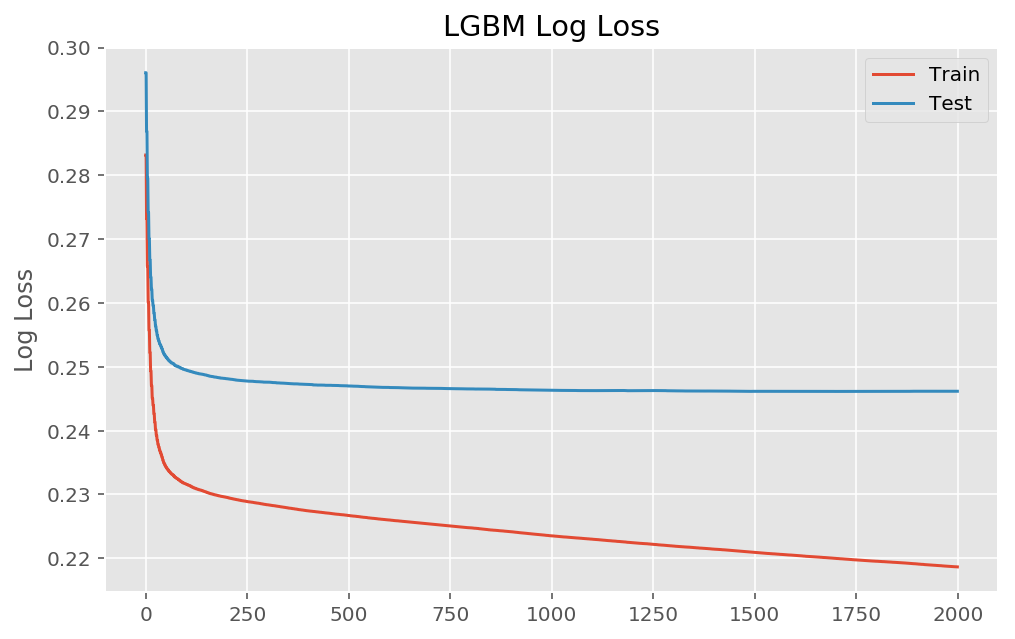

In [73]:
# retrieve performance metrics
results = model2.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()

In [75]:
from sklearn.metrics import log_loss

lg_loan_status_probas = model2.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.2461682389251206


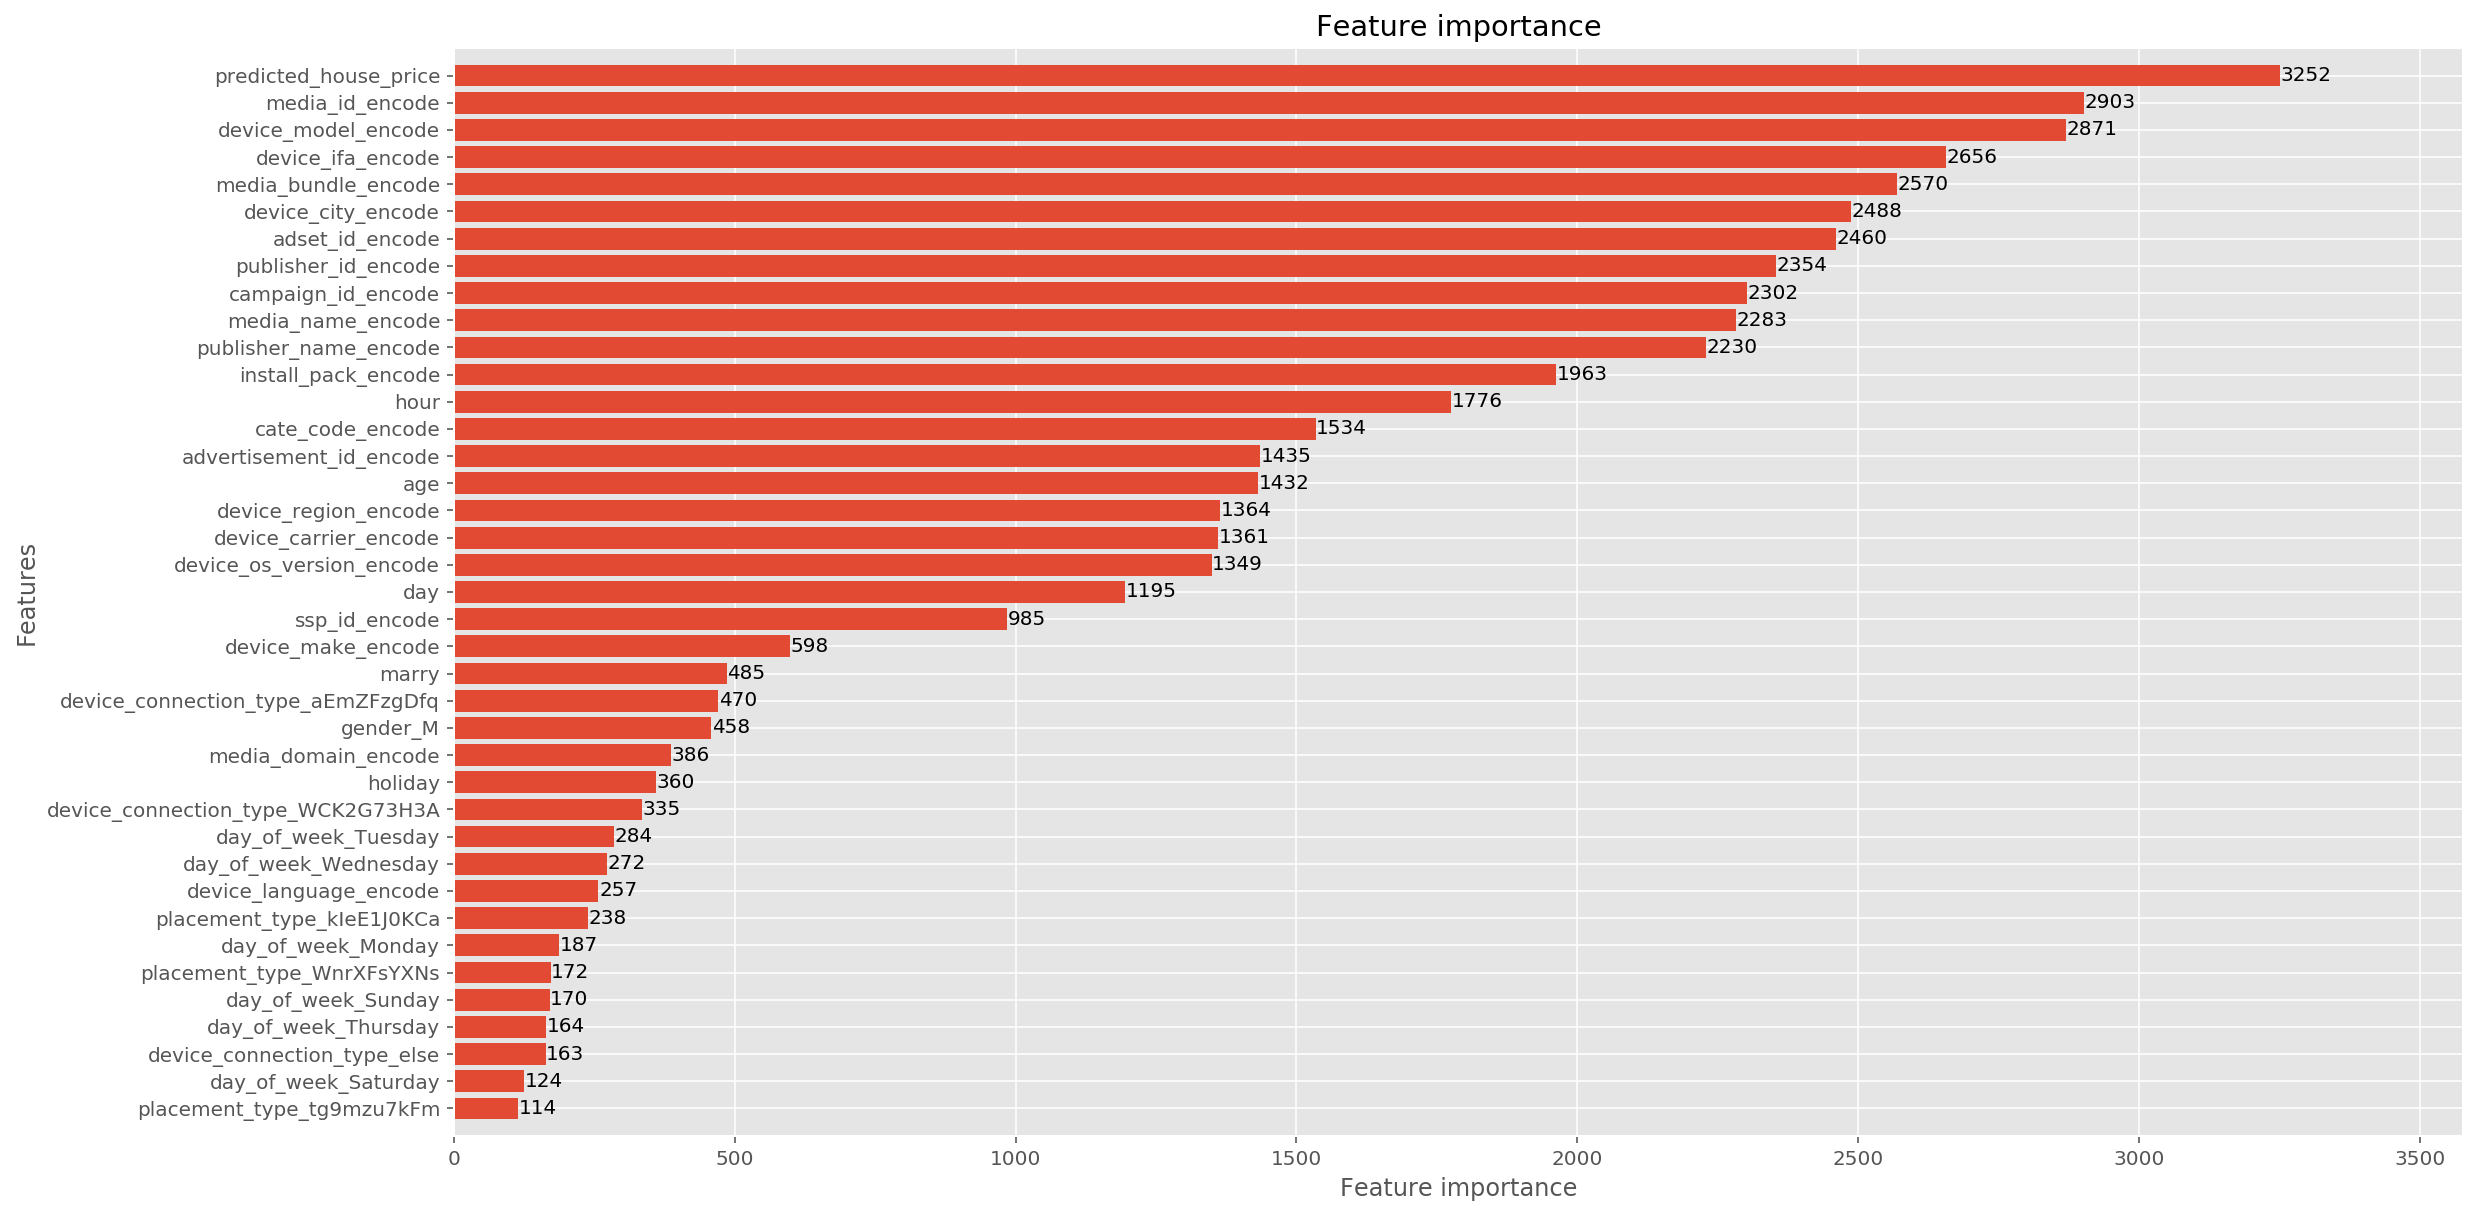

In [76]:
lightgbm.plot_importance(model2, max_num_features  = 100, ignore_zero=True, figsize = (18, 10), height=0.8)

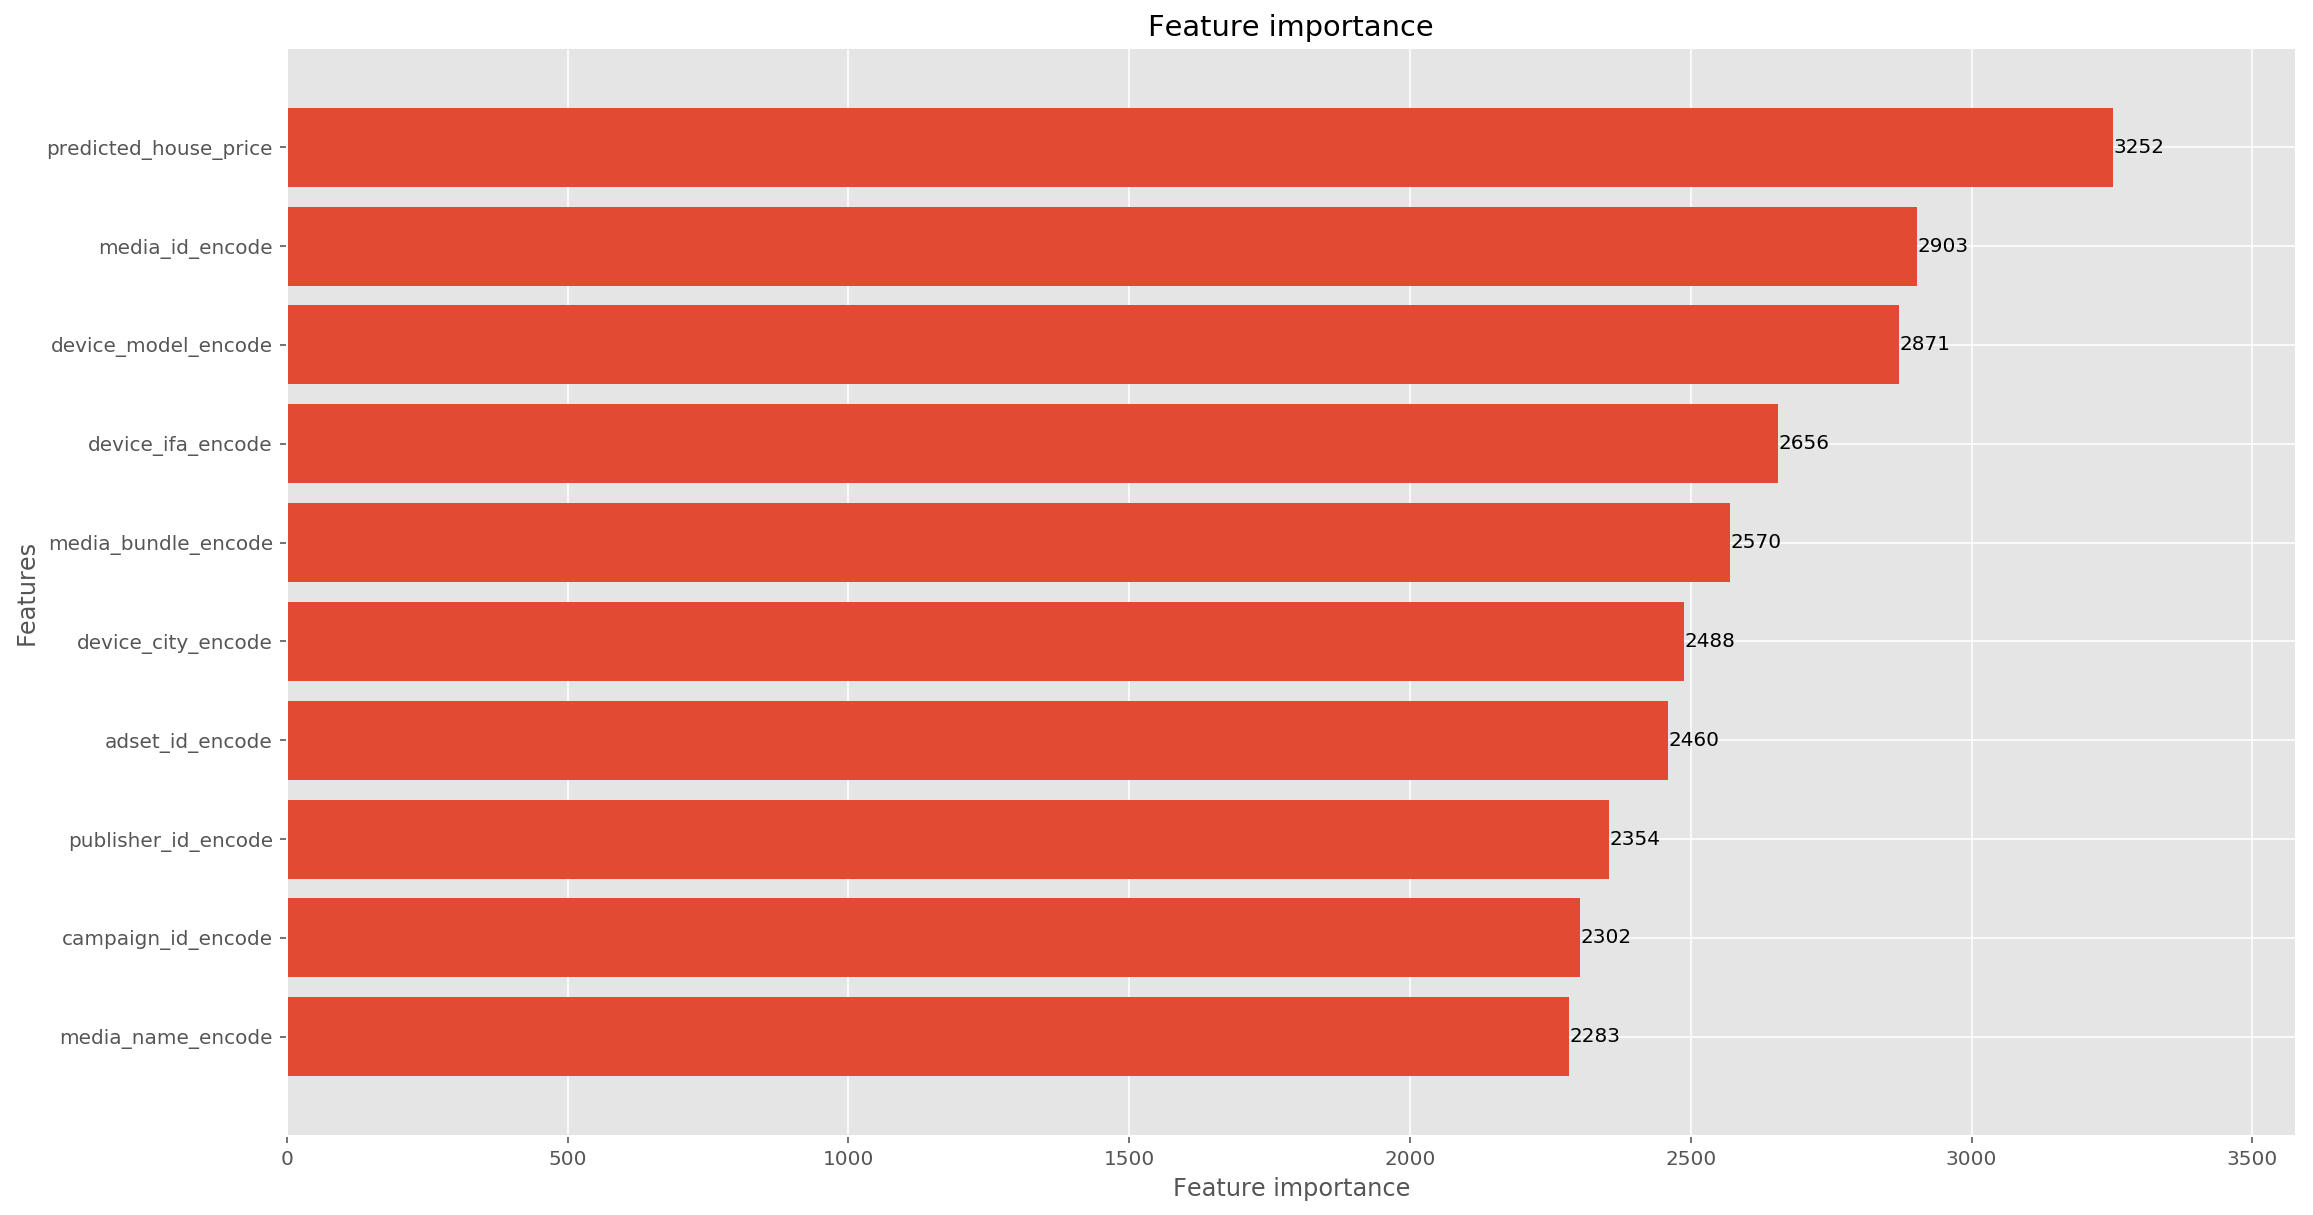

In [77]:
lightgbm.plot_importance(model2, max_num_features  = 10, ignore_zero=True, figsize = (18, 10), height=0.8)

In [83]:
from catboost import CatBoostClassifier

params = {
    'learning_rate': 0.1128527143464075,
    'verbose': 0,
    'max_bin': 495,
    'n_estimators': 1000,
    'random_state': 42,
    'depth':10,
    'loss_function' : 'Logloss'
}

model3= CatBoostClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model3.fit(X_train, y_train, eval_set=eval_set, verbose=True)

0:	learn: 0.5637069	test: 0.5637069	test1: 0.5706252	best: 0.5706252 (0)	total: 1.05s	remaining: 17m 25s
1:	learn: 0.4741505	test: 0.4741505	test1: 0.4857685	best: 0.4857685 (1)	total: 2.11s	remaining: 17m 32s
2:	learn: 0.4100366	test: 0.4100366	test1: 0.4246124	best: 0.4246124 (2)	total: 3.38s	remaining: 18m 42s
3:	learn: 0.3610902	test: 0.3610902	test1: 0.3780611	best: 0.3780611 (3)	total: 4.7s	remaining: 19m 30s
4:	learn: 0.3286327	test: 0.3286327	test1: 0.3476590	best: 0.3476590 (4)	total: 6.06s	remaining: 20m 5s
5:	learn: 0.3050965	test: 0.3050965	test1: 0.3247427	best: 0.3247427 (5)	total: 7.25s	remaining: 20m
6:	learn: 0.2910287	test: 0.2910287	test1: 0.3106712	best: 0.3106712 (6)	total: 8.45s	remaining: 19m 59s
7:	learn: 0.2814623	test: 0.2814623	test1: 0.3006778	best: 0.3006778 (7)	total: 9.63s	remaining: 19m 54s
8:	learn: 0.2713656	test: 0.2713656	test1: 0.2902633	best: 0.2902633 (8)	total: 10.8s	remaining: 19m 50s
9:	learn: 0.2635789	test: 0.2635789	test1: 0.2825127	best: 0.

77:	learn: 0.2310975	test: 0.2310975	test1: 0.2502238	best: 0.2502238 (77)	total: 1m 34s	remaining: 18m 35s
78:	learn: 0.2310402	test: 0.2310402	test1: 0.2501748	best: 0.2501748 (78)	total: 1m 35s	remaining: 18m 32s
79:	learn: 0.2309682	test: 0.2309682	test1: 0.2501540	best: 0.2501540 (79)	total: 1m 36s	remaining: 18m 31s
80:	learn: 0.2309221	test: 0.2309221	test1: 0.2501302	best: 0.2501302 (80)	total: 1m 37s	remaining: 18m 30s
81:	learn: 0.2308724	test: 0.2308724	test1: 0.2500791	best: 0.2500791 (81)	total: 1m 39s	remaining: 18m 29s
82:	learn: 0.2308436	test: 0.2308436	test1: 0.2500476	best: 0.2500476 (82)	total: 1m 40s	remaining: 18m 27s
83:	learn: 0.2307923	test: 0.2307923	test1: 0.2500448	best: 0.2500448 (83)	total: 1m 41s	remaining: 18m 26s
84:	learn: 0.2307707	test: 0.2307707	test1: 0.2500407	best: 0.2500407 (84)	total: 1m 42s	remaining: 18m 25s
85:	learn: 0.2307347	test: 0.2307347	test1: 0.2500159	best: 0.2500159 (85)	total: 1m 43s	remaining: 18m 23s
86:	learn: 0.2306756	test: 0

153:	learn: 0.2279078	test: 0.2279078	test1: 0.2488134	best: 0.2488134 (153)	total: 3m 6s	remaining: 17m 7s
154:	learn: 0.2278866	test: 0.2278866	test1: 0.2488003	best: 0.2488003 (154)	total: 3m 8s	remaining: 17m 5s
155:	learn: 0.2278509	test: 0.2278509	test1: 0.2487844	best: 0.2487844 (155)	total: 3m 9s	remaining: 17m 4s
156:	learn: 0.2278344	test: 0.2278344	test1: 0.2487812	best: 0.2487812 (156)	total: 3m 10s	remaining: 17m 3s
157:	learn: 0.2277898	test: 0.2277898	test1: 0.2487473	best: 0.2487473 (157)	total: 3m 11s	remaining: 17m 2s
158:	learn: 0.2277378	test: 0.2277378	test1: 0.2487359	best: 0.2487359 (158)	total: 3m 13s	remaining: 17m
159:	learn: 0.2277026	test: 0.2277026	test1: 0.2487244	best: 0.2487244 (159)	total: 3m 14s	remaining: 16m 59s
160:	learn: 0.2276790	test: 0.2276790	test1: 0.2487182	best: 0.2487182 (160)	total: 3m 15s	remaining: 16m 58s
161:	learn: 0.2276592	test: 0.2276592	test1: 0.2487135	best: 0.2487135 (161)	total: 3m 16s	remaining: 16m 56s
162:	learn: 0.2276154	

228:	learn: 0.2254231	test: 0.2254231	test1: 0.2483005	best: 0.2483005 (228)	total: 4m 37s	remaining: 15m 35s
229:	learn: 0.2254010	test: 0.2254010	test1: 0.2483041	best: 0.2483005 (228)	total: 4m 39s	remaining: 15m 34s
230:	learn: 0.2253511	test: 0.2253511	test1: 0.2483043	best: 0.2483005 (228)	total: 4m 40s	remaining: 15m 33s
231:	learn: 0.2253275	test: 0.2253275	test1: 0.2482982	best: 0.2482982 (231)	total: 4m 41s	remaining: 15m 32s
232:	learn: 0.2253021	test: 0.2253021	test1: 0.2482971	best: 0.2482971 (232)	total: 4m 42s	remaining: 15m 30s
233:	learn: 0.2252775	test: 0.2252775	test1: 0.2482715	best: 0.2482715 (233)	total: 4m 43s	remaining: 15m 29s
234:	learn: 0.2252403	test: 0.2252403	test1: 0.2482613	best: 0.2482613 (234)	total: 4m 45s	remaining: 15m 28s
235:	learn: 0.2252090	test: 0.2252090	test1: 0.2482578	best: 0.2482578 (235)	total: 4m 46s	remaining: 15m 26s
236:	learn: 0.2251810	test: 0.2251810	test1: 0.2482373	best: 0.2482373 (236)	total: 4m 47s	remaining: 15m 25s
237:	learn

303:	learn: 0.2232754	test: 0.2232754	test1: 0.2480530	best: 0.2480220 (294)	total: 6m 9s	remaining: 14m 5s
304:	learn: 0.2232424	test: 0.2232424	test1: 0.2480482	best: 0.2480220 (294)	total: 6m 10s	remaining: 14m 4s
305:	learn: 0.2231991	test: 0.2231991	test1: 0.2480350	best: 0.2480220 (294)	total: 6m 11s	remaining: 14m 2s
306:	learn: 0.2231752	test: 0.2231752	test1: 0.2480320	best: 0.2480220 (294)	total: 6m 12s	remaining: 14m 1s
307:	learn: 0.2231398	test: 0.2231398	test1: 0.2480327	best: 0.2480220 (294)	total: 6m 14s	remaining: 14m 1s
308:	learn: 0.2231251	test: 0.2231251	test1: 0.2480266	best: 0.2480220 (294)	total: 6m 15s	remaining: 14m
309:	learn: 0.2231074	test: 0.2231074	test1: 0.2480280	best: 0.2480220 (294)	total: 6m 16s	remaining: 13m 58s
310:	learn: 0.2230571	test: 0.2230571	test1: 0.2480257	best: 0.2480220 (294)	total: 6m 18s	remaining: 13m 57s
311:	learn: 0.2230379	test: 0.2230379	test1: 0.2480229	best: 0.2480220 (294)	total: 6m 19s	remaining: 13m 56s
312:	learn: 0.222996

378:	learn: 0.2211236	test: 0.2211236	test1: 0.2479545	best: 0.2479317 (364)	total: 7m 40s	remaining: 12m 35s
379:	learn: 0.2210931	test: 0.2210931	test1: 0.2479527	best: 0.2479317 (364)	total: 7m 42s	remaining: 12m 34s
380:	learn: 0.2210811	test: 0.2210811	test1: 0.2479519	best: 0.2479317 (364)	total: 7m 43s	remaining: 12m 32s
381:	learn: 0.2210545	test: 0.2210545	test1: 0.2479519	best: 0.2479317 (364)	total: 7m 44s	remaining: 12m 31s
382:	learn: 0.2210325	test: 0.2210325	test1: 0.2479538	best: 0.2479317 (364)	total: 7m 45s	remaining: 12m 30s
383:	learn: 0.2210161	test: 0.2210161	test1: 0.2479484	best: 0.2479317 (364)	total: 7m 46s	remaining: 12m 28s
384:	learn: 0.2209870	test: 0.2209870	test1: 0.2479539	best: 0.2479317 (364)	total: 7m 48s	remaining: 12m 27s
385:	learn: 0.2209607	test: 0.2209607	test1: 0.2479491	best: 0.2479317 (364)	total: 7m 49s	remaining: 12m 26s
386:	learn: 0.2209185	test: 0.2209185	test1: 0.2479488	best: 0.2479317 (364)	total: 7m 50s	remaining: 12m 25s
387:	learn

453:	learn: 0.2191675	test: 0.2191675	test1: 0.2479529	best: 0.2478687 (437)	total: 9m 12s	remaining: 11m 4s
454:	learn: 0.2191461	test: 0.2191461	test1: 0.2479519	best: 0.2478687 (437)	total: 9m 13s	remaining: 11m 3s
455:	learn: 0.2191266	test: 0.2191266	test1: 0.2479556	best: 0.2478687 (437)	total: 9m 14s	remaining: 11m 1s
456:	learn: 0.2190974	test: 0.2190974	test1: 0.2479552	best: 0.2478687 (437)	total: 9m 15s	remaining: 11m
457:	learn: 0.2190723	test: 0.2190723	test1: 0.2479501	best: 0.2478687 (437)	total: 9m 17s	remaining: 10m 59s
458:	learn: 0.2190418	test: 0.2190418	test1: 0.2479540	best: 0.2478687 (437)	total: 9m 18s	remaining: 10m 58s
459:	learn: 0.2190183	test: 0.2190183	test1: 0.2479510	best: 0.2478687 (437)	total: 9m 19s	remaining: 10m 56s
460:	learn: 0.2189977	test: 0.2189977	test1: 0.2479569	best: 0.2478687 (437)	total: 9m 20s	remaining: 10m 55s
461:	learn: 0.2189770	test: 0.2189770	test1: 0.2479589	best: 0.2478687 (437)	total: 9m 21s	remaining: 10m 54s
462:	learn: 0.218

528:	learn: 0.2170581	test: 0.2170581	test1: 0.2478743	best: 0.2478643 (513)	total: 10m 42s	remaining: 9m 32s
529:	learn: 0.2170401	test: 0.2170401	test1: 0.2478716	best: 0.2478643 (513)	total: 10m 44s	remaining: 9m 31s
530:	learn: 0.2170191	test: 0.2170191	test1: 0.2478847	best: 0.2478643 (513)	total: 10m 45s	remaining: 9m 29s
531:	learn: 0.2169901	test: 0.2169901	test1: 0.2478897	best: 0.2478643 (513)	total: 10m 46s	remaining: 9m 28s
532:	learn: 0.2169593	test: 0.2169593	test1: 0.2478815	best: 0.2478643 (513)	total: 10m 47s	remaining: 9m 27s
533:	learn: 0.2169352	test: 0.2169352	test1: 0.2478921	best: 0.2478643 (513)	total: 10m 49s	remaining: 9m 26s
534:	learn: 0.2168922	test: 0.2168922	test1: 0.2478870	best: 0.2478643 (513)	total: 10m 50s	remaining: 9m 25s
535:	learn: 0.2168597	test: 0.2168597	test1: 0.2478846	best: 0.2478643 (513)	total: 10m 51s	remaining: 9m 23s
536:	learn: 0.2168217	test: 0.2168217	test1: 0.2478625	best: 0.2478625 (536)	total: 10m 52s	remaining: 9m 22s
537:	learn

603:	learn: 0.2150018	test: 0.2150018	test1: 0.2478373	best: 0.2478048 (585)	total: 12m 14s	remaining: 8m 1s
604:	learn: 0.2149804	test: 0.2149804	test1: 0.2478416	best: 0.2478048 (585)	total: 12m 15s	remaining: 8m
605:	learn: 0.2149482	test: 0.2149482	test1: 0.2478345	best: 0.2478048 (585)	total: 12m 17s	remaining: 7m 59s
606:	learn: 0.2149335	test: 0.2149335	test1: 0.2478303	best: 0.2478048 (585)	total: 12m 18s	remaining: 7m 58s
607:	learn: 0.2149049	test: 0.2149049	test1: 0.2478315	best: 0.2478048 (585)	total: 12m 19s	remaining: 7m 56s
608:	learn: 0.2148791	test: 0.2148791	test1: 0.2478246	best: 0.2478048 (585)	total: 12m 20s	remaining: 7m 55s
609:	learn: 0.2148557	test: 0.2148557	test1: 0.2478253	best: 0.2478048 (585)	total: 12m 21s	remaining: 7m 54s
610:	learn: 0.2148441	test: 0.2148441	test1: 0.2478261	best: 0.2478048 (585)	total: 12m 23s	remaining: 7m 53s
611:	learn: 0.2148159	test: 0.2148159	test1: 0.2478233	best: 0.2478048 (585)	total: 12m 24s	remaining: 7m 51s
612:	learn: 0.2

678:	learn: 0.2131321	test: 0.2131321	test1: 0.2478809	best: 0.2478048 (585)	total: 13m 46s	remaining: 6m 30s
679:	learn: 0.2131085	test: 0.2131085	test1: 0.2478794	best: 0.2478048 (585)	total: 13m 48s	remaining: 6m 29s
680:	learn: 0.2130961	test: 0.2130961	test1: 0.2478785	best: 0.2478048 (585)	total: 13m 49s	remaining: 6m 28s
681:	learn: 0.2130757	test: 0.2130757	test1: 0.2478707	best: 0.2478048 (585)	total: 13m 50s	remaining: 6m 27s
682:	learn: 0.2130398	test: 0.2130398	test1: 0.2478688	best: 0.2478048 (585)	total: 13m 52s	remaining: 6m 26s
683:	learn: 0.2130026	test: 0.2130026	test1: 0.2478788	best: 0.2478048 (585)	total: 13m 54s	remaining: 6m 25s
684:	learn: 0.2129909	test: 0.2129909	test1: 0.2478824	best: 0.2478048 (585)	total: 13m 56s	remaining: 6m 24s
685:	learn: 0.2129615	test: 0.2129615	test1: 0.2478756	best: 0.2478048 (585)	total: 13m 57s	remaining: 6m 23s
686:	learn: 0.2129391	test: 0.2129391	test1: 0.2478828	best: 0.2478048 (585)	total: 13m 59s	remaining: 6m 22s
687:	learn

753:	learn: 0.2113097	test: 0.2113097	test1: 0.2479096	best: 0.2478048 (585)	total: 15m 27s	remaining: 5m 2s
754:	learn: 0.2112959	test: 0.2112959	test1: 0.2479085	best: 0.2478048 (585)	total: 15m 28s	remaining: 5m 1s
755:	learn: 0.2112686	test: 0.2112686	test1: 0.2479073	best: 0.2478048 (585)	total: 15m 29s	remaining: 5m
756:	learn: 0.2112488	test: 0.2112488	test1: 0.2479108	best: 0.2478048 (585)	total: 15m 31s	remaining: 4m 58s
757:	learn: 0.2112262	test: 0.2112262	test1: 0.2479104	best: 0.2478048 (585)	total: 15m 32s	remaining: 4m 57s
758:	learn: 0.2111934	test: 0.2111934	test1: 0.2479124	best: 0.2478048 (585)	total: 15m 33s	remaining: 4m 56s
759:	learn: 0.2111797	test: 0.2111797	test1: 0.2479156	best: 0.2478048 (585)	total: 15m 34s	remaining: 4m 55s
760:	learn: 0.2111446	test: 0.2111446	test1: 0.2479179	best: 0.2478048 (585)	total: 15m 36s	remaining: 4m 54s
761:	learn: 0.2111059	test: 0.2111059	test1: 0.2479180	best: 0.2478048 (585)	total: 15m 37s	remaining: 4m 52s
762:	learn: 0.21

828:	learn: 0.2093557	test: 0.2093557	test1: 0.2479088	best: 0.2478048 (585)	total: 17m 3s	remaining: 3m 31s
829:	learn: 0.2093438	test: 0.2093438	test1: 0.2479069	best: 0.2478048 (585)	total: 17m 4s	remaining: 3m 29s
830:	learn: 0.2093169	test: 0.2093169	test1: 0.2479199	best: 0.2478048 (585)	total: 17m 6s	remaining: 3m 28s
831:	learn: 0.2092830	test: 0.2092830	test1: 0.2479189	best: 0.2478048 (585)	total: 17m 7s	remaining: 3m 27s
832:	learn: 0.2092691	test: 0.2092691	test1: 0.2479175	best: 0.2478048 (585)	total: 17m 8s	remaining: 3m 26s
833:	learn: 0.2092500	test: 0.2092500	test1: 0.2479267	best: 0.2478048 (585)	total: 17m 9s	remaining: 3m 24s
834:	learn: 0.2092127	test: 0.2092127	test1: 0.2479286	best: 0.2478048 (585)	total: 17m 10s	remaining: 3m 23s
835:	learn: 0.2091810	test: 0.2091810	test1: 0.2479369	best: 0.2478048 (585)	total: 17m 12s	remaining: 3m 22s
836:	learn: 0.2091497	test: 0.2091497	test1: 0.2479431	best: 0.2478048 (585)	total: 17m 13s	remaining: 3m 21s
837:	learn: 0.20

903:	learn: 0.2074895	test: 0.2074895	test1: 0.2480817	best: 0.2478048 (585)	total: 18m 35s	remaining: 1m 58s
904:	learn: 0.2074588	test: 0.2074588	test1: 0.2480811	best: 0.2478048 (585)	total: 18m 37s	remaining: 1m 57s
905:	learn: 0.2074349	test: 0.2074349	test1: 0.2480838	best: 0.2478048 (585)	total: 18m 38s	remaining: 1m 56s
906:	learn: 0.2073989	test: 0.2073989	test1: 0.2480916	best: 0.2478048 (585)	total: 18m 39s	remaining: 1m 54s
907:	learn: 0.2073874	test: 0.2073874	test1: 0.2480893	best: 0.2478048 (585)	total: 18m 40s	remaining: 1m 53s
908:	learn: 0.2073677	test: 0.2073677	test1: 0.2480879	best: 0.2478048 (585)	total: 18m 41s	remaining: 1m 52s
909:	learn: 0.2073421	test: 0.2073421	test1: 0.2480857	best: 0.2478048 (585)	total: 18m 43s	remaining: 1m 51s
910:	learn: 0.2073236	test: 0.2073236	test1: 0.2480786	best: 0.2478048 (585)	total: 18m 44s	remaining: 1m 49s
911:	learn: 0.2073115	test: 0.2073115	test1: 0.2480760	best: 0.2478048 (585)	total: 18m 45s	remaining: 1m 48s
912:	learn

979:	learn: 0.2057193	test: 0.2057193	test1: 0.2481779	best: 0.2478048 (585)	total: 20m 11s	remaining: 24.7s
980:	learn: 0.2056984	test: 0.2056984	test1: 0.2481782	best: 0.2478048 (585)	total: 20m 12s	remaining: 23.5s
981:	learn: 0.2056723	test: 0.2056723	test1: 0.2481770	best: 0.2478048 (585)	total: 20m 13s	remaining: 22.2s
982:	learn: 0.2056329	test: 0.2056329	test1: 0.2481858	best: 0.2478048 (585)	total: 20m 15s	remaining: 21s
983:	learn: 0.2056151	test: 0.2056151	test1: 0.2481821	best: 0.2478048 (585)	total: 20m 16s	remaining: 19.8s
984:	learn: 0.2055891	test: 0.2055891	test1: 0.2481818	best: 0.2478048 (585)	total: 20m 17s	remaining: 18.5s
985:	learn: 0.2055664	test: 0.2055664	test1: 0.2481860	best: 0.2478048 (585)	total: 20m 18s	remaining: 17.3s
986:	learn: 0.2055365	test: 0.2055365	test1: 0.2481869	best: 0.2478048 (585)	total: 20m 20s	remaining: 16.1s
987:	learn: 0.2055151	test: 0.2055151	test1: 0.2481890	best: 0.2478048 (585)	total: 20m 21s	remaining: 14.8s
988:	learn: 0.2055040

In [84]:
print(model3.get_best_iteration())

585


In [85]:
print(model3.get_best_score())

{'learn': {'Logloss': 0.20521433853185575}, 'validation_0': {'Logloss': 0.20521433853185397}, 'validation_1': {'Logloss': 0.24780483036729337}}
